In [1]:
pwd

'C:\\Users\\Matt Hetrick\\Desktop\\COS429\\Assignment 2'

In [20]:
cd C:\\Users\\Matt Hetrick\\Desktop\\COS429\\Assignment 2\a2_part2_starter

C:\Users\Matt Hetrick\Desktop\COS429\Assignment 2\a2_part2_starter


In [21]:
from test_face_classifier import test_face_classifier

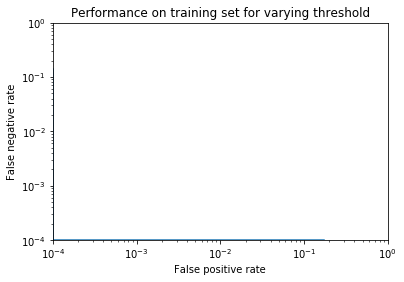

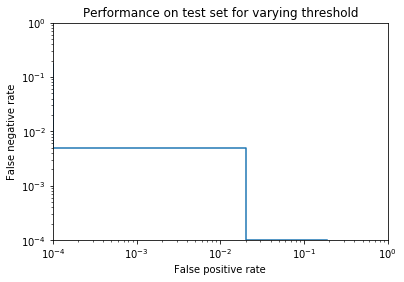

In [22]:
test_face_classifier(250, 100, 4, True)

In [23]:
cd C:\\Users\\Matt Hetrick\\Desktop\\COS429\\Assignment 2\a2_part4_starter

C:\Users\Matt Hetrick\Desktop\COS429\Assignment 2\a2_part4_starter


In [24]:
from hog36 import hog36 
from logistic_prob import logistic_prob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def find_faces(img, stride, thresh, params, orientations, wrap180):
    """Find faces in an image

    Args:
        img: an image
        stride: how far to move between locations at which the detector is run,
            at the finest (36x36) scale.  This is effectively scaled up for
            larger windows.
        thresh: probability threshold for calling a detection a face
        params: trained face classifier parameters
        orientations: the number of HoG gradient orientations to use
        wrap180: if true, the HoG orientations cover 180 degrees, else 360

    Returns:
        outimg: copy of img with face locations marked
    """
    hog_input_size = 36
    windowsize = 36
    if stride > windowsize:
        stride = windowsize

    windowsize_org = windowsize
    stride_org = stride

    height, width = img.shape
    probmap = np.zeros([height, width])
    outimg = np.array(img)

    # Loop over windowsize x windowsize windows, advancing by stride
    hog_descriptor_size = 100 * orientations
    window_descriptor = np.zeros([1,hog_descriptor_size + 1])

    # Extract windows of ever-larger sizes, resizing each window before 
    # passing it in to the HoG computation
    while (windowsize <= min(height,width)):

        for i in range(0, width-windowsize, stride):
            for j in range(0, height-windowsize, stride):

                print(height, width)
                print(windowsize, j,i)
                # Crop out a windowsize x windowsize window starting at (i,j)
                crop = img[j:j+windowsize,i:i+windowsize] 
                # resize before passing it into HOG --> make sure 36x36 
                crop = cv2.resize(crop, (hog_input_size, hog_input_size))
                #print(crop.shape)
                print(windowsize,j,i)

                # Compute a HoG descriptor, and run the classifier
                window_descriptor[0,0] = 0
                window_descriptor[0, 1:] = hog36(crop, orientations, wrap180)
                # NEED TO TRAIN AND RUN CLASSIFIER ?? PROB --> FIT () ?? or since trained params good 
                probability = logistic_prob(window_descriptor, params) #or need to do both fit + prob 

                # Mark detection probability in probmap
                win_i = i + int((windowsize - stride) / 2)
                win_j = j + int((windowsize - stride) / 2)
                probmap[win_i:win_i+stride, win_j:win_j+stride] = probability
                
                print(windowsize,j,i)
                # If probability of a face is below thresh, continue 
                # else mark the face on img 
                if probability < thresh:
                    continue

                #print(windowsize)
                # Mark the face in outimg
                outimg[j, i:i+windowsize] = 255
                outimg[j+windowsize-1, i:i+windowsize] = 255
                outimg[j:j+windowsize, i] = 255
                outimg[j:j+windowsize, i+windowsize-1] = 255
                
                print("HH", j,i)

        # scale by 20% each iteration
        windowsize = round(windowsize*1.2)
        stride = round((windowsize)*(stride_org/windowsize_org))
        print("here")


    return outimg

In [45]:
img = cv2.imread('face_data/testing_scenes/karen-and-rob.jpg', cv2.IMREAD_GRAYSCALE)
saved = np.load('face_classifier.npz')
params, orientations, wrap180 = saved['params'], saved['orientations'], saved['wrap180']
outimg = find_faces(img, 3, 0.99, params, orientations, wrap180)
cv2.imwrite('krb.jpg',outimg) 

484 336
36 0 0
36 0 0
36 0 0
484 336
36 3 0
36 3 0
36 3 0
484 336
36 6 0
36 6 0
36 6 0
484 336
36 9 0
36 9 0
36 9 0
484 336
36 12 0
36 12 0
36 12 0
484 336
36 15 0
36 15 0
36 15 0
484 336
36 18 0
36 18 0
36 18 0
484 336
36 21 0
36 21 0
36 21 0
484 336
36 24 0
36 24 0
36 24 0
484 336
36 27 0
36 27 0
36 27 0
484 336
36 30 0
36 30 0
36 30 0
484 336
36 33 0
36 33 0
36 33 0
484 336
36 36 0
36 36 0
36 36 0
484 336
36 39 0
36 39 0
36 39 0
484 336
36 42 0
36 42 0
36 42 0
484 336
36 45 0
36 45 0
36 45 0
484 336
36 48 0
36 48 0
36 48 0
484 336
36 51 0
36 51 0
36 51 0
484 336
36 54 0
36 54 0
36 54 0
484 336
36 57 0
36 57 0
36 57 0
484 336
36 60 0
36 60 0
36 60 0
484 336
36 63 0
36 63 0
36 63 0
484 336
36 66 0
36 66 0
36 66 0
484 336
36 69 0
36 69 0
36 69 0
484 336
36 72 0
36 72 0
36 72 0
484 336
36 75 0
36 75 0
36 75 0
484 336
36 78 0
36 78 0
36 78 0
484 336
36 81 0
36 81 0
36 81 0
484 336
36 84 0
36 84 0
36 84 0
484 336
36 87 0
36 87 0
36 87 0
484 336
36 90 0
36 90 0
36 90 0
484 336
36 93 0
36 9

36 423 3
36 423 3
484 336
36 426 3
36 426 3
36 426 3
484 336
36 429 3
36 429 3
36 429 3
484 336
36 432 3
36 432 3
36 432 3
484 336
36 435 3
36 435 3
36 435 3
484 336
36 438 3
36 438 3
36 438 3
484 336
36 441 3
36 441 3
36 441 3
484 336
36 444 3
36 444 3
36 444 3
484 336
36 447 3
36 447 3
36 447 3
484 336
36 0 6
36 0 6
36 0 6
484 336
36 3 6
36 3 6
36 3 6
484 336
36 6 6
36 6 6
36 6 6
484 336
36 9 6
36 9 6
36 9 6
484 336
36 12 6
36 12 6
36 12 6
484 336
36 15 6
36 15 6
36 15 6
484 336
36 18 6
36 18 6
36 18 6
484 336
36 21 6
36 21 6
36 21 6
484 336
36 24 6
36 24 6
36 24 6
484 336
36 27 6
36 27 6
36 27 6
484 336
36 30 6
36 30 6
36 30 6
484 336
36 33 6
36 33 6
36 33 6
484 336
36 36 6
36 36 6
36 36 6
484 336
36 39 6
36 39 6
36 39 6
484 336
36 42 6
36 42 6
36 42 6
484 336
36 45 6
36 45 6
36 45 6
484 336
36 48 6
36 48 6
36 48 6
484 336
36 51 6
36 51 6
36 51 6
484 336
36 54 6
36 54 6
36 54 6
484 336
36 57 6
36 57 6
36 57 6
484 336
36 60 6
36 60 6
36 60 6
484 336
36 63 6
36 63 6
36 63 6
484 336
36

36 417 9
484 336
36 420 9
36 420 9
36 420 9
484 336
36 423 9
36 423 9
36 423 9
484 336
36 426 9
36 426 9
36 426 9
484 336
36 429 9
36 429 9
36 429 9
484 336
36 432 9
36 432 9
36 432 9
484 336
36 435 9
36 435 9
36 435 9
484 336
36 438 9
36 438 9
36 438 9
484 336
36 441 9
36 441 9
36 441 9
484 336
36 444 9
36 444 9
36 444 9
484 336
36 447 9
36 447 9
36 447 9
484 336
36 0 12
36 0 12
36 0 12
484 336
36 3 12
36 3 12
36 3 12
484 336
36 6 12
36 6 12
36 6 12
484 336
36 9 12
36 9 12
36 9 12
484 336
36 12 12
36 12 12
36 12 12
484 336
36 15 12
36 15 12
36 15 12
484 336
36 18 12
36 18 12
36 18 12
484 336
36 21 12
36 21 12
36 21 12
484 336
36 24 12
36 24 12
36 24 12
484 336
36 27 12
36 27 12
36 27 12
484 336
36 30 12
36 30 12
36 30 12
484 336
36 33 12
36 33 12
36 33 12
484 336
36 36 12
36 36 12
36 36 12
484 336
36 39 12
36 39 12
36 39 12
484 336
36 42 12
36 42 12
36 42 12
484 336
36 45 12
36 45 12
36 45 12
484 336
36 48 12
36 48 12
36 48 12
484 336
36 51 12
36 51 12
36 51 12
484 336
36 54 12
36 54 

36 189 15
484 336
36 192 15
36 192 15
36 192 15
484 336
36 195 15
36 195 15
36 195 15
484 336
36 198 15
36 198 15
36 198 15
484 336
36 201 15
36 201 15
36 201 15
484 336
36 204 15
36 204 15
36 204 15
484 336
36 207 15
36 207 15
36 207 15
484 336
36 210 15
36 210 15
36 210 15
484 336
36 213 15
36 213 15
36 213 15
484 336
36 216 15
36 216 15
36 216 15
484 336
36 219 15
36 219 15
36 219 15
484 336
36 222 15
36 222 15
36 222 15
484 336
36 225 15
36 225 15
36 225 15
484 336
36 228 15
36 228 15
36 228 15
484 336
36 231 15
36 231 15
36 231 15
484 336
36 234 15
36 234 15
36 234 15
484 336
36 237 15
36 237 15
36 237 15
484 336
36 240 15
36 240 15
36 240 15
484 336
36 243 15
36 243 15
36 243 15
484 336
36 246 15
36 246 15
36 246 15
484 336
36 249 15
36 249 15
36 249 15
484 336
36 252 15
36 252 15
36 252 15
484 336
36 255 15
36 255 15
36 255 15
484 336
36 258 15
36 258 15
36 258 15
484 336
36 261 15
36 261 15
36 261 15
484 336
36 264 15
36 264 15
36 264 15
484 336
36 267 15
36 267 15
36 267 15
48

36 165 21
484 336
36 168 21
36 168 21
36 168 21
484 336
36 171 21
36 171 21
36 171 21
484 336
36 174 21
36 174 21
36 174 21
484 336
36 177 21
36 177 21
36 177 21
484 336
36 180 21
36 180 21
36 180 21
484 336
36 183 21
36 183 21
36 183 21
484 336
36 186 21
36 186 21
36 186 21
484 336
36 189 21
36 189 21
36 189 21
484 336
36 192 21
36 192 21
36 192 21
484 336
36 195 21
36 195 21
36 195 21
484 336
36 198 21
36 198 21
36 198 21
484 336
36 201 21
36 201 21
36 201 21
484 336
36 204 21
36 204 21
36 204 21
484 336
36 207 21
36 207 21
36 207 21
484 336
36 210 21
36 210 21
36 210 21
484 336
36 213 21
36 213 21
36 213 21
484 336
36 216 21
36 216 21
36 216 21
484 336
36 219 21
36 219 21
36 219 21
484 336
36 222 21
36 222 21
36 222 21
484 336
36 225 21
36 225 21
36 225 21
484 336
36 228 21
36 228 21
36 228 21
484 336
36 231 21
36 231 21
36 231 21
484 336
36 234 21
36 234 21
36 234 21
484 336
36 237 21
36 237 21
36 237 21
484 336
36 240 21
36 240 21
36 240 21
484 336
36 243 21
36 243 21
36 243 21
48

36 393 24
36 393 24
484 336
36 396 24
36 396 24
36 396 24
484 336
36 399 24
36 399 24
36 399 24
484 336
36 402 24
36 402 24
36 402 24
484 336
36 405 24
36 405 24
36 405 24
484 336
36 408 24
36 408 24
36 408 24
484 336
36 411 24
36 411 24
36 411 24
484 336
36 414 24
36 414 24
36 414 24
484 336
36 417 24
36 417 24
36 417 24
484 336
36 420 24
36 420 24
36 420 24
484 336
36 423 24
36 423 24
36 423 24
484 336
36 426 24
36 426 24
36 426 24
484 336
36 429 24
36 429 24
36 429 24
484 336
36 432 24
36 432 24
36 432 24
484 336
36 435 24
36 435 24
36 435 24
484 336
36 438 24
36 438 24
36 438 24
484 336
36 441 24
36 441 24
36 441 24
484 336
36 444 24
36 444 24
36 444 24
484 336
36 447 24
36 447 24
36 447 24
484 336
36 0 27
36 0 27
36 0 27
484 336
36 3 27
36 3 27
36 3 27
484 336
36 6 27
36 6 27
36 6 27
484 336
36 9 27
36 9 27
36 9 27
484 336
36 12 27
36 12 27
36 12 27
484 336
36 15 27
36 15 27
36 15 27
484 336
36 18 27
36 18 27
36 18 27
484 336
36 21 27
36 21 27
36 21 27
484 336
36 24 27
36 24 27
36

36 357 30
484 336
36 360 30
36 360 30
36 360 30
484 336
36 363 30
36 363 30
36 363 30
484 336
36 366 30
36 366 30
36 366 30
484 336
36 369 30
36 369 30
36 369 30
484 336
36 372 30
36 372 30
36 372 30
484 336
36 375 30
36 375 30
36 375 30
484 336
36 378 30
36 378 30
36 378 30
484 336
36 381 30
36 381 30
36 381 30
484 336
36 384 30
36 384 30
36 384 30
484 336
36 387 30
36 387 30
36 387 30
484 336
36 390 30
36 390 30
36 390 30
484 336
36 393 30
36 393 30
36 393 30
484 336
36 396 30
36 396 30
36 396 30
484 336
36 399 30
36 399 30
36 399 30
484 336
36 402 30
36 402 30
36 402 30
484 336
36 405 30
36 405 30
36 405 30
484 336
36 408 30
36 408 30
36 408 30
484 336
36 411 30
36 411 30
36 411 30
484 336
36 414 30
36 414 30
36 414 30
484 336
36 417 30
36 417 30
36 417 30
484 336
36 420 30
36 420 30
36 420 30
484 336
36 423 30
36 423 30
36 423 30
484 336
36 426 30
36 426 30
36 426 30
484 336
36 429 30
36 429 30
36 429 30
484 336
36 432 30
36 432 30
36 432 30
484 336
36 435 30
36 435 30
36 435 30
48

36 141 36
36 141 36
484 336
36 144 36
36 144 36
36 144 36
484 336
36 147 36
36 147 36
36 147 36
484 336
36 150 36
36 150 36
36 150 36
484 336
36 153 36
36 153 36
36 153 36
484 336
36 156 36
36 156 36
36 156 36
484 336
36 159 36
36 159 36
36 159 36
484 336
36 162 36
36 162 36
36 162 36
484 336
36 165 36
36 165 36
36 165 36
484 336
36 168 36
36 168 36
36 168 36
484 336
36 171 36
36 171 36
36 171 36
484 336
36 174 36
36 174 36
36 174 36
484 336
36 177 36
36 177 36
36 177 36
484 336
36 180 36
36 180 36
36 180 36
484 336
36 183 36
36 183 36
36 183 36
484 336
36 186 36
36 186 36
36 186 36
484 336
36 189 36
36 189 36
36 189 36
484 336
36 192 36
36 192 36
36 192 36
484 336
36 195 36
36 195 36
36 195 36
484 336
36 198 36
36 198 36
36 198 36
484 336
36 201 36
36 201 36
36 201 36
484 336
36 204 36
36 204 36
36 204 36
484 336
36 207 36
36 207 36
36 207 36
484 336
36 210 36
36 210 36
36 210 36
484 336
36 213 36
36 213 36
36 213 36
484 336
36 216 36
36 216 36
36 216 36
484 336
36 219 36
36 219 36
36

36 417 39
484 336
36 420 39
36 420 39
36 420 39
484 336
36 423 39
36 423 39
36 423 39
484 336
36 426 39
36 426 39
36 426 39
484 336
36 429 39
36 429 39
36 429 39
484 336
36 432 39
36 432 39
36 432 39
484 336
36 435 39
36 435 39
36 435 39
484 336
36 438 39
36 438 39
36 438 39
484 336
36 441 39
36 441 39
36 441 39
484 336
36 444 39
36 444 39
36 444 39
484 336
36 447 39
36 447 39
36 447 39
484 336
36 0 42
36 0 42
36 0 42
484 336
36 3 42
36 3 42
36 3 42
484 336
36 6 42
36 6 42
36 6 42
484 336
36 9 42
36 9 42
36 9 42
484 336
36 12 42
36 12 42
36 12 42
484 336
36 15 42
36 15 42
36 15 42
484 336
36 18 42
36 18 42
36 18 42
484 336
36 21 42
36 21 42
36 21 42
484 336
36 24 42
36 24 42
36 24 42
484 336
36 27 42
36 27 42
36 27 42
484 336
36 30 42
36 30 42
36 30 42
484 336
36 33 42
36 33 42
36 33 42
484 336
36 36 42
36 36 42
36 36 42
484 336
36 39 42
36 39 42
36 39 42
484 336
36 42 42
36 42 42
36 42 42
484 336
36 45 42
36 45 42
36 45 42
484 336
36 48 42
36 48 42
36 48 42
484 336
36 51 42
36 51 42
3

36 282 45
484 336
36 285 45
36 285 45
36 285 45
484 336
36 288 45
36 288 45
36 288 45
484 336
36 291 45
36 291 45
36 291 45
484 336
36 294 45
36 294 45
36 294 45
484 336
36 297 45
36 297 45
36 297 45
484 336
36 300 45
36 300 45
36 300 45
484 336
36 303 45
36 303 45
36 303 45
484 336
36 306 45
36 306 45
36 306 45
484 336
36 309 45
36 309 45
36 309 45
484 336
36 312 45
36 312 45
36 312 45
484 336
36 315 45
36 315 45
36 315 45
484 336
36 318 45
36 318 45
36 318 45
484 336
36 321 45
36 321 45
36 321 45
484 336
36 324 45
36 324 45
36 324 45
484 336
36 327 45
36 327 45
36 327 45
484 336
36 330 45
36 330 45
36 330 45
484 336
36 333 45
36 333 45
36 333 45
484 336
36 336 45
36 336 45
36 336 45
484 336
36 339 45
36 339 45
36 339 45
484 336
36 342 45
36 342 45
36 342 45
484 336
36 345 45
36 345 45
36 345 45
484 336
36 348 45
36 348 45
36 348 45
484 336
36 351 45
36 351 45
36 351 45
484 336
36 354 45
36 354 45
36 354 45
484 336
36 357 45
36 357 45
36 357 45
484 336
36 360 45
36 360 45
36 360 45
48

36 189 51
484 336
36 192 51
36 192 51
36 192 51
484 336
36 195 51
36 195 51
36 195 51
484 336
36 198 51
36 198 51
36 198 51
484 336
36 201 51
36 201 51
36 201 51
484 336
36 204 51
36 204 51
36 204 51
484 336
36 207 51
36 207 51
36 207 51
484 336
36 210 51
36 210 51
36 210 51
484 336
36 213 51
36 213 51
36 213 51
484 336
36 216 51
36 216 51
36 216 51
484 336
36 219 51
36 219 51
36 219 51
484 336
36 222 51
36 222 51
36 222 51
484 336
36 225 51
36 225 51
36 225 51
484 336
36 228 51
36 228 51
36 228 51
484 336
36 231 51
36 231 51
36 231 51
484 336
36 234 51
36 234 51
36 234 51
484 336
36 237 51
36 237 51
36 237 51
484 336
36 240 51
36 240 51
36 240 51
484 336
36 243 51
36 243 51
36 243 51
484 336
36 246 51
36 246 51
36 246 51
484 336
36 249 51
36 249 51
36 249 51
484 336
36 252 51
36 252 51
36 252 51
484 336
36 255 51
36 255 51
36 255 51
484 336
36 258 51
36 258 51
36 258 51
484 336
36 261 51
36 261 51
36 261 51
484 336
36 264 51
36 264 51
36 264 51
484 336
36 267 51
36 267 51
36 267 51
48

36 429 54
484 336
36 432 54
36 432 54
36 432 54
484 336
36 435 54
36 435 54
36 435 54
484 336
36 438 54
36 438 54
36 438 54
484 336
36 441 54
36 441 54
36 441 54
484 336
36 444 54
36 444 54
36 444 54
484 336
36 447 54
36 447 54
36 447 54
484 336
36 0 57
36 0 57
36 0 57
484 336
36 3 57
36 3 57
36 3 57
484 336
36 6 57
36 6 57
36 6 57
484 336
36 9 57
36 9 57
36 9 57
484 336
36 12 57
36 12 57
36 12 57
484 336
36 15 57
36 15 57
36 15 57
484 336
36 18 57
36 18 57
36 18 57
484 336
36 21 57
36 21 57
36 21 57
484 336
36 24 57
36 24 57
36 24 57
484 336
36 27 57
36 27 57
36 27 57
484 336
36 30 57
36 30 57
36 30 57
484 336
36 33 57
36 33 57
36 33 57
484 336
36 36 57
36 36 57
36 36 57
484 336
36 39 57
36 39 57
36 39 57
484 336
36 42 57
36 42 57
36 42 57
484 336
36 45 57
36 45 57
36 45 57
484 336
36 48 57
36 48 57
36 48 57
484 336
36 51 57
36 51 57
36 51 57
484 336
36 54 57
36 54 57
36 54 57
484 336
36 57 57
36 57 57
36 57 57
484 336
36 60 57
36 60 57
36 60 57
484 336
36 63 57
36 63 57
36 63 57
484 

36 210 60
484 336
36 213 60
36 213 60
36 213 60
484 336
36 216 60
36 216 60
36 216 60
484 336
36 219 60
36 219 60
36 219 60
484 336
36 222 60
36 222 60
36 222 60
484 336
36 225 60
36 225 60
36 225 60
484 336
36 228 60
36 228 60
36 228 60
484 336
36 231 60
36 231 60
36 231 60
484 336
36 234 60
36 234 60
36 234 60
484 336
36 237 60
36 237 60
36 237 60
484 336
36 240 60
36 240 60
36 240 60
484 336
36 243 60
36 243 60
36 243 60
484 336
36 246 60
36 246 60
36 246 60
484 336
36 249 60
36 249 60
36 249 60
484 336
36 252 60
36 252 60
36 252 60
484 336
36 255 60
36 255 60
36 255 60
484 336
36 258 60
36 258 60
36 258 60
484 336
36 261 60
36 261 60
36 261 60
484 336
36 264 60
36 264 60
36 264 60
484 336
36 267 60
36 267 60
36 267 60
484 336
36 270 60
36 270 60
36 270 60
484 336
36 273 60
36 273 60
36 273 60
484 336
36 276 60
36 276 60
36 276 60
484 336
36 279 60
36 279 60
36 279 60
484 336
36 282 60
36 282 60
36 282 60
484 336
36 285 60
36 285 60
36 285 60
484 336
36 288 60
36 288 60
36 288 60
48

36 204 66
484 336
36 207 66
36 207 66
36 207 66
484 336
36 210 66
36 210 66
36 210 66
484 336
36 213 66
36 213 66
36 213 66
484 336
36 216 66
36 216 66
36 216 66
484 336
36 219 66
36 219 66
36 219 66
484 336
36 222 66
36 222 66
36 222 66
484 336
36 225 66
36 225 66
36 225 66
484 336
36 228 66
36 228 66
36 228 66
484 336
36 231 66
36 231 66
36 231 66
484 336
36 234 66
36 234 66
36 234 66
484 336
36 237 66
36 237 66
36 237 66
484 336
36 240 66
36 240 66
36 240 66
484 336
36 243 66
36 243 66
36 243 66
484 336
36 246 66
36 246 66
36 246 66
484 336
36 249 66
36 249 66
36 249 66
484 336
36 252 66
36 252 66
36 252 66
484 336
36 255 66
36 255 66
36 255 66
484 336
36 258 66
36 258 66
36 258 66
484 336
36 261 66
36 261 66
36 261 66
484 336
36 264 66
36 264 66
36 264 66
484 336
36 267 66
36 267 66
36 267 66
484 336
36 270 66
36 270 66
36 270 66
484 336
36 273 66
36 273 66
36 273 66
484 336
36 276 66
36 276 66
36 276 66
484 336
36 279 66
36 279 66
36 279 66
484 336
36 282 66
36 282 66
36 282 66
48

36 0 72
484 336
36 3 72
36 3 72
36 3 72
484 336
36 6 72
36 6 72
36 6 72
484 336
36 9 72
36 9 72
36 9 72
484 336
36 12 72
36 12 72
36 12 72
484 336
36 15 72
36 15 72
36 15 72
484 336
36 18 72
36 18 72
36 18 72
484 336
36 21 72
36 21 72
36 21 72
484 336
36 24 72
36 24 72
36 24 72
484 336
36 27 72
36 27 72
36 27 72
484 336
36 30 72
36 30 72
36 30 72
484 336
36 33 72
36 33 72
36 33 72
484 336
36 36 72
36 36 72
36 36 72
484 336
36 39 72
36 39 72
36 39 72
484 336
36 42 72
36 42 72
36 42 72
484 336
36 45 72
36 45 72
36 45 72
484 336
36 48 72
36 48 72
36 48 72
484 336
36 51 72
36 51 72
36 51 72
484 336
36 54 72
36 54 72
36 54 72
484 336
36 57 72
36 57 72
36 57 72
484 336
36 60 72
36 60 72
36 60 72
484 336
36 63 72
36 63 72
36 63 72
484 336
36 66 72
36 66 72
36 66 72
484 336
36 69 72
36 69 72
36 69 72
484 336
36 72 72
36 72 72
36 72 72
484 336
36 75 72
36 75 72
36 75 72
484 336
36 78 72
36 78 72
36 78 72
484 336
36 81 72
36 81 72
36 81 72
484 336
36 84 72
36 84 72
36 84 72
484 336
36 87 72
36 8

36 288 75
36 288 75
484 336
36 291 75
36 291 75
36 291 75
484 336
36 294 75
36 294 75
36 294 75
484 336
36 297 75
36 297 75
36 297 75
484 336
36 300 75
36 300 75
36 300 75
484 336
36 303 75
36 303 75
36 303 75
484 336
36 306 75
36 306 75
36 306 75
484 336
36 309 75
36 309 75
36 309 75
484 336
36 312 75
36 312 75
36 312 75
484 336
36 315 75
36 315 75
36 315 75
484 336
36 318 75
36 318 75
36 318 75
484 336
36 321 75
36 321 75
36 321 75
484 336
36 324 75
36 324 75
36 324 75
484 336
36 327 75
36 327 75
36 327 75
484 336
36 330 75
36 330 75
36 330 75
484 336
36 333 75
36 333 75
36 333 75
484 336
36 336 75
36 336 75
36 336 75
484 336
36 339 75
36 339 75
36 339 75
484 336
36 342 75
36 342 75
36 342 75
484 336
36 345 75
36 345 75
36 345 75
484 336
36 348 75
36 348 75
36 348 75
484 336
36 351 75
36 351 75
36 351 75
484 336
36 354 75
36 354 75
36 354 75
484 336
36 357 75
36 357 75
36 357 75
484 336
36 360 75
36 360 75
36 360 75
484 336
36 363 75
36 363 75
36 363 75
484 336
36 366 75
36 366 75
36

36 138 81
36 138 81
484 336
36 141 81
36 141 81
36 141 81
484 336
36 144 81
36 144 81
36 144 81
484 336
36 147 81
36 147 81
36 147 81
484 336
36 150 81
36 150 81
36 150 81
484 336
36 153 81
36 153 81
36 153 81
484 336
36 156 81
36 156 81
36 156 81
484 336
36 159 81
36 159 81
36 159 81
484 336
36 162 81
36 162 81
36 162 81
484 336
36 165 81
36 165 81
36 165 81
484 336
36 168 81
36 168 81
36 168 81
484 336
36 171 81
36 171 81
36 171 81
484 336
36 174 81
36 174 81
36 174 81
484 336
36 177 81
36 177 81
36 177 81
484 336
36 180 81
36 180 81
36 180 81
484 336
36 183 81
36 183 81
36 183 81
484 336
36 186 81
36 186 81
36 186 81
484 336
36 189 81
36 189 81
36 189 81
484 336
36 192 81
36 192 81
36 192 81
484 336
36 195 81
36 195 81
36 195 81
484 336
36 198 81
36 198 81
36 198 81
484 336
36 201 81
36 201 81
36 201 81
484 336
36 204 81
36 204 81
36 204 81
484 336
36 207 81
36 207 81
36 207 81
484 336
36 210 81
36 210 81
36 210 81
484 336
36 213 81
36 213 81
36 213 81
484 336
36 216 81
36 216 81
36

36 432 84
484 336
36 435 84
36 435 84
36 435 84
484 336
36 438 84
36 438 84
36 438 84
484 336
36 441 84
36 441 84
36 441 84
484 336
36 444 84
36 444 84
36 444 84
484 336
36 447 84
36 447 84
36 447 84
484 336
36 0 87
36 0 87
36 0 87
484 336
36 3 87
36 3 87
36 3 87
484 336
36 6 87
36 6 87
36 6 87
484 336
36 9 87
36 9 87
36 9 87
484 336
36 12 87
36 12 87
36 12 87
484 336
36 15 87
36 15 87
36 15 87
484 336
36 18 87
36 18 87
36 18 87
484 336
36 21 87
36 21 87
36 21 87
484 336
36 24 87
36 24 87
36 24 87
484 336
36 27 87
36 27 87
36 27 87
484 336
36 30 87
36 30 87
36 30 87
484 336
36 33 87
36 33 87
36 33 87
484 336
36 36 87
36 36 87
36 36 87
484 336
36 39 87
36 39 87
36 39 87
484 336
36 42 87
36 42 87
36 42 87
484 336
36 45 87
36 45 87
36 45 87
484 336
36 48 87
36 48 87
36 48 87
484 336
36 51 87
36 51 87
36 51 87
484 336
36 54 87
36 54 87
36 54 87
484 336
36 57 87
36 57 87
36 57 87
484 336
36 60 87
36 60 87
36 60 87
484 336
36 63 87
36 63 87
36 63 87
484 336
36 66 87
36 66 87
36 66 87
484 336

36 306 90
484 336
36 309 90
36 309 90
36 309 90
484 336
36 312 90
36 312 90
36 312 90
484 336
36 315 90
36 315 90
36 315 90
484 336
36 318 90
36 318 90
36 318 90
484 336
36 321 90
36 321 90
36 321 90
484 336
36 324 90
36 324 90
36 324 90
484 336
36 327 90
36 327 90
36 327 90
484 336
36 330 90
36 330 90
36 330 90
484 336
36 333 90
36 333 90
36 333 90
484 336
36 336 90
36 336 90
36 336 90
484 336
36 339 90
36 339 90
36 339 90
484 336
36 342 90
36 342 90
36 342 90
484 336
36 345 90
36 345 90
36 345 90
484 336
36 348 90
36 348 90
36 348 90
484 336
36 351 90
36 351 90
36 351 90
484 336
36 354 90
36 354 90
36 354 90
484 336
36 357 90
36 357 90
36 357 90
484 336
36 360 90
36 360 90
36 360 90
484 336
36 363 90
36 363 90
36 363 90
484 336
36 366 90
36 366 90
36 366 90
484 336
36 369 90
36 369 90
36 369 90
484 336
36 372 90
36 372 90
36 372 90
484 336
36 375 90
36 375 90
36 375 90
484 336
36 378 90
36 378 90
36 378 90
484 336
36 381 90
36 381 90
36 381 90
484 336
36 384 90
36 384 90
36 384 90
48

36 219 96
484 336
36 222 96
36 222 96
36 222 96
484 336
36 225 96
36 225 96
36 225 96
484 336
36 228 96
36 228 96
36 228 96
484 336
36 231 96
36 231 96
36 231 96
484 336
36 234 96
36 234 96
36 234 96
484 336
36 237 96
36 237 96
36 237 96
484 336
36 240 96
36 240 96
36 240 96
484 336
36 243 96
36 243 96
36 243 96
484 336
36 246 96
36 246 96
36 246 96
484 336
36 249 96
36 249 96
36 249 96
484 336
36 252 96
36 252 96
36 252 96
484 336
36 255 96
36 255 96
36 255 96
484 336
36 258 96
36 258 96
36 258 96
484 336
36 261 96
36 261 96
36 261 96
484 336
36 264 96
36 264 96
36 264 96
484 336
36 267 96
36 267 96
36 267 96
484 336
36 270 96
36 270 96
36 270 96
484 336
36 273 96
36 273 96
36 273 96
484 336
36 276 96
36 276 96
36 276 96
484 336
36 279 96
36 279 96
36 279 96
484 336
36 282 96
36 282 96
36 282 96
484 336
36 285 96
36 285 96
36 285 96
484 336
36 288 96
36 288 96
36 288 96
484 336
36 291 96
36 291 96
36 291 96
484 336
36 294 96
36 294 96
36 294 96
484 336
36 297 96
36 297 96
36 297 96
48

36 66 102
36 66 102
484 336
36 69 102
36 69 102
36 69 102
484 336
36 72 102
36 72 102
36 72 102
484 336
36 75 102
36 75 102
36 75 102
484 336
36 78 102
36 78 102
36 78 102
484 336
36 81 102
36 81 102
36 81 102
484 336
36 84 102
36 84 102
36 84 102
484 336
36 87 102
36 87 102
36 87 102
484 336
36 90 102
36 90 102
36 90 102
484 336
36 93 102
36 93 102
36 93 102
484 336
36 96 102
36 96 102
36 96 102
484 336
36 99 102
36 99 102
36 99 102
484 336
36 102 102
36 102 102
36 102 102
484 336
36 105 102
36 105 102
36 105 102
484 336
36 108 102
36 108 102
36 108 102
484 336
36 111 102
36 111 102
36 111 102
484 336
36 114 102
36 114 102
36 114 102
484 336
36 117 102
36 117 102
36 117 102
484 336
36 120 102
36 120 102
36 120 102
484 336
36 123 102
36 123 102
36 123 102
484 336
36 126 102
36 126 102
36 126 102
484 336
36 129 102
36 129 102
36 129 102
484 336
36 132 102
36 132 102
36 132 102
484 336
36 135 102
36 135 102
36 135 102
484 336
36 138 102
36 138 102
36 138 102
484 336
36 141 102
36 141 102

36 315 105
484 336
36 318 105
36 318 105
36 318 105
484 336
36 321 105
36 321 105
36 321 105
484 336
36 324 105
36 324 105
36 324 105
484 336
36 327 105
36 327 105
36 327 105
484 336
36 330 105
36 330 105
36 330 105
484 336
36 333 105
36 333 105
36 333 105
484 336
36 336 105
36 336 105
36 336 105
484 336
36 339 105
36 339 105
36 339 105
484 336
36 342 105
36 342 105
36 342 105
484 336
36 345 105
36 345 105
36 345 105
484 336
36 348 105
36 348 105
36 348 105
484 336
36 351 105
36 351 105
36 351 105
484 336
36 354 105
36 354 105
36 354 105
484 336
36 357 105
36 357 105
36 357 105
484 336
36 360 105
36 360 105
36 360 105
484 336
36 363 105
36 363 105
36 363 105
484 336
36 366 105
36 366 105
36 366 105
484 336
36 369 105
36 369 105
36 369 105
484 336
36 372 105
36 372 105
36 372 105
484 336
36 375 105
36 375 105
36 375 105
484 336
36 378 105
36 378 105
36 378 105
484 336
36 381 105
36 381 105
36 381 105
484 336
36 384 105
36 384 105
36 384 105
484 336
36 387 105
36 387 105
36 387 105
484 3

36 93 111
484 336
36 96 111
36 96 111
36 96 111
484 336
36 99 111
36 99 111
36 99 111
484 336
36 102 111
36 102 111
36 102 111
484 336
36 105 111
36 105 111
36 105 111
484 336
36 108 111
36 108 111
36 108 111
484 336
36 111 111
36 111 111
36 111 111
484 336
36 114 111
36 114 111
36 114 111
484 336
36 117 111
36 117 111
36 117 111
484 336
36 120 111
36 120 111
36 120 111
484 336
36 123 111
36 123 111
36 123 111
484 336
36 126 111
36 126 111
36 126 111
484 336
36 129 111
36 129 111
36 129 111
484 336
36 132 111
36 132 111
36 132 111
484 336
36 135 111
36 135 111
36 135 111
484 336
36 138 111
36 138 111
36 138 111
484 336
36 141 111
36 141 111
36 141 111
484 336
36 144 111
36 144 111
36 144 111
484 336
36 147 111
36 147 111
36 147 111
484 336
36 150 111
36 150 111
36 150 111
484 336
36 153 111
36 153 111
36 153 111
484 336
36 156 111
36 156 111
36 156 111
484 336
36 159 111
36 159 111
36 159 111
484 336
36 162 111
36 162 111
36 162 111
484 336
36 165 111
36 165 111
36 165 111
484 336
36 1

36 297 114
484 336
36 300 114
36 300 114
36 300 114
484 336
36 303 114
36 303 114
36 303 114
484 336
36 306 114
36 306 114
36 306 114
484 336
36 309 114
36 309 114
36 309 114
484 336
36 312 114
36 312 114
36 312 114
484 336
36 315 114
36 315 114
36 315 114
484 336
36 318 114
36 318 114
36 318 114
484 336
36 321 114
36 321 114
36 321 114
484 336
36 324 114
36 324 114
36 324 114
484 336
36 327 114
36 327 114
36 327 114
484 336
36 330 114
36 330 114
36 330 114
484 336
36 333 114
36 333 114
36 333 114
484 336
36 336 114
36 336 114
36 336 114
484 336
36 339 114
36 339 114
36 339 114
484 336
36 342 114
36 342 114
36 342 114
484 336
36 345 114
36 345 114
36 345 114
484 336
36 348 114
36 348 114
36 348 114
484 336
36 351 114
36 351 114
36 351 114
484 336
36 354 114
36 354 114
36 354 114
484 336
36 357 114
36 357 114
36 357 114
484 336
36 360 114
36 360 114
36 360 114
484 336
36 363 114
36 363 114
36 363 114
484 336
36 366 114
36 366 114
36 366 114
484 336
36 369 114
36 369 114
36 369 114
484 3

36 78 120
484 336
36 81 120
36 81 120
36 81 120
484 336
36 84 120
36 84 120
36 84 120
484 336
36 87 120
36 87 120
36 87 120
484 336
36 90 120
36 90 120
36 90 120
484 336
36 93 120
36 93 120
36 93 120
484 336
36 96 120
36 96 120
36 96 120
484 336
36 99 120
36 99 120
36 99 120
484 336
36 102 120
36 102 120
36 102 120
484 336
36 105 120
36 105 120
36 105 120
484 336
36 108 120
36 108 120
36 108 120
484 336
36 111 120
36 111 120
36 111 120
484 336
36 114 120
36 114 120
36 114 120
484 336
36 117 120
36 117 120
36 117 120
484 336
36 120 120
36 120 120
36 120 120
484 336
36 123 120
36 123 120
36 123 120
484 336
36 126 120
36 126 120
36 126 120
484 336
36 129 120
36 129 120
36 129 120
484 336
36 132 120
36 132 120
36 132 120
484 336
36 135 120
36 135 120
36 135 120
484 336
36 138 120
36 138 120
36 138 120
484 336
36 141 120
36 141 120
36 141 120
484 336
36 144 120
36 144 120
36 144 120
484 336
36 147 120
36 147 120
36 147 120
484 336
36 150 120
36 150 120
36 150 120
484 336
36 153 120
36 153 1

36 282 123
484 336
36 285 123
36 285 123
36 285 123
484 336
36 288 123
36 288 123
36 288 123
484 336
36 291 123
36 291 123
36 291 123
484 336
36 294 123
36 294 123
36 294 123
484 336
36 297 123
36 297 123
36 297 123
484 336
36 300 123
36 300 123
36 300 123
484 336
36 303 123
36 303 123
36 303 123
484 336
36 306 123
36 306 123
36 306 123
484 336
36 309 123
36 309 123
36 309 123
484 336
36 312 123
36 312 123
36 312 123
484 336
36 315 123
36 315 123
36 315 123
484 336
36 318 123
36 318 123
36 318 123
484 336
36 321 123
36 321 123
36 321 123
484 336
36 324 123
36 324 123
36 324 123
484 336
36 327 123
36 327 123
36 327 123
484 336
36 330 123
36 330 123
36 330 123
484 336
36 333 123
36 333 123
36 333 123
484 336
36 336 123
36 336 123
36 336 123
484 336
36 339 123
36 339 123
36 339 123
484 336
36 342 123
36 342 123
36 342 123
484 336
36 345 123
36 345 123
36 345 123
484 336
36 348 123
36 348 123
36 348 123
484 336
36 351 123
36 351 123
36 351 123
484 336
36 354 123
36 354 123
36 354 123
484 3

36 24 129
484 336
36 27 129
36 27 129
36 27 129
484 336
36 30 129
36 30 129
36 30 129
484 336
36 33 129
36 33 129
36 33 129
484 336
36 36 129
36 36 129
36 36 129
484 336
36 39 129
36 39 129
36 39 129
484 336
36 42 129
36 42 129
36 42 129
484 336
36 45 129
36 45 129
36 45 129
484 336
36 48 129
36 48 129
36 48 129
484 336
36 51 129
36 51 129
36 51 129
484 336
36 54 129
36 54 129
36 54 129
484 336
36 57 129
36 57 129
36 57 129
484 336
36 60 129
36 60 129
36 60 129
484 336
36 63 129
36 63 129
36 63 129
484 336
36 66 129
36 66 129
36 66 129
484 336
36 69 129
36 69 129
36 69 129
484 336
36 72 129
36 72 129
36 72 129
484 336
36 75 129
36 75 129
36 75 129
484 336
36 78 129
36 78 129
36 78 129
484 336
36 81 129
36 81 129
36 81 129
484 336
36 84 129
36 84 129
36 84 129
484 336
36 87 129
36 87 129
36 87 129
484 336
36 90 129
36 90 129
36 90 129
484 336
36 93 129
36 93 129
36 93 129
484 336
36 96 129
36 96 129
36 96 129
484 336
36 99 129
36 99 129
36 99 129
484 336
36 102 129
36 102 129
36 102 129

36 216 132
484 336
36 219 132
36 219 132
36 219 132
484 336
36 222 132
36 222 132
36 222 132
484 336
36 225 132
36 225 132
36 225 132
484 336
36 228 132
36 228 132
36 228 132
HH 228 132
484 336
36 231 132
36 231 132
36 231 132
484 336
36 234 132
36 234 132
36 234 132
484 336
36 237 132
36 237 132
36 237 132
484 336
36 240 132
36 240 132
36 240 132
484 336
36 243 132
36 243 132
36 243 132
484 336
36 246 132
36 246 132
36 246 132
484 336
36 249 132
36 249 132
36 249 132
484 336
36 252 132
36 252 132
36 252 132
484 336
36 255 132
36 255 132
36 255 132
484 336
36 258 132
36 258 132
36 258 132
484 336
36 261 132
36 261 132
36 261 132
484 336
36 264 132
36 264 132
36 264 132
484 336
36 267 132
36 267 132
36 267 132
484 336
36 270 132
36 270 132
36 270 132
484 336
36 273 132
36 273 132
36 273 132
484 336
36 276 132
36 276 132
36 276 132
484 336
36 279 132
36 279 132
36 279 132
484 336
36 282 132
36 282 132
36 282 132
484 336
36 285 132
36 285 132
36 285 132
484 336
36 288 132
36 288 132
36 28

36 411 135
484 336
36 414 135
36 414 135
36 414 135
484 336
36 417 135
36 417 135
36 417 135
484 336
36 420 135
36 420 135
36 420 135
484 336
36 423 135
36 423 135
36 423 135
484 336
36 426 135
36 426 135
36 426 135
484 336
36 429 135
36 429 135
36 429 135
484 336
36 432 135
36 432 135
36 432 135
484 336
36 435 135
36 435 135
36 435 135
484 336
36 438 135
36 438 135
36 438 135
484 336
36 441 135
36 441 135
36 441 135
484 336
36 444 135
36 444 135
36 444 135
484 336
36 447 135
36 447 135
36 447 135
484 336
36 0 138
36 0 138
36 0 138
484 336
36 3 138
36 3 138
36 3 138
484 336
36 6 138
36 6 138
36 6 138
484 336
36 9 138
36 9 138
36 9 138
484 336
36 12 138
36 12 138
36 12 138
484 336
36 15 138
36 15 138
36 15 138
484 336
36 18 138
36 18 138
36 18 138
484 336
36 21 138
36 21 138
36 21 138
484 336
36 24 138
36 24 138
36 24 138
484 336
36 27 138
36 27 138
36 27 138
484 336
36 30 138
36 30 138
36 30 138
484 336
36 33 138
36 33 138
36 33 138
484 336
36 36 138
36 36 138
36 36 138
484 336
36 39 1

36 354 141
484 336
36 357 141
36 357 141
36 357 141
484 336
36 360 141
36 360 141
36 360 141
484 336
36 363 141
36 363 141
36 363 141
484 336
36 366 141
36 366 141
36 366 141
484 336
36 369 141
36 369 141
36 369 141
484 336
36 372 141
36 372 141
36 372 141
484 336
36 375 141
36 375 141
36 375 141
484 336
36 378 141
36 378 141
36 378 141
484 336
36 381 141
36 381 141
36 381 141
484 336
36 384 141
36 384 141
36 384 141
484 336
36 387 141
36 387 141
36 387 141
484 336
36 390 141
36 390 141
36 390 141
484 336
36 393 141
36 393 141
36 393 141
484 336
36 396 141
36 396 141
36 396 141
484 336
36 399 141
36 399 141
36 399 141
484 336
36 402 141
36 402 141
36 402 141
484 336
36 405 141
36 405 141
36 405 141
484 336
36 408 141
36 408 141
36 408 141
484 336
36 411 141
36 411 141
36 411 141
484 336
36 414 141
36 414 141
36 414 141
484 336
36 417 141
36 417 141
36 417 141
484 336
36 420 141
36 420 141
36 420 141
484 336
36 423 141
36 423 141
36 423 141
484 336
36 426 141
36 426 141
36 426 141
484 3

36 129 147
484 336
36 132 147
36 132 147
36 132 147
484 336
36 135 147
36 135 147
36 135 147
484 336
36 138 147
36 138 147
36 138 147
484 336
36 141 147
36 141 147
36 141 147
484 336
36 144 147
36 144 147
36 144 147
484 336
36 147 147
36 147 147
36 147 147
484 336
36 150 147
36 150 147
36 150 147
484 336
36 153 147
36 153 147
36 153 147
484 336
36 156 147
36 156 147
36 156 147
484 336
36 159 147
36 159 147
36 159 147
484 336
36 162 147
36 162 147
36 162 147
484 336
36 165 147
36 165 147
36 165 147
484 336
36 168 147
36 168 147
36 168 147
484 336
36 171 147
36 171 147
36 171 147
484 336
36 174 147
36 174 147
36 174 147
484 336
36 177 147
36 177 147
36 177 147
484 336
36 180 147
36 180 147
36 180 147
484 336
36 183 147
36 183 147
36 183 147
484 336
36 186 147
36 186 147
36 186 147
484 336
36 189 147
36 189 147
36 189 147
484 336
36 192 147
36 192 147
36 192 147
484 336
36 195 147
36 195 147
36 195 147
484 336
36 198 147
36 198 147
36 198 147
484 336
36 201 147
36 201 147
36 201 147
484 3

36 342 150
484 336
36 345 150
36 345 150
36 345 150
484 336
36 348 150
36 348 150
36 348 150
484 336
36 351 150
36 351 150
36 351 150
484 336
36 354 150
36 354 150
36 354 150
484 336
36 357 150
36 357 150
36 357 150
484 336
36 360 150
36 360 150
36 360 150
484 336
36 363 150
36 363 150
36 363 150
484 336
36 366 150
36 366 150
36 366 150
484 336
36 369 150
36 369 150
36 369 150
484 336
36 372 150
36 372 150
36 372 150
484 336
36 375 150
36 375 150
36 375 150
484 336
36 378 150
36 378 150
36 378 150
484 336
36 381 150
36 381 150
36 381 150
484 336
36 384 150
36 384 150
36 384 150
484 336
36 387 150
36 387 150
36 387 150
484 336
36 390 150
36 390 150
36 390 150
484 336
36 393 150
36 393 150
36 393 150
484 336
36 396 150
36 396 150
36 396 150
484 336
36 399 150
36 399 150
36 399 150
484 336
36 402 150
36 402 150
36 402 150
484 336
36 405 150
36 405 150
36 405 150
484 336
36 408 150
36 408 150
36 408 150
484 336
36 411 150
36 411 150
36 411 150
484 336
36 414 150
36 414 150
36 414 150
484 3

36 243 156
484 336
36 246 156
36 246 156
36 246 156
484 336
36 249 156
36 249 156
36 249 156
484 336
36 252 156
36 252 156
36 252 156
484 336
36 255 156
36 255 156
36 255 156
484 336
36 258 156
36 258 156
36 258 156
484 336
36 261 156
36 261 156
36 261 156
484 336
36 264 156
36 264 156
36 264 156
484 336
36 267 156
36 267 156
36 267 156
484 336
36 270 156
36 270 156
36 270 156
484 336
36 273 156
36 273 156
36 273 156
484 336
36 276 156
36 276 156
36 276 156
484 336
36 279 156
36 279 156
36 279 156
484 336
36 282 156
36 282 156
36 282 156
484 336
36 285 156
36 285 156
36 285 156
484 336
36 288 156
36 288 156
36 288 156
484 336
36 291 156
36 291 156
36 291 156
484 336
36 294 156
36 294 156
36 294 156
484 336
36 297 156
36 297 156
36 297 156
484 336
36 300 156
36 300 156
36 300 156
484 336
36 303 156
36 303 156
36 303 156
484 336
36 306 156
36 306 156
36 306 156
484 336
36 309 156
36 309 156
36 309 156
484 336
36 312 156
36 312 156
36 312 156
484 336
36 315 156
36 315 156
36 315 156
484 3

36 48 162
484 336
36 51 162
36 51 162
36 51 162
484 336
36 54 162
36 54 162
36 54 162
484 336
36 57 162
36 57 162
36 57 162
484 336
36 60 162
36 60 162
36 60 162
484 336
36 63 162
36 63 162
36 63 162
484 336
36 66 162
36 66 162
36 66 162
484 336
36 69 162
36 69 162
36 69 162
484 336
36 72 162
36 72 162
36 72 162
484 336
36 75 162
36 75 162
36 75 162
484 336
36 78 162
36 78 162
36 78 162
484 336
36 81 162
36 81 162
36 81 162
484 336
36 84 162
36 84 162
36 84 162
484 336
36 87 162
36 87 162
36 87 162
484 336
36 90 162
36 90 162
36 90 162
484 336
36 93 162
36 93 162
36 93 162
484 336
36 96 162
36 96 162
36 96 162
484 336
36 99 162
36 99 162
36 99 162
484 336
36 102 162
36 102 162
36 102 162
484 336
36 105 162
36 105 162
36 105 162
484 336
36 108 162
36 108 162
36 108 162
484 336
36 111 162
36 111 162
36 111 162
484 336
36 114 162
36 114 162
36 114 162
484 336
36 117 162
36 117 162
36 117 162
484 336
36 120 162
36 120 162
36 120 162
484 336
36 123 162
36 123 162
36 123 162
484 336
36 126 1

36 318 165
484 336
36 321 165
36 321 165
36 321 165
484 336
36 324 165
36 324 165
36 324 165
484 336
36 327 165
36 327 165
36 327 165
484 336
36 330 165
36 330 165
36 330 165
484 336
36 333 165
36 333 165
36 333 165
484 336
36 336 165
36 336 165
36 336 165
484 336
36 339 165
36 339 165
36 339 165
484 336
36 342 165
36 342 165
36 342 165
484 336
36 345 165
36 345 165
36 345 165
484 336
36 348 165
36 348 165
36 348 165
484 336
36 351 165
36 351 165
36 351 165
484 336
36 354 165
36 354 165
36 354 165
484 336
36 357 165
36 357 165
36 357 165
484 336
36 360 165
36 360 165
36 360 165
484 336
36 363 165
36 363 165
36 363 165
484 336
36 366 165
36 366 165
36 366 165
484 336
36 369 165
36 369 165
36 369 165
484 336
36 372 165
36 372 165
36 372 165
484 336
36 375 165
36 375 165
36 375 165
484 336
36 378 165
36 378 165
36 378 165
484 336
36 381 165
36 381 165
36 381 165
484 336
36 384 165
36 384 165
36 384 165
484 336
36 387 165
36 387 165
36 387 165
484 336
36 390 165
36 390 165
36 390 165
484 3

36 195 171
484 336
36 198 171
36 198 171
36 198 171
484 336
36 201 171
36 201 171
36 201 171
484 336
36 204 171
36 204 171
36 204 171
484 336
36 207 171
36 207 171
36 207 171
484 336
36 210 171
36 210 171
36 210 171
484 336
36 213 171
36 213 171
36 213 171
484 336
36 216 171
36 216 171
36 216 171
484 336
36 219 171
36 219 171
36 219 171
484 336
36 222 171
36 222 171
36 222 171
484 336
36 225 171
36 225 171
36 225 171
484 336
36 228 171
36 228 171
36 228 171
484 336
36 231 171
36 231 171
36 231 171
484 336
36 234 171
36 234 171
36 234 171
484 336
36 237 171
36 237 171
36 237 171
484 336
36 240 171
36 240 171
36 240 171
484 336
36 243 171
36 243 171
36 243 171
484 336
36 246 171
36 246 171
36 246 171
484 336
36 249 171
36 249 171
36 249 171
484 336
36 252 171
36 252 171
36 252 171
484 336
36 255 171
36 255 171
36 255 171
484 336
36 258 171
36 258 171
36 258 171
484 336
36 261 171
36 261 171
36 261 171
484 336
36 264 171
36 264 171
36 264 171
484 336
36 267 171
36 267 171
36 267 171
484 3

36 54 177
484 336
36 57 177
36 57 177
36 57 177
484 336
36 60 177
36 60 177
36 60 177
484 336
36 63 177
36 63 177
36 63 177
484 336
36 66 177
36 66 177
36 66 177
484 336
36 69 177
36 69 177
36 69 177
484 336
36 72 177
36 72 177
36 72 177
484 336
36 75 177
36 75 177
36 75 177
484 336
36 78 177
36 78 177
36 78 177
484 336
36 81 177
36 81 177
36 81 177
484 336
36 84 177
36 84 177
36 84 177
484 336
36 87 177
36 87 177
36 87 177
484 336
36 90 177
36 90 177
36 90 177
484 336
36 93 177
36 93 177
36 93 177
484 336
36 96 177
36 96 177
36 96 177
484 336
36 99 177
36 99 177
36 99 177
484 336
36 102 177
36 102 177
36 102 177
484 336
36 105 177
36 105 177
36 105 177
484 336
36 108 177
36 108 177
36 108 177
484 336
36 111 177
36 111 177
36 111 177
484 336
36 114 177
36 114 177
36 114 177
484 336
36 117 177
36 117 177
36 117 177
484 336
36 120 177
36 120 177
36 120 177
484 336
36 123 177
36 123 177
36 123 177
484 336
36 126 177
36 126 177
36 126 177
484 336
36 129 177
36 129 177
36 129 177
484 336
36

36 384 180
484 336
36 387 180
36 387 180
36 387 180
484 336
36 390 180
36 390 180
36 390 180
484 336
36 393 180
36 393 180
36 393 180
484 336
36 396 180
36 396 180
36 396 180
484 336
36 399 180
36 399 180
36 399 180
484 336
36 402 180
36 402 180
36 402 180
484 336
36 405 180
36 405 180
36 405 180
484 336
36 408 180
36 408 180
36 408 180
484 336
36 411 180
36 411 180
36 411 180
484 336
36 414 180
36 414 180
36 414 180
484 336
36 417 180
36 417 180
36 417 180
484 336
36 420 180
36 420 180
36 420 180
484 336
36 423 180
36 423 180
36 423 180
484 336
36 426 180
36 426 180
36 426 180
484 336
36 429 180
36 429 180
36 429 180
484 336
36 432 180
36 432 180
36 432 180
484 336
36 435 180
36 435 180
36 435 180
484 336
36 438 180
36 438 180
36 438 180
484 336
36 441 180
36 441 180
36 441 180
484 336
36 444 180
36 444 180
36 444 180
484 336
36 447 180
36 447 180
36 447 180
484 336
36 0 183
36 0 183
36 0 183
484 336
36 3 183
36 3 183
36 3 183
484 336
36 6 183
36 6 183
36 6 183
484 336
36 9 183
36 9 1

36 279 186
484 336
36 282 186
36 282 186
36 282 186
484 336
36 285 186
36 285 186
36 285 186
484 336
36 288 186
36 288 186
36 288 186
484 336
36 291 186
36 291 186
36 291 186
484 336
36 294 186
36 294 186
36 294 186
484 336
36 297 186
36 297 186
36 297 186
484 336
36 300 186
36 300 186
36 300 186
484 336
36 303 186
36 303 186
36 303 186
484 336
36 306 186
36 306 186
36 306 186
484 336
36 309 186
36 309 186
36 309 186
484 336
36 312 186
36 312 186
36 312 186
484 336
36 315 186
36 315 186
36 315 186
484 336
36 318 186
36 318 186
36 318 186
484 336
36 321 186
36 321 186
36 321 186
484 336
36 324 186
36 324 186
36 324 186
484 336
36 327 186
36 327 186
36 327 186
484 336
36 330 186
36 330 186
36 330 186
484 336
36 333 186
36 333 186
36 333 186
484 336
36 336 186
36 336 186
36 336 186
484 336
36 339 186
36 339 186
36 339 186
484 336
36 342 186
36 342 186
36 342 186
484 336
36 345 186
36 345 186
36 345 186
484 336
36 348 186
36 348 186
36 348 186
484 336
36 351 186
36 351 186
36 351 186
484 3

36 126 192
484 336
36 129 192
36 129 192
36 129 192
484 336
36 132 192
36 132 192
36 132 192
484 336
36 135 192
36 135 192
36 135 192
484 336
36 138 192
36 138 192
36 138 192
484 336
36 141 192
36 141 192
36 141 192
484 336
36 144 192
36 144 192
36 144 192
484 336
36 147 192
36 147 192
36 147 192
484 336
36 150 192
36 150 192
36 150 192
484 336
36 153 192
36 153 192
36 153 192
484 336
36 156 192
36 156 192
36 156 192
484 336
36 159 192
36 159 192
36 159 192
484 336
36 162 192
36 162 192
36 162 192
484 336
36 165 192
36 165 192
36 165 192
484 336
36 168 192
36 168 192
36 168 192
484 336
36 171 192
36 171 192
36 171 192
484 336
36 174 192
36 174 192
36 174 192
484 336
36 177 192
36 177 192
36 177 192
484 336
36 180 192
36 180 192
36 180 192
484 336
36 183 192
36 183 192
36 183 192
484 336
36 186 192
36 186 192
36 186 192
484 336
36 189 192
36 189 192
36 189 192
484 336
36 192 192
36 192 192
36 192 192
484 336
36 195 192
36 195 192
36 195 192
484 336
36 198 192
36 198 192
36 198 192
484 3

36 3 198
36 3 198
484 336
36 6 198
36 6 198
36 6 198
484 336
36 9 198
36 9 198
36 9 198
484 336
36 12 198
36 12 198
36 12 198
484 336
36 15 198
36 15 198
36 15 198
484 336
36 18 198
36 18 198
36 18 198
484 336
36 21 198
36 21 198
36 21 198
484 336
36 24 198
36 24 198
36 24 198
484 336
36 27 198
36 27 198
36 27 198
484 336
36 30 198
36 30 198
36 30 198
484 336
36 33 198
36 33 198
36 33 198
484 336
36 36 198
36 36 198
36 36 198
484 336
36 39 198
36 39 198
36 39 198
484 336
36 42 198
36 42 198
36 42 198
484 336
36 45 198
36 45 198
36 45 198
484 336
36 48 198
36 48 198
36 48 198
484 336
36 51 198
36 51 198
36 51 198
484 336
36 54 198
36 54 198
36 54 198
484 336
36 57 198
36 57 198
36 57 198
484 336
36 60 198
36 60 198
36 60 198
HH 60 198
484 336
36 63 198
36 63 198
36 63 198
484 336
36 66 198
36 66 198
36 66 198
484 336
36 69 198
36 69 198
36 69 198
484 336
36 72 198
36 72 198
36 72 198
484 336
36 75 198
36 75 198
36 75 198
484 336
36 78 198
36 78 198
36 78 198
484 336
36 81 198
36 81 198


36 285 201
484 336
36 288 201
36 288 201
36 288 201
484 336
36 291 201
36 291 201
36 291 201
484 336
36 294 201
36 294 201
36 294 201
484 336
36 297 201
36 297 201
36 297 201
484 336
36 300 201
36 300 201
36 300 201
484 336
36 303 201
36 303 201
36 303 201
484 336
36 306 201
36 306 201
36 306 201
484 336
36 309 201
36 309 201
36 309 201
484 336
36 312 201
36 312 201
36 312 201
484 336
36 315 201
36 315 201
36 315 201
484 336
36 318 201
36 318 201
36 318 201
484 336
36 321 201
36 321 201
36 321 201
484 336
36 324 201
36 324 201
36 324 201
484 336
36 327 201
36 327 201
36 327 201
484 336
36 330 201
36 330 201
36 330 201
484 336
36 333 201
36 333 201
36 333 201
484 336
36 336 201
36 336 201
36 336 201
484 336
36 339 201
36 339 201
36 339 201
484 336
36 342 201
36 342 201
36 342 201
484 336
36 345 201
36 345 201
36 345 201
484 336
36 348 201
36 348 201
36 348 201
484 336
36 351 201
36 351 201
36 351 201
484 336
36 354 201
36 354 201
36 354 201
484 336
36 357 201
36 357 201
36 357 201
484 3

36 168 207
484 336
36 171 207
36 171 207
36 171 207
484 336
36 174 207
36 174 207
36 174 207
484 336
36 177 207
36 177 207
36 177 207
484 336
36 180 207
36 180 207
36 180 207
484 336
36 183 207
36 183 207
36 183 207
484 336
36 186 207
36 186 207
36 186 207
484 336
36 189 207
36 189 207
36 189 207
484 336
36 192 207
36 192 207
36 192 207
484 336
36 195 207
36 195 207
36 195 207
484 336
36 198 207
36 198 207
36 198 207
484 336
36 201 207
36 201 207
36 201 207
484 336
36 204 207
36 204 207
36 204 207
484 336
36 207 207
36 207 207
36 207 207
484 336
36 210 207
36 210 207
36 210 207
484 336
36 213 207
36 213 207
36 213 207
484 336
36 216 207
36 216 207
36 216 207
484 336
36 219 207
36 219 207
36 219 207
484 336
36 222 207
36 222 207
36 222 207
484 336
36 225 207
36 225 207
36 225 207
484 336
36 228 207
36 228 207
36 228 207
484 336
36 231 207
36 231 207
36 231 207
484 336
36 234 207
36 234 207
36 234 207
484 336
36 237 207
36 237 207
36 237 207
484 336
36 240 207
36 240 207
36 240 207
484 3

36 84 213
484 336
36 87 213
36 87 213
36 87 213
484 336
36 90 213
36 90 213
36 90 213
484 336
36 93 213
36 93 213
36 93 213
484 336
36 96 213
36 96 213
36 96 213
484 336
36 99 213
36 99 213
36 99 213
484 336
36 102 213
36 102 213
36 102 213
484 336
36 105 213
36 105 213
36 105 213
484 336
36 108 213
36 108 213
36 108 213
484 336
36 111 213
36 111 213
36 111 213
484 336
36 114 213
36 114 213
36 114 213
484 336
36 117 213
36 117 213
36 117 213
484 336
36 120 213
36 120 213
36 120 213
484 336
36 123 213
36 123 213
36 123 213
484 336
36 126 213
36 126 213
36 126 213
484 336
36 129 213
36 129 213
36 129 213
484 336
36 132 213
36 132 213
36 132 213
484 336
36 135 213
36 135 213
36 135 213
484 336
36 138 213
36 138 213
36 138 213
484 336
36 141 213
36 141 213
36 141 213
484 336
36 144 213
36 144 213
36 144 213
484 336
36 147 213
36 147 213
36 147 213
484 336
36 150 213
36 150 213
36 150 213
484 336
36 153 213
36 153 213
36 153 213
484 336
36 156 213
36 156 213
36 156 213
484 336
36 159 213
36

484 336
36 318 216
36 318 216
36 318 216
484 336
36 321 216
36 321 216
36 321 216
484 336
36 324 216
36 324 216
36 324 216
484 336
36 327 216
36 327 216
36 327 216
484 336
36 330 216
36 330 216
36 330 216
484 336
36 333 216
36 333 216
36 333 216
484 336
36 336 216
36 336 216
36 336 216
484 336
36 339 216
36 339 216
36 339 216
484 336
36 342 216
36 342 216
36 342 216
484 336
36 345 216
36 345 216
36 345 216
484 336
36 348 216
36 348 216
36 348 216
484 336
36 351 216
36 351 216
36 351 216
484 336
36 354 216
36 354 216
36 354 216
484 336
36 357 216
36 357 216
36 357 216
484 336
36 360 216
36 360 216
36 360 216
484 336
36 363 216
36 363 216
36 363 216
484 336
36 366 216
36 366 216
36 366 216
484 336
36 369 216
36 369 216
36 369 216
484 336
36 372 216
36 372 216
36 372 216
484 336
36 375 216
36 375 216
36 375 216
484 336
36 378 216
36 378 216
36 378 216
484 336
36 381 216
36 381 216
36 381 216
484 336
36 384 216
36 384 216
36 384 216
484 336
36 387 216
36 387 216
36 387 216
484 336
36 390 2

36 144 222
484 336
36 147 222
36 147 222
36 147 222
484 336
36 150 222
36 150 222
36 150 222
484 336
36 153 222
36 153 222
36 153 222
484 336
36 156 222
36 156 222
36 156 222
484 336
36 159 222
36 159 222
36 159 222
484 336
36 162 222
36 162 222
36 162 222
484 336
36 165 222
36 165 222
36 165 222
484 336
36 168 222
36 168 222
36 168 222
484 336
36 171 222
36 171 222
36 171 222
484 336
36 174 222
36 174 222
36 174 222
484 336
36 177 222
36 177 222
36 177 222
484 336
36 180 222
36 180 222
36 180 222
484 336
36 183 222
36 183 222
36 183 222
484 336
36 186 222
36 186 222
36 186 222
484 336
36 189 222
36 189 222
36 189 222
484 336
36 192 222
36 192 222
36 192 222
484 336
36 195 222
36 195 222
36 195 222
484 336
36 198 222
36 198 222
36 198 222
484 336
36 201 222
36 201 222
36 201 222
484 336
36 204 222
36 204 222
36 204 222
484 336
36 207 222
36 207 222
36 207 222
484 336
36 210 222
36 210 222
36 210 222
484 336
36 213 222
36 213 222
36 213 222
484 336
36 216 222
36 216 222
36 216 222
484 3

36 423 225
484 336
36 426 225
36 426 225
36 426 225
484 336
36 429 225
36 429 225
36 429 225
484 336
36 432 225
36 432 225
36 432 225
484 336
36 435 225
36 435 225
36 435 225
484 336
36 438 225
36 438 225
36 438 225
484 336
36 441 225
36 441 225
36 441 225
484 336
36 444 225
36 444 225
36 444 225
484 336
36 447 225
36 447 225
36 447 225
484 336
36 0 228
36 0 228
36 0 228
484 336
36 3 228
36 3 228
36 3 228
484 336
36 6 228
36 6 228
36 6 228
484 336
36 9 228
36 9 228
36 9 228
484 336
36 12 228
36 12 228
36 12 228
484 336
36 15 228
36 15 228
36 15 228
484 336
36 18 228
36 18 228
36 18 228
484 336
36 21 228
36 21 228
36 21 228
484 336
36 24 228
36 24 228
36 24 228
484 336
36 27 228
36 27 228
36 27 228
484 336
36 30 228
36 30 228
36 30 228
484 336
36 33 228
36 33 228
36 33 228
484 336
36 36 228
36 36 228
36 36 228
484 336
36 39 228
36 39 228
36 39 228
484 336
36 42 228
36 42 228
36 42 228
484 336
36 45 228
36 45 228
36 45 228
484 336
36 48 228
36 48 228
36 48 228
484 336
36 51 228
36 51 228

36 207 231
484 336
36 210 231
36 210 231
36 210 231
484 336
36 213 231
36 213 231
36 213 231
484 336
36 216 231
36 216 231
36 216 231
484 336
36 219 231
36 219 231
36 219 231
484 336
36 222 231
36 222 231
36 222 231
484 336
36 225 231
36 225 231
36 225 231
484 336
36 228 231
36 228 231
36 228 231
484 336
36 231 231
36 231 231
36 231 231
484 336
36 234 231
36 234 231
36 234 231
484 336
36 237 231
36 237 231
36 237 231
484 336
36 240 231
36 240 231
36 240 231
484 336
36 243 231
36 243 231
36 243 231
484 336
36 246 231
36 246 231
36 246 231
484 336
36 249 231
36 249 231
36 249 231
484 336
36 252 231
36 252 231
36 252 231
484 336
36 255 231
36 255 231
36 255 231
484 336
36 258 231
36 258 231
36 258 231
484 336
36 261 231
36 261 231
36 261 231
484 336
36 264 231
36 264 231
36 264 231
484 336
36 267 231
36 267 231
36 267 231
484 336
36 270 231
36 270 231
36 270 231
484 336
36 273 231
36 273 231
36 273 231
484 336
36 276 231
36 276 231
36 276 231
484 336
36 279 231
36 279 231
36 279 231
484 3

36 78 237
484 336
36 81 237
36 81 237
36 81 237
484 336
36 84 237
36 84 237
36 84 237
484 336
36 87 237
36 87 237
36 87 237
484 336
36 90 237
36 90 237
36 90 237
484 336
36 93 237
36 93 237
36 93 237
484 336
36 96 237
36 96 237
36 96 237
484 336
36 99 237
36 99 237
36 99 237
484 336
36 102 237
36 102 237
36 102 237
484 336
36 105 237
36 105 237
36 105 237
484 336
36 108 237
36 108 237
36 108 237
484 336
36 111 237
36 111 237
36 111 237
484 336
36 114 237
36 114 237
36 114 237
484 336
36 117 237
36 117 237
36 117 237
484 336
36 120 237
36 120 237
36 120 237
484 336
36 123 237
36 123 237
36 123 237
484 336
36 126 237
36 126 237
36 126 237
484 336
36 129 237
36 129 237
36 129 237
484 336
36 132 237
36 132 237
36 132 237
484 336
36 135 237
36 135 237
36 135 237
484 336
36 138 237
36 138 237
36 138 237
484 336
36 141 237
36 141 237
36 141 237
484 336
36 144 237
36 144 237
36 144 237
484 336
36 147 237
36 147 237
36 147 237
484 336
36 150 237
36 150 237
36 150 237
484 336
36 153 237
36 153 2

36 366 240
484 336
36 369 240
36 369 240
36 369 240
484 336
36 372 240
36 372 240
36 372 240
484 336
36 375 240
36 375 240
36 375 240
484 336
36 378 240
36 378 240
36 378 240
484 336
36 381 240
36 381 240
36 381 240
484 336
36 384 240
36 384 240
36 384 240
484 336
36 387 240
36 387 240
36 387 240
484 336
36 390 240
36 390 240
36 390 240
484 336
36 393 240
36 393 240
36 393 240
484 336
36 396 240
36 396 240
36 396 240
484 336
36 399 240
36 399 240
36 399 240
484 336
36 402 240
36 402 240
36 402 240
484 336
36 405 240
36 405 240
36 405 240
484 336
36 408 240
36 408 240
36 408 240
484 336
36 411 240
36 411 240
36 411 240
484 336
36 414 240
36 414 240
36 414 240
484 336
36 417 240
36 417 240
36 417 240
484 336
36 420 240
36 420 240
36 420 240
484 336
36 423 240
36 423 240
36 423 240
484 336
36 426 240
36 426 240
36 426 240
484 336
36 429 240
36 429 240
36 429 240
484 336
36 432 240
36 432 240
36 432 240
484 336
36 435 240
36 435 240
36 435 240
484 336
36 438 240
36 438 240
36 438 240
484 3

36 243 246
484 336
36 246 246
36 246 246
36 246 246
484 336
36 249 246
36 249 246
36 249 246
484 336
36 252 246
36 252 246
36 252 246
484 336
36 255 246
36 255 246
36 255 246
484 336
36 258 246
36 258 246
36 258 246
484 336
36 261 246
36 261 246
36 261 246
484 336
36 264 246
36 264 246
36 264 246
484 336
36 267 246
36 267 246
36 267 246
484 336
36 270 246
36 270 246
36 270 246
484 336
36 273 246
36 273 246
36 273 246
484 336
36 276 246
36 276 246
36 276 246
484 336
36 279 246
36 279 246
36 279 246
484 336
36 282 246
36 282 246
36 282 246
484 336
36 285 246
36 285 246
36 285 246
484 336
36 288 246
36 288 246
36 288 246
484 336
36 291 246
36 291 246
36 291 246
484 336
36 294 246
36 294 246
36 294 246
484 336
36 297 246
36 297 246
36 297 246
484 336
36 300 246
36 300 246
36 300 246
484 336
36 303 246
36 303 246
36 303 246
484 336
36 306 246
36 306 246
36 306 246
484 336
36 309 246
36 309 246
36 309 246
484 336
36 312 246
36 312 246
36 312 246
484 336
36 315 246
36 315 246
36 315 246
484 3

36 150 252
484 336
36 153 252
36 153 252
36 153 252
484 336
36 156 252
36 156 252
36 156 252
484 336
36 159 252
36 159 252
36 159 252
484 336
36 162 252
36 162 252
36 162 252
484 336
36 165 252
36 165 252
36 165 252
484 336
36 168 252
36 168 252
36 168 252
484 336
36 171 252
36 171 252
36 171 252
484 336
36 174 252
36 174 252
36 174 252
484 336
36 177 252
36 177 252
36 177 252
484 336
36 180 252
36 180 252
36 180 252
484 336
36 183 252
36 183 252
36 183 252
484 336
36 186 252
36 186 252
36 186 252
484 336
36 189 252
36 189 252
36 189 252
484 336
36 192 252
36 192 252
36 192 252
484 336
36 195 252
36 195 252
36 195 252
484 336
36 198 252
36 198 252
36 198 252
484 336
36 201 252
36 201 252
36 201 252
484 336
36 204 252
36 204 252
36 204 252
484 336
36 207 252
36 207 252
36 207 252
484 336
36 210 252
36 210 252
36 210 252
484 336
36 213 252
36 213 252
36 213 252
484 336
36 216 252
36 216 252
36 216 252
484 336
36 219 252
36 219 252
36 219 252
484 336
36 222 252
36 222 252
36 222 252
484 3

36 0 258
484 336
36 3 258
36 3 258
36 3 258
484 336
36 6 258
36 6 258
36 6 258
484 336
36 9 258
36 9 258
36 9 258
484 336
36 12 258
36 12 258
36 12 258
484 336
36 15 258
36 15 258
36 15 258
484 336
36 18 258
36 18 258
36 18 258
484 336
36 21 258
36 21 258
36 21 258
484 336
36 24 258
36 24 258
36 24 258
484 336
36 27 258
36 27 258
36 27 258
484 336
36 30 258
36 30 258
36 30 258
484 336
36 33 258
36 33 258
36 33 258
484 336
36 36 258
36 36 258
36 36 258
484 336
36 39 258
36 39 258
36 39 258
484 336
36 42 258
36 42 258
36 42 258
484 336
36 45 258
36 45 258
36 45 258
484 336
36 48 258
36 48 258
36 48 258
484 336
36 51 258
36 51 258
36 51 258
484 336
36 54 258
36 54 258
36 54 258
484 336
36 57 258
36 57 258
36 57 258
484 336
36 60 258
36 60 258
36 60 258
484 336
36 63 258
36 63 258
36 63 258
484 336
36 66 258
36 66 258
36 66 258
484 336
36 69 258
36 69 258
36 69 258
484 336
36 72 258
36 72 258
36 72 258
484 336
36 75 258
36 75 258
36 75 258
484 336
36 78 258
36 78 258
36 78 258
484 336
36 8

36 306 261
484 336
36 309 261
36 309 261
36 309 261
484 336
36 312 261
36 312 261
36 312 261
484 336
36 315 261
36 315 261
36 315 261
484 336
36 318 261
36 318 261
36 318 261
484 336
36 321 261
36 321 261
36 321 261
484 336
36 324 261
36 324 261
36 324 261
484 336
36 327 261
36 327 261
36 327 261
484 336
36 330 261
36 330 261
36 330 261
484 336
36 333 261
36 333 261
36 333 261
484 336
36 336 261
36 336 261
36 336 261
484 336
36 339 261
36 339 261
36 339 261
484 336
36 342 261
36 342 261
36 342 261
484 336
36 345 261
36 345 261
36 345 261
484 336
36 348 261
36 348 261
36 348 261
484 336
36 351 261
36 351 261
36 351 261
484 336
36 354 261
36 354 261
36 354 261
484 336
36 357 261
36 357 261
36 357 261
484 336
36 360 261
36 360 261
36 360 261
484 336
36 363 261
36 363 261
36 363 261
484 336
36 366 261
36 366 261
36 366 261
484 336
36 369 261
36 369 261
36 369 261
484 336
36 372 261
36 372 261
36 372 261
484 336
36 375 261
36 375 261
36 375 261
484 336
36 378 261
36 378 261
36 378 261
484 3

36 114 267
484 336
36 117 267
36 117 267
36 117 267
484 336
36 120 267
36 120 267
36 120 267
484 336
36 123 267
36 123 267
36 123 267
484 336
36 126 267
36 126 267
36 126 267
484 336
36 129 267
36 129 267
36 129 267
484 336
36 132 267
36 132 267
36 132 267
484 336
36 135 267
36 135 267
36 135 267
484 336
36 138 267
36 138 267
36 138 267
484 336
36 141 267
36 141 267
36 141 267
484 336
36 144 267
36 144 267
36 144 267
484 336
36 147 267
36 147 267
36 147 267
484 336
36 150 267
36 150 267
36 150 267
484 336
36 153 267
36 153 267
36 153 267
484 336
36 156 267
36 156 267
36 156 267
484 336
36 159 267
36 159 267
36 159 267
484 336
36 162 267
36 162 267
36 162 267
484 336
36 165 267
36 165 267
36 165 267
484 336
36 168 267
36 168 267
36 168 267
484 336
36 171 267
36 171 267
36 171 267
484 336
36 174 267
36 174 267
36 174 267
484 336
36 177 267
36 177 267
36 177 267
484 336
36 180 267
36 180 267
36 180 267
484 336
36 183 267
36 183 267
36 183 267
484 336
36 186 267
36 186 267
36 186 267
484 3

36 372 270
484 336
36 375 270
36 375 270
36 375 270
484 336
36 378 270
36 378 270
36 378 270
484 336
36 381 270
36 381 270
36 381 270
484 336
36 384 270
36 384 270
36 384 270
484 336
36 387 270
36 387 270
36 387 270
484 336
36 390 270
36 390 270
36 390 270
484 336
36 393 270
36 393 270
36 393 270
484 336
36 396 270
36 396 270
36 396 270
484 336
36 399 270
36 399 270
36 399 270
484 336
36 402 270
36 402 270
36 402 270
484 336
36 405 270
36 405 270
36 405 270
484 336
36 408 270
36 408 270
36 408 270
484 336
36 411 270
36 411 270
36 411 270
484 336
36 414 270
36 414 270
36 414 270
484 336
36 417 270
36 417 270
36 417 270
484 336
36 420 270
36 420 270
36 420 270
484 336
36 423 270
36 423 270
36 423 270
484 336
36 426 270
36 426 270
36 426 270
484 336
36 429 270
36 429 270
36 429 270
484 336
36 432 270
36 432 270
36 432 270
484 336
36 435 270
36 435 270
36 435 270
484 336
36 438 270
36 438 270
36 438 270
484 336
36 441 270
36 441 270
36 441 270
484 336
36 444 270
36 444 270
36 444 270
484 3

36 90 276
484 336
36 93 276
36 93 276
36 93 276
484 336
36 96 276
36 96 276
36 96 276
484 336
36 99 276
36 99 276
36 99 276
484 336
36 102 276
36 102 276
36 102 276
484 336
36 105 276
36 105 276
36 105 276
484 336
36 108 276
36 108 276
36 108 276
484 336
36 111 276
36 111 276
36 111 276
484 336
36 114 276
36 114 276
36 114 276
484 336
36 117 276
36 117 276
36 117 276
484 336
36 120 276
36 120 276
36 120 276
484 336
36 123 276
36 123 276
36 123 276
484 336
36 126 276
36 126 276
36 126 276
484 336
36 129 276
36 129 276
36 129 276
484 336
36 132 276
36 132 276
36 132 276
484 336
36 135 276
36 135 276
36 135 276
484 336
36 138 276
36 138 276
36 138 276
484 336
36 141 276
36 141 276
36 141 276
484 336
36 144 276
36 144 276
36 144 276
484 336
36 147 276
36 147 276
36 147 276
484 336
36 150 276
36 150 276
36 150 276
484 336
36 153 276
36 153 276
36 153 276
484 336
36 156 276
36 156 276
36 156 276
484 336
36 159 276
36 159 276
36 159 276
484 336
36 162 276
36 162 276
36 162 276
484 336
36 165 

36 318 279
36 318 279
484 336
36 321 279
36 321 279
36 321 279
484 336
36 324 279
36 324 279
36 324 279
484 336
36 327 279
36 327 279
36 327 279
484 336
36 330 279
36 330 279
36 330 279
484 336
36 333 279
36 333 279
36 333 279
484 336
36 336 279
36 336 279
36 336 279
484 336
36 339 279
36 339 279
36 339 279
484 336
36 342 279
36 342 279
36 342 279
484 336
36 345 279
36 345 279
36 345 279
484 336
36 348 279
36 348 279
36 348 279
484 336
36 351 279
36 351 279
36 351 279
484 336
36 354 279
36 354 279
36 354 279
484 336
36 357 279
36 357 279
36 357 279
484 336
36 360 279
36 360 279
36 360 279
484 336
36 363 279
36 363 279
36 363 279
484 336
36 366 279
36 366 279
36 366 279
484 336
36 369 279
36 369 279
36 369 279
484 336
36 372 279
36 372 279
36 372 279
484 336
36 375 279
36 375 279
36 375 279
484 336
36 378 279
36 378 279
36 378 279
484 336
36 381 279
36 381 279
36 381 279
484 336
36 384 279
36 384 279
36 384 279
484 336
36 387 279
36 387 279
36 387 279
484 336
36 390 279
36 390 279
36 39

36 144 285
36 144 285
484 336
36 147 285
36 147 285
36 147 285
484 336
36 150 285
36 150 285
36 150 285
484 336
36 153 285
36 153 285
36 153 285
484 336
36 156 285
36 156 285
36 156 285
484 336
36 159 285
36 159 285
36 159 285
484 336
36 162 285
36 162 285
36 162 285
484 336
36 165 285
36 165 285
36 165 285
484 336
36 168 285
36 168 285
36 168 285
484 336
36 171 285
36 171 285
36 171 285
484 336
36 174 285
36 174 285
36 174 285
484 336
36 177 285
36 177 285
36 177 285
484 336
36 180 285
36 180 285
36 180 285
484 336
36 183 285
36 183 285
36 183 285
484 336
36 186 285
36 186 285
36 186 285
484 336
36 189 285
36 189 285
36 189 285
484 336
36 192 285
36 192 285
36 192 285
484 336
36 195 285
36 195 285
36 195 285
484 336
36 198 285
36 198 285
36 198 285
484 336
36 201 285
36 201 285
36 201 285
484 336
36 204 285
36 204 285
36 204 285
484 336
36 207 285
36 207 285
36 207 285
484 336
36 210 285
36 210 285
36 210 285
484 336
36 213 285
36 213 285
36 213 285
484 336
36 216 285
36 216 285
36 21

36 423 288
484 336
36 426 288
36 426 288
36 426 288
484 336
36 429 288
36 429 288
36 429 288
484 336
36 432 288
36 432 288
36 432 288
484 336
36 435 288
36 435 288
36 435 288
484 336
36 438 288
36 438 288
36 438 288
484 336
36 441 288
36 441 288
36 441 288
484 336
36 444 288
36 444 288
36 444 288
484 336
36 447 288
36 447 288
36 447 288
484 336
36 0 291
36 0 291
36 0 291
484 336
36 3 291
36 3 291
36 3 291
484 336
36 6 291
36 6 291
36 6 291
484 336
36 9 291
36 9 291
36 9 291
484 336
36 12 291
36 12 291
36 12 291
484 336
36 15 291
36 15 291
36 15 291
484 336
36 18 291
36 18 291
36 18 291
484 336
36 21 291
36 21 291
36 21 291
484 336
36 24 291
36 24 291
36 24 291
484 336
36 27 291
36 27 291
36 27 291
484 336
36 30 291
36 30 291
36 30 291
484 336
36 33 291
36 33 291
36 33 291
484 336
36 36 291
36 36 291
36 36 291
484 336
36 39 291
36 39 291
36 39 291
484 336
36 42 291
36 42 291
36 42 291
484 336
36 45 291
36 45 291
36 45 291
484 336
36 48 291
36 48 291
36 48 291
484 336
36 51 291
36 51 291

36 186 294
484 336
36 189 294
36 189 294
36 189 294
484 336
36 192 294
36 192 294
36 192 294
484 336
36 195 294
36 195 294
36 195 294
484 336
36 198 294
36 198 294
36 198 294
484 336
36 201 294
36 201 294
36 201 294
484 336
36 204 294
36 204 294
36 204 294
484 336
36 207 294
36 207 294
36 207 294
484 336
36 210 294
36 210 294
36 210 294
484 336
36 213 294
36 213 294
36 213 294
484 336
36 216 294
36 216 294
36 216 294
484 336
36 219 294
36 219 294
36 219 294
484 336
36 222 294
36 222 294
36 222 294
484 336
36 225 294
36 225 294
36 225 294
484 336
36 228 294
36 228 294
36 228 294
484 336
36 231 294
36 231 294
36 231 294
484 336
36 234 294
36 234 294
36 234 294
484 336
36 237 294
36 237 294
36 237 294
484 336
36 240 294
36 240 294
36 240 294
484 336
36 243 294
36 243 294
36 243 294
484 336
36 246 294
36 246 294
36 246 294
484 336
36 249 294
36 249 294
36 249 294
484 336
36 252 294
36 252 294
36 252 294
484 336
36 255 294
36 255 294
36 255 294
484 336
36 258 294
36 258 294
36 258 294
484 3

484 336
43 60 0
43 60 0
43 60 0
484 336
43 64 0
43 64 0
43 64 0
484 336
43 68 0
43 68 0
43 68 0
484 336
43 72 0
43 72 0
43 72 0
484 336
43 76 0
43 76 0
43 76 0
484 336
43 80 0
43 80 0
43 80 0
484 336
43 84 0
43 84 0
43 84 0
484 336
43 88 0
43 88 0
43 88 0
484 336
43 92 0
43 92 0
43 92 0
484 336
43 96 0
43 96 0
43 96 0
484 336
43 100 0
43 100 0
43 100 0
484 336
43 104 0
43 104 0
43 104 0
484 336
43 108 0
43 108 0
43 108 0
484 336
43 112 0
43 112 0
43 112 0
484 336
43 116 0
43 116 0
43 116 0
484 336
43 120 0
43 120 0
43 120 0
484 336
43 124 0
43 124 0
43 124 0
484 336
43 128 0
43 128 0
43 128 0
484 336
43 132 0
43 132 0
43 132 0
484 336
43 136 0
43 136 0
43 136 0
484 336
43 140 0
43 140 0
43 140 0
484 336
43 144 0
43 144 0
43 144 0
484 336
43 148 0
43 148 0
43 148 0
484 336
43 152 0
43 152 0
43 152 0
484 336
43 156 0
43 156 0
43 156 0
484 336
43 160 0
43 160 0
43 160 0
484 336
43 164 0
43 164 0
43 164 0
484 336
43 168 0
43 168 0
43 168 0
484 336
43 172 0
43 172 0
43 172 0
484 336
43 176 

43 280 8
484 336
43 284 8
43 284 8
43 284 8
484 336
43 288 8
43 288 8
43 288 8
484 336
43 292 8
43 292 8
43 292 8
484 336
43 296 8
43 296 8
43 296 8
484 336
43 300 8
43 300 8
43 300 8
484 336
43 304 8
43 304 8
43 304 8
484 336
43 308 8
43 308 8
43 308 8
484 336
43 312 8
43 312 8
43 312 8
484 336
43 316 8
43 316 8
43 316 8
484 336
43 320 8
43 320 8
43 320 8
484 336
43 324 8
43 324 8
43 324 8
484 336
43 328 8
43 328 8
43 328 8
484 336
43 332 8
43 332 8
43 332 8
484 336
43 336 8
43 336 8
43 336 8
484 336
43 340 8
43 340 8
43 340 8
484 336
43 344 8
43 344 8
43 344 8
484 336
43 348 8
43 348 8
43 348 8
484 336
43 352 8
43 352 8
43 352 8
484 336
43 356 8
43 356 8
43 356 8
484 336
43 360 8
43 360 8
43 360 8
484 336
43 364 8
43 364 8
43 364 8
484 336
43 368 8
43 368 8
43 368 8
484 336
43 372 8
43 372 8
43 372 8
484 336
43 376 8
43 376 8
43 376 8
484 336
43 380 8
43 380 8
43 380 8
484 336
43 384 8
43 384 8
43 384 8
484 336
43 388 8
43 388 8
43 388 8
484 336
43 392 8
43 392 8
43 392 8
484 336
43 

43 4 20
484 336
43 8 20
43 8 20
43 8 20
484 336
43 12 20
43 12 20
43 12 20
484 336
43 16 20
43 16 20
43 16 20
484 336
43 20 20
43 20 20
43 20 20
484 336
43 24 20
43 24 20
43 24 20
484 336
43 28 20
43 28 20
43 28 20
484 336
43 32 20
43 32 20
43 32 20
484 336
43 36 20
43 36 20
43 36 20
484 336
43 40 20
43 40 20
43 40 20
484 336
43 44 20
43 44 20
43 44 20
484 336
43 48 20
43 48 20
43 48 20
484 336
43 52 20
43 52 20
43 52 20
484 336
43 56 20
43 56 20
43 56 20
484 336
43 60 20
43 60 20
43 60 20
484 336
43 64 20
43 64 20
43 64 20
484 336
43 68 20
43 68 20
43 68 20
484 336
43 72 20
43 72 20
43 72 20
484 336
43 76 20
43 76 20
43 76 20
484 336
43 80 20
43 80 20
43 80 20
484 336
43 84 20
43 84 20
43 84 20
484 336
43 88 20
43 88 20
43 88 20
484 336
43 92 20
43 92 20
43 92 20
484 336
43 96 20
43 96 20
43 96 20
484 336
43 100 20
43 100 20
43 100 20
484 336
43 104 20
43 104 20
43 104 20
484 336
43 108 20
43 108 20
43 108 20
484 336
43 112 20
43 112 20
43 112 20
484 336
43 116 20
43 116 20
43 116 20


484 336
43 96 28
43 96 28
43 96 28
484 336
43 100 28
43 100 28
43 100 28
484 336
43 104 28
43 104 28
43 104 28
484 336
43 108 28
43 108 28
43 108 28
484 336
43 112 28
43 112 28
43 112 28
484 336
43 116 28
43 116 28
43 116 28
484 336
43 120 28
43 120 28
43 120 28
484 336
43 124 28
43 124 28
43 124 28
484 336
43 128 28
43 128 28
43 128 28
484 336
43 132 28
43 132 28
43 132 28
484 336
43 136 28
43 136 28
43 136 28
484 336
43 140 28
43 140 28
43 140 28
484 336
43 144 28
43 144 28
43 144 28
484 336
43 148 28
43 148 28
43 148 28
484 336
43 152 28
43 152 28
43 152 28
484 336
43 156 28
43 156 28
43 156 28
484 336
43 160 28
43 160 28
43 160 28
484 336
43 164 28
43 164 28
43 164 28
484 336
43 168 28
43 168 28
43 168 28
484 336
43 172 28
43 172 28
43 172 28
484 336
43 176 28
43 176 28
43 176 28
484 336
43 180 28
43 180 28
43 180 28
484 336
43 184 28
43 184 28
43 184 28
484 336
43 188 28
43 188 28
43 188 28
484 336
43 192 28
43 192 28
43 192 28
484 336
43 196 28
43 196 28
43 196 28
484 336
43 200 

43 120 36
484 336
43 124 36
43 124 36
43 124 36
484 336
43 128 36
43 128 36
43 128 36
484 336
43 132 36
43 132 36
43 132 36
484 336
43 136 36
43 136 36
43 136 36
484 336
43 140 36
43 140 36
43 140 36
484 336
43 144 36
43 144 36
43 144 36
484 336
43 148 36
43 148 36
43 148 36
484 336
43 152 36
43 152 36
43 152 36
484 336
43 156 36
43 156 36
43 156 36
484 336
43 160 36
43 160 36
43 160 36
484 336
43 164 36
43 164 36
43 164 36
484 336
43 168 36
43 168 36
43 168 36
484 336
43 172 36
43 172 36
43 172 36
484 336
43 176 36
43 176 36
43 176 36
484 336
43 180 36
43 180 36
43 180 36
484 336
43 184 36
43 184 36
43 184 36
484 336
43 188 36
43 188 36
43 188 36
484 336
43 192 36
43 192 36
43 192 36
484 336
43 196 36
43 196 36
43 196 36
484 336
43 200 36
43 200 36
43 200 36
484 336
43 204 36
43 204 36
43 204 36
484 336
43 208 36
43 208 36
43 208 36
484 336
43 212 36
43 212 36
43 212 36
484 336
43 216 36
43 216 36
43 216 36
484 336
43 220 36
43 220 36
43 220 36
484 336
43 224 36
43 224 36
43 224 36
48

43 284 44
484 336
43 288 44
43 288 44
43 288 44
484 336
43 292 44
43 292 44
43 292 44
484 336
43 296 44
43 296 44
43 296 44
484 336
43 300 44
43 300 44
43 300 44
484 336
43 304 44
43 304 44
43 304 44
484 336
43 308 44
43 308 44
43 308 44
484 336
43 312 44
43 312 44
43 312 44
484 336
43 316 44
43 316 44
43 316 44
484 336
43 320 44
43 320 44
43 320 44
484 336
43 324 44
43 324 44
43 324 44
484 336
43 328 44
43 328 44
43 328 44
484 336
43 332 44
43 332 44
43 332 44
484 336
43 336 44
43 336 44
43 336 44
484 336
43 340 44
43 340 44
43 340 44
484 336
43 344 44
43 344 44
43 344 44
484 336
43 348 44
43 348 44
43 348 44
484 336
43 352 44
43 352 44
43 352 44
484 336
43 356 44
43 356 44
43 356 44
484 336
43 360 44
43 360 44
43 360 44
484 336
43 364 44
43 364 44
43 364 44
484 336
43 368 44
43 368 44
43 368 44
484 336
43 372 44
43 372 44
43 372 44
484 336
43 376 44
43 376 44
43 376 44
484 336
43 380 44
43 380 44
43 380 44
484 336
43 384 44
43 384 44
43 384 44
484 336
43 388 44
43 388 44
43 388 44
48

43 28 56
484 336
43 32 56
43 32 56
43 32 56
484 336
43 36 56
43 36 56
43 36 56
484 336
43 40 56
43 40 56
43 40 56
484 336
43 44 56
43 44 56
43 44 56
484 336
43 48 56
43 48 56
43 48 56
484 336
43 52 56
43 52 56
43 52 56
484 336
43 56 56
43 56 56
43 56 56
484 336
43 60 56
43 60 56
43 60 56
484 336
43 64 56
43 64 56
43 64 56
484 336
43 68 56
43 68 56
43 68 56
484 336
43 72 56
43 72 56
43 72 56
484 336
43 76 56
43 76 56
43 76 56
484 336
43 80 56
43 80 56
43 80 56
484 336
43 84 56
43 84 56
43 84 56
484 336
43 88 56
43 88 56
43 88 56
484 336
43 92 56
43 92 56
43 92 56
484 336
43 96 56
43 96 56
43 96 56
484 336
43 100 56
43 100 56
43 100 56
484 336
43 104 56
43 104 56
43 104 56
484 336
43 108 56
43 108 56
43 108 56
484 336
43 112 56
43 112 56
43 112 56
484 336
43 116 56
43 116 56
43 116 56
484 336
43 120 56
43 120 56
43 120 56
484 336
43 124 56
43 124 56
43 124 56
484 336
43 128 56
43 128 56
43 128 56
484 336
43 132 56
43 132 56
43 132 56
484 336
43 136 56
43 136 56
43 136 56
484 336
43 140 5

43 40 64
43 40 64
43 40 64
484 336
43 44 64
43 44 64
43 44 64
484 336
43 48 64
43 48 64
43 48 64
484 336
43 52 64
43 52 64
43 52 64
484 336
43 56 64
43 56 64
43 56 64
484 336
43 60 64
43 60 64
43 60 64
484 336
43 64 64
43 64 64
43 64 64
484 336
43 68 64
43 68 64
43 68 64
484 336
43 72 64
43 72 64
43 72 64
484 336
43 76 64
43 76 64
43 76 64
484 336
43 80 64
43 80 64
43 80 64
484 336
43 84 64
43 84 64
43 84 64
484 336
43 88 64
43 88 64
43 88 64
484 336
43 92 64
43 92 64
43 92 64
484 336
43 96 64
43 96 64
43 96 64
484 336
43 100 64
43 100 64
43 100 64
484 336
43 104 64
43 104 64
43 104 64
484 336
43 108 64
43 108 64
43 108 64
484 336
43 112 64
43 112 64
43 112 64
484 336
43 116 64
43 116 64
43 116 64
484 336
43 120 64
43 120 64
43 120 64
484 336
43 124 64
43 124 64
43 124 64
484 336
43 128 64
43 128 64
43 128 64
484 336
43 132 64
43 132 64
43 132 64
484 336
43 136 64
43 136 64
43 136 64
484 336
43 140 64
43 140 64
43 140 64
484 336
43 144 64
43 144 64
43 144 64
484 336
43 148 64
43 148 64

43 32 72
484 336
43 36 72
43 36 72
43 36 72
484 336
43 40 72
43 40 72
43 40 72
484 336
43 44 72
43 44 72
43 44 72
484 336
43 48 72
43 48 72
43 48 72
484 336
43 52 72
43 52 72
43 52 72
484 336
43 56 72
43 56 72
43 56 72
484 336
43 60 72
43 60 72
43 60 72
484 336
43 64 72
43 64 72
43 64 72
484 336
43 68 72
43 68 72
43 68 72
484 336
43 72 72
43 72 72
43 72 72
484 336
43 76 72
43 76 72
43 76 72
484 336
43 80 72
43 80 72
43 80 72
484 336
43 84 72
43 84 72
43 84 72
484 336
43 88 72
43 88 72
43 88 72
484 336
43 92 72
43 92 72
43 92 72
484 336
43 96 72
43 96 72
43 96 72
484 336
43 100 72
43 100 72
43 100 72
484 336
43 104 72
43 104 72
43 104 72
484 336
43 108 72
43 108 72
43 108 72
484 336
43 112 72
43 112 72
43 112 72
484 336
43 116 72
43 116 72
43 116 72
484 336
43 120 72
43 120 72
43 120 72
484 336
43 124 72
43 124 72
43 124 72
484 336
43 128 72
43 128 72
43 128 72
484 336
43 132 72
43 132 72
43 132 72
484 336
43 136 72
43 136 72
43 136 72
484 336
43 140 72
43 140 72
43 140 72
484 336
43 14

43 72 80
484 336
43 76 80
43 76 80
43 76 80
484 336
43 80 80
43 80 80
43 80 80
484 336
43 84 80
43 84 80
43 84 80
484 336
43 88 80
43 88 80
43 88 80
484 336
43 92 80
43 92 80
43 92 80
484 336
43 96 80
43 96 80
43 96 80
484 336
43 100 80
43 100 80
43 100 80
484 336
43 104 80
43 104 80
43 104 80
484 336
43 108 80
43 108 80
43 108 80
484 336
43 112 80
43 112 80
43 112 80
484 336
43 116 80
43 116 80
43 116 80
484 336
43 120 80
43 120 80
43 120 80
484 336
43 124 80
43 124 80
43 124 80
484 336
43 128 80
43 128 80
43 128 80
484 336
43 132 80
43 132 80
43 132 80
484 336
43 136 80
43 136 80
43 136 80
484 336
43 140 80
43 140 80
43 140 80
484 336
43 144 80
43 144 80
43 144 80
484 336
43 148 80
43 148 80
43 148 80
484 336
43 152 80
43 152 80
43 152 80
484 336
43 156 80
43 156 80
43 156 80
484 336
43 160 80
43 160 80
43 160 80
484 336
43 164 80
43 164 80
43 164 80
484 336
43 168 80
43 168 80
43 168 80
484 336
43 172 80
43 172 80
43 172 80
484 336
43 176 80
43 176 80
43 176 80
484 336
43 180 80
43 

43 304 88
484 336
43 308 88
43 308 88
43 308 88
484 336
43 312 88
43 312 88
43 312 88
484 336
43 316 88
43 316 88
43 316 88
484 336
43 320 88
43 320 88
43 320 88
484 336
43 324 88
43 324 88
43 324 88
484 336
43 328 88
43 328 88
43 328 88
484 336
43 332 88
43 332 88
43 332 88
484 336
43 336 88
43 336 88
43 336 88
484 336
43 340 88
43 340 88
43 340 88
484 336
43 344 88
43 344 88
43 344 88
484 336
43 348 88
43 348 88
43 348 88
484 336
43 352 88
43 352 88
43 352 88
484 336
43 356 88
43 356 88
43 356 88
484 336
43 360 88
43 360 88
43 360 88
484 336
43 364 88
43 364 88
43 364 88
484 336
43 368 88
43 368 88
43 368 88
484 336
43 372 88
43 372 88
43 372 88
484 336
43 376 88
43 376 88
43 376 88
484 336
43 380 88
43 380 88
43 380 88
484 336
43 384 88
43 384 88
43 384 88
484 336
43 388 88
43 388 88
43 388 88
484 336
43 392 88
43 392 88
43 392 88
484 336
43 396 88
43 396 88
43 396 88
484 336
43 400 88
43 400 88
43 400 88
484 336
43 404 88
43 404 88
43 404 88
484 336
43 408 88
43 408 88
43 408 88
48

43 300 96
484 336
43 304 96
43 304 96
43 304 96
484 336
43 308 96
43 308 96
43 308 96
484 336
43 312 96
43 312 96
43 312 96
484 336
43 316 96
43 316 96
43 316 96
484 336
43 320 96
43 320 96
43 320 96
484 336
43 324 96
43 324 96
43 324 96
484 336
43 328 96
43 328 96
43 328 96
484 336
43 332 96
43 332 96
43 332 96
484 336
43 336 96
43 336 96
43 336 96
484 336
43 340 96
43 340 96
43 340 96
484 336
43 344 96
43 344 96
43 344 96
484 336
43 348 96
43 348 96
43 348 96
484 336
43 352 96
43 352 96
43 352 96
484 336
43 356 96
43 356 96
43 356 96
484 336
43 360 96
43 360 96
43 360 96
484 336
43 364 96
43 364 96
43 364 96
484 336
43 368 96
43 368 96
43 368 96
484 336
43 372 96
43 372 96
43 372 96
484 336
43 376 96
43 376 96
43 376 96
484 336
43 380 96
43 380 96
43 380 96
484 336
43 384 96
43 384 96
43 384 96
484 336
43 388 96
43 388 96
43 388 96
484 336
43 392 96
43 392 96
43 392 96
484 336
43 396 96
43 396 96
43 396 96
484 336
43 400 96
43 400 96
43 400 96
484 336
43 404 96
43 404 96
43 404 96
48

43 384 104
484 336
43 388 104
43 388 104
43 388 104
484 336
43 392 104
43 392 104
43 392 104
484 336
43 396 104
43 396 104
43 396 104
484 336
43 400 104
43 400 104
43 400 104
484 336
43 404 104
43 404 104
43 404 104
484 336
43 408 104
43 408 104
43 408 104
484 336
43 412 104
43 412 104
43 412 104
484 336
43 416 104
43 416 104
43 416 104
484 336
43 420 104
43 420 104
43 420 104
484 336
43 424 104
43 424 104
43 424 104
484 336
43 428 104
43 428 104
43 428 104
484 336
43 432 104
43 432 104
43 432 104
484 336
43 436 104
43 436 104
43 436 104
484 336
43 440 104
43 440 104
43 440 104
484 336
43 0 108
43 0 108
43 0 108
484 336
43 4 108
43 4 108
43 4 108
484 336
43 8 108
43 8 108
43 8 108
484 336
43 12 108
43 12 108
43 12 108
484 336
43 16 108
43 16 108
43 16 108
484 336
43 20 108
43 20 108
43 20 108
484 336
43 24 108
43 24 108
43 24 108
484 336
43 28 108
43 28 108
43 28 108
484 336
43 32 108
43 32 108
43 32 108
484 336
43 36 108
43 36 108
43 36 108
484 336
43 40 108
43 40 108
43 40 108
484 33

43 412 112
484 336
43 416 112
43 416 112
43 416 112
484 336
43 420 112
43 420 112
43 420 112
484 336
43 424 112
43 424 112
43 424 112
484 336
43 428 112
43 428 112
43 428 112
484 336
43 432 112
43 432 112
43 432 112
484 336
43 436 112
43 436 112
43 436 112
484 336
43 440 112
43 440 112
43 440 112
484 336
43 0 116
43 0 116
43 0 116
484 336
43 4 116
43 4 116
43 4 116
484 336
43 8 116
43 8 116
43 8 116
484 336
43 12 116
43 12 116
43 12 116
484 336
43 16 116
43 16 116
43 16 116
484 336
43 20 116
43 20 116
43 20 116
484 336
43 24 116
43 24 116
43 24 116
484 336
43 28 116
43 28 116
43 28 116
484 336
43 32 116
43 32 116
43 32 116
484 336
43 36 116
43 36 116
43 36 116
484 336
43 40 116
43 40 116
43 40 116
484 336
43 44 116
43 44 116
43 44 116
484 336
43 48 116
43 48 116
43 48 116
484 336
43 52 116
43 52 116
43 52 116
484 336
43 56 116
43 56 116
43 56 116
484 336
43 60 116
43 60 116
43 60 116
484 336
43 64 116
43 64 116
43 64 116
484 336
43 68 116
43 68 116
43 68 116
484 336
43 72 116
43 72 116

43 424 120
484 336
43 428 120
43 428 120
43 428 120
484 336
43 432 120
43 432 120
43 432 120
484 336
43 436 120
43 436 120
43 436 120
484 336
43 440 120
43 440 120
43 440 120
484 336
43 0 124
43 0 124
43 0 124
484 336
43 4 124
43 4 124
43 4 124
484 336
43 8 124
43 8 124
43 8 124
484 336
43 12 124
43 12 124
43 12 124
484 336
43 16 124
43 16 124
43 16 124
484 336
43 20 124
43 20 124
43 20 124
484 336
43 24 124
43 24 124
43 24 124
484 336
43 28 124
43 28 124
43 28 124
484 336
43 32 124
43 32 124
43 32 124
484 336
43 36 124
43 36 124
43 36 124
484 336
43 40 124
43 40 124
43 40 124
484 336
43 44 124
43 44 124
43 44 124
484 336
43 48 124
43 48 124
43 48 124
484 336
43 52 124
43 52 124
43 52 124
484 336
43 56 124
43 56 124
43 56 124
484 336
43 60 124
43 60 124
43 60 124
484 336
43 64 124
43 64 124
43 64 124
484 336
43 68 124
43 68 124
43 68 124
484 336
43 72 124
43 72 124
43 72 124
484 336
43 76 124
43 76 124
43 76 124
484 336
43 80 124
43 80 124
43 80 124
484 336
43 84 124
43 84 124
43 84 12

43 428 128
484 336
43 432 128
43 432 128
43 432 128
484 336
43 436 128
43 436 128
43 436 128
484 336
43 440 128
43 440 128
43 440 128
484 336
43 0 132
43 0 132
43 0 132
484 336
43 4 132
43 4 132
43 4 132
484 336
43 8 132
43 8 132
43 8 132
484 336
43 12 132
43 12 132
43 12 132
484 336
43 16 132
43 16 132
43 16 132
484 336
43 20 132
43 20 132
43 20 132
484 336
43 24 132
43 24 132
43 24 132
484 336
43 28 132
43 28 132
43 28 132
484 336
43 32 132
43 32 132
43 32 132
484 336
43 36 132
43 36 132
43 36 132
484 336
43 40 132
43 40 132
43 40 132
484 336
43 44 132
43 44 132
43 44 132
484 336
43 48 132
43 48 132
43 48 132
484 336
43 52 132
43 52 132
43 52 132
484 336
43 56 132
43 56 132
43 56 132
484 336
43 60 132
43 60 132
43 60 132
484 336
43 64 132
43 64 132
43 64 132
484 336
43 68 132
43 68 132
43 68 132
484 336
43 72 132
43 72 132
43 72 132
484 336
43 76 132
43 76 132
43 76 132
484 336
43 80 132
43 80 132
43 80 132
484 336
43 84 132
43 84 132
43 84 132
484 336
43 88 132
43 88 132
43 88 132
4

43 408 136
484 336
43 412 136
43 412 136
43 412 136
484 336
43 416 136
43 416 136
43 416 136
484 336
43 420 136
43 420 136
43 420 136
484 336
43 424 136
43 424 136
43 424 136
484 336
43 428 136
43 428 136
43 428 136
484 336
43 432 136
43 432 136
43 432 136
484 336
43 436 136
43 436 136
43 436 136
484 336
43 440 136
43 440 136
43 440 136
484 336
43 0 140
43 0 140
43 0 140
484 336
43 4 140
43 4 140
43 4 140
484 336
43 8 140
43 8 140
43 8 140
484 336
43 12 140
43 12 140
43 12 140
484 336
43 16 140
43 16 140
43 16 140
484 336
43 20 140
43 20 140
43 20 140
484 336
43 24 140
43 24 140
43 24 140
484 336
43 28 140
43 28 140
43 28 140
484 336
43 32 140
43 32 140
43 32 140
484 336
43 36 140
43 36 140
43 36 140
484 336
43 40 140
43 40 140
43 40 140
484 336
43 44 140
43 44 140
43 44 140
484 336
43 48 140
43 48 140
43 48 140
484 336
43 52 140
43 52 140
43 52 140
484 336
43 56 140
43 56 140
43 56 140
484 336
43 60 140
43 60 140
43 60 140
484 336
43 64 140
43 64 140
43 64 140
484 336
43 68 140
43 68 

43 376 144
484 336
43 380 144
43 380 144
43 380 144
484 336
43 384 144
43 384 144
43 384 144
484 336
43 388 144
43 388 144
43 388 144
484 336
43 392 144
43 392 144
43 392 144
484 336
43 396 144
43 396 144
43 396 144
484 336
43 400 144
43 400 144
43 400 144
484 336
43 404 144
43 404 144
43 404 144
484 336
43 408 144
43 408 144
43 408 144
484 336
43 412 144
43 412 144
43 412 144
484 336
43 416 144
43 416 144
43 416 144
484 336
43 420 144
43 420 144
43 420 144
484 336
43 424 144
43 424 144
43 424 144
484 336
43 428 144
43 428 144
43 428 144
484 336
43 432 144
43 432 144
43 432 144
484 336
43 436 144
43 436 144
43 436 144
484 336
43 440 144
43 440 144
43 440 144
484 336
43 0 148
43 0 148
43 0 148
484 336
43 4 148
43 4 148
43 4 148
484 336
43 8 148
43 8 148
43 8 148
484 336
43 12 148
43 12 148
43 12 148
484 336
43 16 148
43 16 148
43 16 148
484 336
43 20 148
43 20 148
43 20 148
484 336
43 24 148
43 24 148
43 24 148
484 336
43 28 148
43 28 148
43 28 148
484 336
43 32 148
43 32 148
43 32 148


43 336 152
484 336
43 340 152
43 340 152
43 340 152
484 336
43 344 152
43 344 152
43 344 152
484 336
43 348 152
43 348 152
43 348 152
484 336
43 352 152
43 352 152
43 352 152
484 336
43 356 152
43 356 152
43 356 152
484 336
43 360 152
43 360 152
43 360 152
484 336
43 364 152
43 364 152
43 364 152
484 336
43 368 152
43 368 152
43 368 152
484 336
43 372 152
43 372 152
43 372 152
484 336
43 376 152
43 376 152
43 376 152
484 336
43 380 152
43 380 152
43 380 152
484 336
43 384 152
43 384 152
43 384 152
484 336
43 388 152
43 388 152
43 388 152
484 336
43 392 152
43 392 152
43 392 152
484 336
43 396 152
43 396 152
43 396 152
484 336
43 400 152
43 400 152
43 400 152
484 336
43 404 152
43 404 152
43 404 152
484 336
43 408 152
43 408 152
43 408 152
484 336
43 412 152
43 412 152
43 412 152
484 336
43 416 152
43 416 152
43 416 152
484 336
43 420 152
43 420 152
43 420 152
484 336
43 424 152
43 424 152
43 424 152
484 336
43 428 152
43 428 152
43 428 152
484 336
43 432 152
43 432 152
43 432 152
484 3

43 52 164
484 336
43 56 164
43 56 164
43 56 164
484 336
43 60 164
43 60 164
43 60 164
484 336
43 64 164
43 64 164
43 64 164
484 336
43 68 164
43 68 164
43 68 164
484 336
43 72 164
43 72 164
43 72 164
484 336
43 76 164
43 76 164
43 76 164
484 336
43 80 164
43 80 164
43 80 164
484 336
43 84 164
43 84 164
43 84 164
484 336
43 88 164
43 88 164
43 88 164
484 336
43 92 164
43 92 164
43 92 164
484 336
43 96 164
43 96 164
43 96 164
484 336
43 100 164
43 100 164
43 100 164
484 336
43 104 164
43 104 164
43 104 164
484 336
43 108 164
43 108 164
43 108 164
484 336
43 112 164
43 112 164
43 112 164
484 336
43 116 164
43 116 164
43 116 164
484 336
43 120 164
43 120 164
43 120 164
484 336
43 124 164
43 124 164
43 124 164
484 336
43 128 164
43 128 164
43 128 164
484 336
43 132 164
43 132 164
43 132 164
484 336
43 136 164
43 136 164
43 136 164
484 336
43 140 164
43 140 164
43 140 164
484 336
43 144 164
43 144 164
43 144 164
484 336
43 148 164
43 148 164
43 148 164
484 336
43 152 164
43 152 164
43 152 16

43 144 172
484 336
43 148 172
43 148 172
43 148 172
484 336
43 152 172
43 152 172
43 152 172
484 336
43 156 172
43 156 172
43 156 172
484 336
43 160 172
43 160 172
43 160 172
484 336
43 164 172
43 164 172
43 164 172
484 336
43 168 172
43 168 172
43 168 172
484 336
43 172 172
43 172 172
43 172 172
484 336
43 176 172
43 176 172
43 176 172
484 336
43 180 172
43 180 172
43 180 172
484 336
43 184 172
43 184 172
43 184 172
484 336
43 188 172
43 188 172
43 188 172
484 336
43 192 172
43 192 172
43 192 172
484 336
43 196 172
43 196 172
43 196 172
484 336
43 200 172
43 200 172
43 200 172
484 336
43 204 172
43 204 172
43 204 172
HH 204 172
484 336
43 208 172
43 208 172
43 208 172
484 336
43 212 172
43 212 172
43 212 172
484 336
43 216 172
43 216 172
43 216 172
484 336
43 220 172
43 220 172
43 220 172
484 336
43 224 172
43 224 172
43 224 172
484 336
43 228 172
43 228 172
43 228 172
484 336
43 232 172
43 232 172
43 232 172
484 336
43 236 172
43 236 172
43 236 172
484 336
43 240 172
43 240 172
43 24

43 152 180
484 336
43 156 180
43 156 180
43 156 180
484 336
43 160 180
43 160 180
43 160 180
484 336
43 164 180
43 164 180
43 164 180
484 336
43 168 180
43 168 180
43 168 180
484 336
43 172 180
43 172 180
43 172 180
484 336
43 176 180
43 176 180
43 176 180
484 336
43 180 180
43 180 180
43 180 180
484 336
43 184 180
43 184 180
43 184 180
484 336
43 188 180
43 188 180
43 188 180
484 336
43 192 180
43 192 180
43 192 180
484 336
43 196 180
43 196 180
43 196 180
484 336
43 200 180
43 200 180
43 200 180
484 336
43 204 180
43 204 180
43 204 180
484 336
43 208 180
43 208 180
43 208 180
484 336
43 212 180
43 212 180
43 212 180
484 336
43 216 180
43 216 180
43 216 180
484 336
43 220 180
43 220 180
43 220 180
484 336
43 224 180
43 224 180
43 224 180
484 336
43 228 180
43 228 180
43 228 180
484 336
43 232 180
43 232 180
43 232 180
484 336
43 236 180
43 236 180
43 236 180
484 336
43 240 180
43 240 180
43 240 180
484 336
43 244 180
43 244 180
43 244 180
484 336
43 248 180
43 248 180
43 248 180
484 3

43 264 188
484 336
43 268 188
43 268 188
43 268 188
484 336
43 272 188
43 272 188
43 272 188
484 336
43 276 188
43 276 188
43 276 188
484 336
43 280 188
43 280 188
43 280 188
484 336
43 284 188
43 284 188
43 284 188
484 336
43 288 188
43 288 188
43 288 188
484 336
43 292 188
43 292 188
43 292 188
484 336
43 296 188
43 296 188
43 296 188
484 336
43 300 188
43 300 188
43 300 188
484 336
43 304 188
43 304 188
43 304 188
484 336
43 308 188
43 308 188
43 308 188
484 336
43 312 188
43 312 188
43 312 188
484 336
43 316 188
43 316 188
43 316 188
484 336
43 320 188
43 320 188
43 320 188
484 336
43 324 188
43 324 188
43 324 188
484 336
43 328 188
43 328 188
43 328 188
484 336
43 332 188
43 332 188
43 332 188
484 336
43 336 188
43 336 188
43 336 188
484 336
43 340 188
43 340 188
43 340 188
484 336
43 344 188
43 344 188
43 344 188
484 336
43 348 188
43 348 188
43 348 188
484 336
43 352 188
43 352 188
43 352 188
484 336
43 356 188
43 356 188
43 356 188
484 336
43 360 188
43 360 188
43 360 188
484 3

43 376 196
484 336
43 380 196
43 380 196
43 380 196
484 336
43 384 196
43 384 196
43 384 196
484 336
43 388 196
43 388 196
43 388 196
484 336
43 392 196
43 392 196
43 392 196
484 336
43 396 196
43 396 196
43 396 196
484 336
43 400 196
43 400 196
43 400 196
484 336
43 404 196
43 404 196
43 404 196
484 336
43 408 196
43 408 196
43 408 196
484 336
43 412 196
43 412 196
43 412 196
484 336
43 416 196
43 416 196
43 416 196
484 336
43 420 196
43 420 196
43 420 196
484 336
43 424 196
43 424 196
43 424 196
484 336
43 428 196
43 428 196
43 428 196
484 336
43 432 196
43 432 196
43 432 196
484 336
43 436 196
43 436 196
43 436 196
484 336
43 440 196
43 440 196
43 440 196
484 336
43 0 200
43 0 200
43 0 200
484 336
43 4 200
43 4 200
43 4 200
484 336
43 8 200
43 8 200
43 8 200
484 336
43 12 200
43 12 200
43 12 200
484 336
43 16 200
43 16 200
43 16 200
484 336
43 20 200
43 20 200
43 20 200
484 336
43 24 200
43 24 200
43 24 200
484 336
43 28 200
43 28 200
43 28 200
484 336
43 32 200
43 32 200
43 32 200


43 76 208
484 336
43 80 208
43 80 208
43 80 208
484 336
43 84 208
43 84 208
43 84 208
484 336
43 88 208
43 88 208
43 88 208
484 336
43 92 208
43 92 208
43 92 208
484 336
43 96 208
43 96 208
43 96 208
484 336
43 100 208
43 100 208
43 100 208
484 336
43 104 208
43 104 208
43 104 208
484 336
43 108 208
43 108 208
43 108 208
484 336
43 112 208
43 112 208
43 112 208
484 336
43 116 208
43 116 208
43 116 208
484 336
43 120 208
43 120 208
43 120 208
484 336
43 124 208
43 124 208
43 124 208
484 336
43 128 208
43 128 208
43 128 208
484 336
43 132 208
43 132 208
43 132 208
484 336
43 136 208
43 136 208
43 136 208
484 336
43 140 208
43 140 208
43 140 208
484 336
43 144 208
43 144 208
43 144 208
484 336
43 148 208
43 148 208
43 148 208
484 336
43 152 208
43 152 208
43 152 208
484 336
43 156 208
43 156 208
43 156 208
484 336
43 160 208
43 160 208
43 160 208
484 336
43 164 208
43 164 208
43 164 208
484 336
43 168 208
43 168 208
43 168 208
484 336
43 172 208
43 172 208
43 172 208
484 336
43 176 208
43

43 200 216
43 200 216
484 336
43 204 216
43 204 216
43 204 216
484 336
43 208 216
43 208 216
43 208 216
484 336
43 212 216
43 212 216
43 212 216
484 336
43 216 216
43 216 216
43 216 216
484 336
43 220 216
43 220 216
43 220 216
484 336
43 224 216
43 224 216
43 224 216
484 336
43 228 216
43 228 216
43 228 216
484 336
43 232 216
43 232 216
43 232 216
484 336
43 236 216
43 236 216
43 236 216
484 336
43 240 216
43 240 216
43 240 216
484 336
43 244 216
43 244 216
43 244 216
484 336
43 248 216
43 248 216
43 248 216
484 336
43 252 216
43 252 216
43 252 216
484 336
43 256 216
43 256 216
43 256 216
484 336
43 260 216
43 260 216
43 260 216
484 336
43 264 216
43 264 216
43 264 216
484 336
43 268 216
43 268 216
43 268 216
484 336
43 272 216
43 272 216
43 272 216
484 336
43 276 216
43 276 216
43 276 216
484 336
43 280 216
43 280 216
43 280 216
484 336
43 284 216
43 284 216
43 284 216
484 336
43 288 216
43 288 216
43 288 216
484 336
43 292 216
43 292 216
43 292 216
484 336
43 296 216
43 296 216
43 29

43 280 224
484 336
43 284 224
43 284 224
43 284 224
484 336
43 288 224
43 288 224
43 288 224
484 336
43 292 224
43 292 224
43 292 224
484 336
43 296 224
43 296 224
43 296 224
484 336
43 300 224
43 300 224
43 300 224
484 336
43 304 224
43 304 224
43 304 224
484 336
43 308 224
43 308 224
43 308 224
484 336
43 312 224
43 312 224
43 312 224
484 336
43 316 224
43 316 224
43 316 224
484 336
43 320 224
43 320 224
43 320 224
484 336
43 324 224
43 324 224
43 324 224
484 336
43 328 224
43 328 224
43 328 224
484 336
43 332 224
43 332 224
43 332 224
484 336
43 336 224
43 336 224
43 336 224
484 336
43 340 224
43 340 224
43 340 224
484 336
43 344 224
43 344 224
43 344 224
484 336
43 348 224
43 348 224
43 348 224
484 336
43 352 224
43 352 224
43 352 224
484 336
43 356 224
43 356 224
43 356 224
484 336
43 360 224
43 360 224
43 360 224
484 336
43 364 224
43 364 224
43 364 224
484 336
43 368 224
43 368 224
43 368 224
484 336
43 372 224
43 372 224
43 372 224
484 336
43 376 224
43 376 224
43 376 224
484 3

43 316 232
484 336
43 320 232
43 320 232
43 320 232
484 336
43 324 232
43 324 232
43 324 232
484 336
43 328 232
43 328 232
43 328 232
484 336
43 332 232
43 332 232
43 332 232
484 336
43 336 232
43 336 232
43 336 232
484 336
43 340 232
43 340 232
43 340 232
484 336
43 344 232
43 344 232
43 344 232
484 336
43 348 232
43 348 232
43 348 232
484 336
43 352 232
43 352 232
43 352 232
484 336
43 356 232
43 356 232
43 356 232
484 336
43 360 232
43 360 232
43 360 232
484 336
43 364 232
43 364 232
43 364 232
484 336
43 368 232
43 368 232
43 368 232
484 336
43 372 232
43 372 232
43 372 232
484 336
43 376 232
43 376 232
43 376 232
484 336
43 380 232
43 380 232
43 380 232
484 336
43 384 232
43 384 232
43 384 232
484 336
43 388 232
43 388 232
43 388 232
484 336
43 392 232
43 392 232
43 392 232
484 336
43 396 232
43 396 232
43 396 232
484 336
43 400 232
43 400 232
43 400 232
484 336
43 404 232
43 404 232
43 404 232
484 336
43 408 232
43 408 232
43 408 232
484 336
43 412 232
43 412 232
43 412 232
484 3

43 332 240
484 336
43 336 240
43 336 240
43 336 240
484 336
43 340 240
43 340 240
43 340 240
484 336
43 344 240
43 344 240
43 344 240
484 336
43 348 240
43 348 240
43 348 240
484 336
43 352 240
43 352 240
43 352 240
484 336
43 356 240
43 356 240
43 356 240
484 336
43 360 240
43 360 240
43 360 240
484 336
43 364 240
43 364 240
43 364 240
484 336
43 368 240
43 368 240
43 368 240
484 336
43 372 240
43 372 240
43 372 240
484 336
43 376 240
43 376 240
43 376 240
484 336
43 380 240
43 380 240
43 380 240
484 336
43 384 240
43 384 240
43 384 240
484 336
43 388 240
43 388 240
43 388 240
484 336
43 392 240
43 392 240
43 392 240
484 336
43 396 240
43 396 240
43 396 240
484 336
43 400 240
43 400 240
43 400 240
484 336
43 404 240
43 404 240
43 404 240
484 336
43 408 240
43 408 240
43 408 240
484 336
43 412 240
43 412 240
43 412 240
484 336
43 416 240
43 416 240
43 416 240
484 336
43 420 240
43 420 240
43 420 240
484 336
43 424 240
43 424 240
43 424 240
484 336
43 428 240
43 428 240
43 428 240
484 3

43 300 248
484 336
43 304 248
43 304 248
43 304 248
484 336
43 308 248
43 308 248
43 308 248
484 336
43 312 248
43 312 248
43 312 248
484 336
43 316 248
43 316 248
43 316 248
484 336
43 320 248
43 320 248
43 320 248
484 336
43 324 248
43 324 248
43 324 248
484 336
43 328 248
43 328 248
43 328 248
484 336
43 332 248
43 332 248
43 332 248
484 336
43 336 248
43 336 248
43 336 248
484 336
43 340 248
43 340 248
43 340 248
484 336
43 344 248
43 344 248
43 344 248
484 336
43 348 248
43 348 248
43 348 248
484 336
43 352 248
43 352 248
43 352 248
484 336
43 356 248
43 356 248
43 356 248
484 336
43 360 248
43 360 248
43 360 248
484 336
43 364 248
43 364 248
43 364 248
484 336
43 368 248
43 368 248
43 368 248
484 336
43 372 248
43 372 248
43 372 248
484 336
43 376 248
43 376 248
43 376 248
484 336
43 380 248
43 380 248
43 380 248
484 336
43 384 248
43 384 248
43 384 248
484 336
43 388 248
43 388 248
43 388 248
484 336
43 392 248
43 392 248
43 392 248
484 336
43 396 248
43 396 248
43 396 248
484 3

43 440 256
484 336
43 0 260
43 0 260
43 0 260
484 336
43 4 260
43 4 260
43 4 260
484 336
43 8 260
43 8 260
43 8 260
484 336
43 12 260
43 12 260
43 12 260
484 336
43 16 260
43 16 260
43 16 260
484 336
43 20 260
43 20 260
43 20 260
484 336
43 24 260
43 24 260
43 24 260
484 336
43 28 260
43 28 260
43 28 260
484 336
43 32 260
43 32 260
43 32 260
484 336
43 36 260
43 36 260
43 36 260
484 336
43 40 260
43 40 260
43 40 260
484 336
43 44 260
43 44 260
43 44 260
484 336
43 48 260
43 48 260
43 48 260
484 336
43 52 260
43 52 260
43 52 260
484 336
43 56 260
43 56 260
43 56 260
484 336
43 60 260
43 60 260
43 60 260
484 336
43 64 260
43 64 260
43 64 260
484 336
43 68 260
43 68 260
43 68 260
484 336
43 72 260
43 72 260
43 72 260
484 336
43 76 260
43 76 260
43 76 260
484 336
43 80 260
43 80 260
43 80 260
484 336
43 84 260
43 84 260
43 84 260
484 336
43 88 260
43 88 260
43 88 260
484 336
43 92 260
43 92 260
43 92 260
484 336
43 96 260
43 96 260
43 96 260
484 336
43 100 260
43 100 260
43 100 260
484 336

43 408 264
484 336
43 412 264
43 412 264
43 412 264
484 336
43 416 264
43 416 264
43 416 264
484 336
43 420 264
43 420 264
43 420 264
484 336
43 424 264
43 424 264
43 424 264
484 336
43 428 264
43 428 264
43 428 264
484 336
43 432 264
43 432 264
43 432 264
484 336
43 436 264
43 436 264
43 436 264
484 336
43 440 264
43 440 264
43 440 264
484 336
43 0 268
43 0 268
43 0 268
484 336
43 4 268
43 4 268
43 4 268
484 336
43 8 268
43 8 268
43 8 268
484 336
43 12 268
43 12 268
43 12 268
484 336
43 16 268
43 16 268
43 16 268
484 336
43 20 268
43 20 268
43 20 268
484 336
43 24 268
43 24 268
43 24 268
484 336
43 28 268
43 28 268
43 28 268
484 336
43 32 268
43 32 268
43 32 268
484 336
43 36 268
43 36 268
43 36 268
484 336
43 40 268
43 40 268
43 40 268
484 336
43 44 268
43 44 268
43 44 268
484 336
43 48 268
43 48 268
43 48 268
484 336
43 52 268
43 52 268
43 52 268
484 336
43 56 268
43 56 268
43 56 268
484 336
43 60 268
43 60 268
43 60 268
484 336
43 64 268
43 64 268
43 64 268
484 336
43 68 268
43 68 

43 376 272
43 376 272
484 336
43 380 272
43 380 272
43 380 272
484 336
43 384 272
43 384 272
43 384 272
484 336
43 388 272
43 388 272
43 388 272
484 336
43 392 272
43 392 272
43 392 272
484 336
43 396 272
43 396 272
43 396 272
484 336
43 400 272
43 400 272
43 400 272
484 336
43 404 272
43 404 272
43 404 272
484 336
43 408 272
43 408 272
43 408 272
484 336
43 412 272
43 412 272
43 412 272
484 336
43 416 272
43 416 272
43 416 272
484 336
43 420 272
43 420 272
43 420 272
484 336
43 424 272
43 424 272
43 424 272
484 336
43 428 272
43 428 272
43 428 272
484 336
43 432 272
43 432 272
43 432 272
484 336
43 436 272
43 436 272
43 436 272
484 336
43 440 272
43 440 272
43 440 272
484 336
43 0 276
43 0 276
43 0 276
484 336
43 4 276
43 4 276
43 4 276
484 336
43 8 276
43 8 276
43 8 276
484 336
43 12 276
43 12 276
43 12 276
484 336
43 16 276
43 16 276
43 16 276
484 336
43 20 276
43 20 276
43 20 276
484 336
43 24 276
43 24 276
43 24 276
484 336
43 28 276
43 28 276
43 28 276
484 336
43 32 276
43 32 276

43 344 280
484 336
43 348 280
43 348 280
43 348 280
484 336
43 352 280
43 352 280
43 352 280
484 336
43 356 280
43 356 280
43 356 280
484 336
43 360 280
43 360 280
43 360 280
484 336
43 364 280
43 364 280
43 364 280
484 336
43 368 280
43 368 280
43 368 280
484 336
43 372 280
43 372 280
43 372 280
484 336
43 376 280
43 376 280
43 376 280
484 336
43 380 280
43 380 280
43 380 280
484 336
43 384 280
43 384 280
43 384 280
484 336
43 388 280
43 388 280
43 388 280
484 336
43 392 280
43 392 280
43 392 280
484 336
43 396 280
43 396 280
43 396 280
484 336
43 400 280
43 400 280
43 400 280
484 336
43 404 280
43 404 280
43 404 280
484 336
43 408 280
43 408 280
43 408 280
484 336
43 412 280
43 412 280
43 412 280
484 336
43 416 280
43 416 280
43 416 280
484 336
43 420 280
43 420 280
43 420 280
484 336
43 424 280
43 424 280
43 424 280
484 336
43 428 280
43 428 280
43 428 280
484 336
43 432 280
43 432 280
43 432 280
484 336
43 436 280
43 436 280
43 436 280
484 336
43 440 280
43 440 280
43 440 280
484 3

43 288 288
484 336
43 292 288
43 292 288
43 292 288
484 336
43 296 288
43 296 288
43 296 288
484 336
43 300 288
43 300 288
43 300 288
484 336
43 304 288
43 304 288
43 304 288
484 336
43 308 288
43 308 288
43 308 288
484 336
43 312 288
43 312 288
43 312 288
484 336
43 316 288
43 316 288
43 316 288
484 336
43 320 288
43 320 288
43 320 288
484 336
43 324 288
43 324 288
43 324 288
484 336
43 328 288
43 328 288
43 328 288
484 336
43 332 288
43 332 288
43 332 288
484 336
43 336 288
43 336 288
43 336 288
484 336
43 340 288
43 340 288
43 340 288
484 336
43 344 288
43 344 288
43 344 288
484 336
43 348 288
43 348 288
43 348 288
484 336
43 352 288
43 352 288
43 352 288
484 336
43 356 288
43 356 288
43 356 288
484 336
43 360 288
43 360 288
43 360 288
484 336
43 364 288
43 364 288
43 364 288
484 336
43 368 288
43 368 288
43 368 288
484 336
43 372 288
43 372 288
43 372 288
484 336
43 376 288
43 376 288
43 376 288
484 336
43 380 288
43 380 288
43 380 288
484 336
43 384 288
43 384 288
43 384 288
484 3

52 368 0
484 336
52 372 0
52 372 0
52 372 0
484 336
52 376 0
52 376 0
52 376 0
484 336
52 380 0
52 380 0
52 380 0
484 336
52 384 0
52 384 0
52 384 0
484 336
52 388 0
52 388 0
52 388 0
484 336
52 392 0
52 392 0
52 392 0
484 336
52 396 0
52 396 0
52 396 0
484 336
52 400 0
52 400 0
52 400 0
484 336
52 404 0
52 404 0
52 404 0
484 336
52 408 0
52 408 0
52 408 0
484 336
52 412 0
52 412 0
52 412 0
484 336
52 416 0
52 416 0
52 416 0
484 336
52 420 0
52 420 0
52 420 0
484 336
52 424 0
52 424 0
52 424 0
484 336
52 428 0
52 428 0
52 428 0
484 336
52 0 4
52 0 4
52 0 4
484 336
52 4 4
52 4 4
52 4 4
484 336
52 8 4
52 8 4
52 8 4
484 336
52 12 4
52 12 4
52 12 4
484 336
52 16 4
52 16 4
52 16 4
484 336
52 20 4
52 20 4
52 20 4
484 336
52 24 4
52 24 4
52 24 4
484 336
52 28 4
52 28 4
52 28 4
484 336
52 32 4
52 32 4
52 32 4
484 336
52 36 4
52 36 4
52 36 4
484 336
52 40 4
52 40 4
52 40 4
484 336
52 44 4
52 44 4
52 44 4
484 336
52 48 4
52 48 4
52 48 4
484 336
52 52 4
52 52 4
52 52 4
484 336
52 56 4
52 56 4
52 

52 296 12
484 336
52 300 12
52 300 12
52 300 12
484 336
52 304 12
52 304 12
52 304 12
484 336
52 308 12
52 308 12
52 308 12
484 336
52 312 12
52 312 12
52 312 12
484 336
52 316 12
52 316 12
52 316 12
484 336
52 320 12
52 320 12
52 320 12
484 336
52 324 12
52 324 12
52 324 12
484 336
52 328 12
52 328 12
52 328 12
484 336
52 332 12
52 332 12
52 332 12
484 336
52 336 12
52 336 12
52 336 12
484 336
52 340 12
52 340 12
52 340 12
484 336
52 344 12
52 344 12
52 344 12
484 336
52 348 12
52 348 12
52 348 12
484 336
52 352 12
52 352 12
52 352 12
484 336
52 356 12
52 356 12
52 356 12
484 336
52 360 12
52 360 12
52 360 12
484 336
52 364 12
52 364 12
52 364 12
484 336
52 368 12
52 368 12
52 368 12
484 336
52 372 12
52 372 12
52 372 12
484 336
52 376 12
52 376 12
52 376 12
484 336
52 380 12
52 380 12
52 380 12
484 336
52 384 12
52 384 12
52 384 12
484 336
52 388 12
52 388 12
52 388 12
484 336
52 392 12
52 392 12
52 392 12
484 336
52 396 12
52 396 12
52 396 12
484 336
52 400 12
52 400 12
52 400 12
48

52 76 24
484 336
52 80 24
52 80 24
52 80 24
484 336
52 84 24
52 84 24
52 84 24
484 336
52 88 24
52 88 24
52 88 24
484 336
52 92 24
52 92 24
52 92 24
484 336
52 96 24
52 96 24
52 96 24
484 336
52 100 24
52 100 24
52 100 24
484 336
52 104 24
52 104 24
52 104 24
484 336
52 108 24
52 108 24
52 108 24
484 336
52 112 24
52 112 24
52 112 24
484 336
52 116 24
52 116 24
52 116 24
484 336
52 120 24
52 120 24
52 120 24
484 336
52 124 24
52 124 24
52 124 24
484 336
52 128 24
52 128 24
52 128 24
484 336
52 132 24
52 132 24
52 132 24
484 336
52 136 24
52 136 24
52 136 24
484 336
52 140 24
52 140 24
52 140 24
484 336
52 144 24
52 144 24
52 144 24
484 336
52 148 24
52 148 24
52 148 24
484 336
52 152 24
52 152 24
52 152 24
484 336
52 156 24
52 156 24
52 156 24
484 336
52 160 24
52 160 24
52 160 24
484 336
52 164 24
52 164 24
52 164 24
484 336
52 168 24
52 168 24
52 168 24
484 336
52 172 24
52 172 24
52 172 24
484 336
52 176 24
52 176 24
52 176 24
484 336
52 180 24
52 180 24
52 180 24
484 336
52 184 24


52 264 32
484 336
52 268 32
52 268 32
52 268 32
484 336
52 272 32
52 272 32
52 272 32
484 336
52 276 32
52 276 32
52 276 32
484 336
52 280 32
52 280 32
52 280 32
484 336
52 284 32
52 284 32
52 284 32
484 336
52 288 32
52 288 32
52 288 32
484 336
52 292 32
52 292 32
52 292 32
484 336
52 296 32
52 296 32
52 296 32
484 336
52 300 32
52 300 32
52 300 32
484 336
52 304 32
52 304 32
52 304 32
484 336
52 308 32
52 308 32
52 308 32
484 336
52 312 32
52 312 32
52 312 32
484 336
52 316 32
52 316 32
52 316 32
484 336
52 320 32
52 320 32
52 320 32
484 336
52 324 32
52 324 32
52 324 32
484 336
52 328 32
52 328 32
52 328 32
484 336
52 332 32
52 332 32
52 332 32
484 336
52 336 32
52 336 32
52 336 32
484 336
52 340 32
52 340 32
52 340 32
484 336
52 344 32
52 344 32
52 344 32
484 336
52 348 32
52 348 32
52 348 32
484 336
52 352 32
52 352 32
52 352 32
484 336
52 356 32
52 356 32
52 356 32
484 336
52 360 32
52 360 32
52 360 32
484 336
52 364 32
52 364 32
52 364 32
484 336
52 368 32
52 368 32
52 368 32
48

52 72 44
484 336
52 76 44
52 76 44
52 76 44
484 336
52 80 44
52 80 44
52 80 44
484 336
52 84 44
52 84 44
52 84 44
484 336
52 88 44
52 88 44
52 88 44
484 336
52 92 44
52 92 44
52 92 44
484 336
52 96 44
52 96 44
52 96 44
484 336
52 100 44
52 100 44
52 100 44
484 336
52 104 44
52 104 44
52 104 44
484 336
52 108 44
52 108 44
52 108 44
484 336
52 112 44
52 112 44
52 112 44
484 336
52 116 44
52 116 44
52 116 44
484 336
52 120 44
52 120 44
52 120 44
484 336
52 124 44
52 124 44
52 124 44
484 336
52 128 44
52 128 44
52 128 44
484 336
52 132 44
52 132 44
52 132 44
484 336
52 136 44
52 136 44
52 136 44
484 336
52 140 44
52 140 44
52 140 44
484 336
52 144 44
52 144 44
52 144 44
484 336
52 148 44
52 148 44
52 148 44
484 336
52 152 44
52 152 44
52 152 44
484 336
52 156 44
52 156 44
52 156 44
484 336
52 160 44
52 160 44
52 160 44
484 336
52 164 44
52 164 44
52 164 44
484 336
52 168 44
52 168 44
52 168 44
484 336
52 172 44
52 172 44
52 172 44
484 336
52 176 44
52 176 44
52 176 44
484 336
52 180 44
52 

52 116 52
484 336
52 120 52
52 120 52
52 120 52
484 336
52 124 52
52 124 52
52 124 52
484 336
52 128 52
52 128 52
52 128 52
484 336
52 132 52
52 132 52
52 132 52
484 336
52 136 52
52 136 52
52 136 52
484 336
52 140 52
52 140 52
52 140 52
484 336
52 144 52
52 144 52
52 144 52
484 336
52 148 52
52 148 52
52 148 52
484 336
52 152 52
52 152 52
52 152 52
484 336
52 156 52
52 156 52
52 156 52
484 336
52 160 52
52 160 52
52 160 52
484 336
52 164 52
52 164 52
52 164 52
484 336
52 168 52
52 168 52
52 168 52
484 336
52 172 52
52 172 52
52 172 52
484 336
52 176 52
52 176 52
52 176 52
484 336
52 180 52
52 180 52
52 180 52
484 336
52 184 52
52 184 52
52 184 52
484 336
52 188 52
52 188 52
52 188 52
484 336
52 192 52
52 192 52
52 192 52
484 336
52 196 52
52 196 52
52 196 52
484 336
52 200 52
52 200 52
52 200 52
484 336
52 204 52
52 204 52
52 204 52
484 336
52 208 52
52 208 52
52 208 52
484 336
52 212 52
52 212 52
52 212 52
484 336
52 216 52
52 216 52
52 216 52
484 336
52 220 52
52 220 52
52 220 52
48

52 164 60
484 336
52 168 60
52 168 60
52 168 60
484 336
52 172 60
52 172 60
52 172 60
484 336
52 176 60
52 176 60
52 176 60
484 336
52 180 60
52 180 60
52 180 60
484 336
52 184 60
52 184 60
52 184 60
484 336
52 188 60
52 188 60
52 188 60
484 336
52 192 60
52 192 60
52 192 60
484 336
52 196 60
52 196 60
52 196 60
484 336
52 200 60
52 200 60
52 200 60
484 336
52 204 60
52 204 60
52 204 60
484 336
52 208 60
52 208 60
52 208 60
484 336
52 212 60
52 212 60
52 212 60
484 336
52 216 60
52 216 60
52 216 60
484 336
52 220 60
52 220 60
52 220 60
484 336
52 224 60
52 224 60
52 224 60
484 336
52 228 60
52 228 60
52 228 60
484 336
52 232 60
52 232 60
52 232 60
484 336
52 236 60
52 236 60
52 236 60
484 336
52 240 60
52 240 60
52 240 60
484 336
52 244 60
52 244 60
52 244 60
484 336
52 248 60
52 248 60
52 248 60
484 336
52 252 60
52 252 60
52 252 60
484 336
52 256 60
52 256 60
52 256 60
484 336
52 260 60
52 260 60
52 260 60
484 336
52 264 60
52 264 60
52 264 60
484 336
52 268 60
52 268 60
52 268 60
48

52 288 68
484 336
52 292 68
52 292 68
52 292 68
484 336
52 296 68
52 296 68
52 296 68
484 336
52 300 68
52 300 68
52 300 68
484 336
52 304 68
52 304 68
52 304 68
484 336
52 308 68
52 308 68
52 308 68
484 336
52 312 68
52 312 68
52 312 68
484 336
52 316 68
52 316 68
52 316 68
484 336
52 320 68
52 320 68
52 320 68
484 336
52 324 68
52 324 68
52 324 68
484 336
52 328 68
52 328 68
52 328 68
484 336
52 332 68
52 332 68
52 332 68
484 336
52 336 68
52 336 68
52 336 68
484 336
52 340 68
52 340 68
52 340 68
484 336
52 344 68
52 344 68
52 344 68
484 336
52 348 68
52 348 68
52 348 68
484 336
52 352 68
52 352 68
52 352 68
484 336
52 356 68
52 356 68
52 356 68
484 336
52 360 68
52 360 68
52 360 68
484 336
52 364 68
52 364 68
52 364 68
484 336
52 368 68
52 368 68
52 368 68
484 336
52 372 68
52 372 68
52 372 68
484 336
52 376 68
52 376 68
52 376 68
484 336
52 380 68
52 380 68
52 380 68
484 336
52 384 68
52 384 68
52 384 68
484 336
52 388 68
52 388 68
52 388 68
484 336
52 392 68
52 392 68
52 392 68
48

52 396 76
484 336
52 400 76
52 400 76
52 400 76
484 336
52 404 76
52 404 76
52 404 76
484 336
52 408 76
52 408 76
52 408 76
484 336
52 412 76
52 412 76
52 412 76
484 336
52 416 76
52 416 76
52 416 76
484 336
52 420 76
52 420 76
52 420 76
484 336
52 424 76
52 424 76
52 424 76
484 336
52 428 76
52 428 76
52 428 76
484 336
52 0 80
52 0 80
52 0 80
484 336
52 4 80
52 4 80
52 4 80
484 336
52 8 80
52 8 80
52 8 80
484 336
52 12 80
52 12 80
52 12 80
484 336
52 16 80
52 16 80
52 16 80
484 336
52 20 80
52 20 80
52 20 80
484 336
52 24 80
52 24 80
52 24 80
484 336
52 28 80
52 28 80
52 28 80
484 336
52 32 80
52 32 80
52 32 80
484 336
52 36 80
52 36 80
52 36 80
484 336
52 40 80
52 40 80
52 40 80
484 336
52 44 80
52 44 80
52 44 80
484 336
52 48 80
52 48 80
52 48 80
484 336
52 52 80
52 52 80
52 52 80
484 336
52 56 80
52 56 80
52 56 80
484 336
52 60 80
52 60 80
52 60 80
484 336
52 64 80
52 64 80
52 64 80
484 336
52 68 80
52 68 80
52 68 80
484 336
52 72 80
52 72 80
52 72 80
484 336
52 76 80
52 76 80
52 7

52 36 88
52 36 88
484 336
52 40 88
52 40 88
52 40 88
484 336
52 44 88
52 44 88
52 44 88
484 336
52 48 88
52 48 88
52 48 88
484 336
52 52 88
52 52 88
52 52 88
484 336
52 56 88
52 56 88
52 56 88
484 336
52 60 88
52 60 88
52 60 88
484 336
52 64 88
52 64 88
52 64 88
484 336
52 68 88
52 68 88
52 68 88
484 336
52 72 88
52 72 88
52 72 88
484 336
52 76 88
52 76 88
52 76 88
484 336
52 80 88
52 80 88
52 80 88
484 336
52 84 88
52 84 88
52 84 88
484 336
52 88 88
52 88 88
52 88 88
484 336
52 92 88
52 92 88
52 92 88
484 336
52 96 88
52 96 88
52 96 88
484 336
52 100 88
52 100 88
52 100 88
484 336
52 104 88
52 104 88
52 104 88
484 336
52 108 88
52 108 88
52 108 88
484 336
52 112 88
52 112 88
52 112 88
484 336
52 116 88
52 116 88
52 116 88
484 336
52 120 88
52 120 88
52 120 88
484 336
52 124 88
52 124 88
52 124 88
484 336
52 128 88
52 128 88
52 128 88
484 336
52 132 88
52 132 88
52 132 88
484 336
52 136 88
52 136 88
52 136 88
484 336
52 140 88
52 140 88
52 140 88
484 336
52 144 88
52 144 88
52 144 88
4

52 56 96
484 336
52 60 96
52 60 96
52 60 96
484 336
52 64 96
52 64 96
52 64 96
484 336
52 68 96
52 68 96
52 68 96
484 336
52 72 96
52 72 96
52 72 96
484 336
52 76 96
52 76 96
52 76 96
484 336
52 80 96
52 80 96
52 80 96
484 336
52 84 96
52 84 96
52 84 96
484 336
52 88 96
52 88 96
52 88 96
484 336
52 92 96
52 92 96
52 92 96
484 336
52 96 96
52 96 96
52 96 96
484 336
52 100 96
52 100 96
52 100 96
484 336
52 104 96
52 104 96
52 104 96
484 336
52 108 96
52 108 96
52 108 96
484 336
52 112 96
52 112 96
52 112 96
484 336
52 116 96
52 116 96
52 116 96
484 336
52 120 96
52 120 96
52 120 96
484 336
52 124 96
52 124 96
52 124 96
484 336
52 128 96
52 128 96
52 128 96
484 336
52 132 96
52 132 96
52 132 96
484 336
52 136 96
52 136 96
52 136 96
484 336
52 140 96
52 140 96
52 140 96
484 336
52 144 96
52 144 96
52 144 96
484 336
52 148 96
52 148 96
52 148 96
484 336
52 152 96
52 152 96
52 152 96
484 336
52 156 96
52 156 96
52 156 96
484 336
52 160 96
52 160 96
52 160 96
484 336
52 164 96
52 164 96
52 16

52 76 104
484 336
52 80 104
52 80 104
52 80 104
484 336
52 84 104
52 84 104
52 84 104
484 336
52 88 104
52 88 104
52 88 104
484 336
52 92 104
52 92 104
52 92 104
484 336
52 96 104
52 96 104
52 96 104
484 336
52 100 104
52 100 104
52 100 104
484 336
52 104 104
52 104 104
52 104 104
484 336
52 108 104
52 108 104
52 108 104
484 336
52 112 104
52 112 104
52 112 104
484 336
52 116 104
52 116 104
52 116 104
484 336
52 120 104
52 120 104
52 120 104
484 336
52 124 104
52 124 104
52 124 104
484 336
52 128 104
52 128 104
52 128 104
484 336
52 132 104
52 132 104
52 132 104
484 336
52 136 104
52 136 104
52 136 104
484 336
52 140 104
52 140 104
52 140 104
484 336
52 144 104
52 144 104
52 144 104
484 336
52 148 104
52 148 104
52 148 104
484 336
52 152 104
52 152 104
52 152 104
484 336
52 156 104
52 156 104
52 156 104
484 336
52 160 104
52 160 104
52 160 104
484 336
52 164 104
52 164 104
52 164 104
484 336
52 168 104
52 168 104
52 168 104
484 336
52 172 104
52 172 104
52 172 104
484 336
52 176 104
52

52 76 112
484 336
52 80 112
52 80 112
52 80 112
484 336
52 84 112
52 84 112
52 84 112
484 336
52 88 112
52 88 112
52 88 112
484 336
52 92 112
52 92 112
52 92 112
484 336
52 96 112
52 96 112
52 96 112
484 336
52 100 112
52 100 112
52 100 112
484 336
52 104 112
52 104 112
52 104 112
484 336
52 108 112
52 108 112
52 108 112
484 336
52 112 112
52 112 112
52 112 112
484 336
52 116 112
52 116 112
52 116 112
484 336
52 120 112
52 120 112
52 120 112
484 336
52 124 112
52 124 112
52 124 112
484 336
52 128 112
52 128 112
52 128 112
484 336
52 132 112
52 132 112
52 132 112
484 336
52 136 112
52 136 112
52 136 112
484 336
52 140 112
52 140 112
52 140 112
484 336
52 144 112
52 144 112
52 144 112
484 336
52 148 112
52 148 112
52 148 112
484 336
52 152 112
52 152 112
52 152 112
484 336
52 156 112
52 156 112
52 156 112
484 336
52 160 112
52 160 112
52 160 112
484 336
52 164 112
52 164 112
52 164 112
484 336
52 168 112
52 168 112
52 168 112
484 336
52 172 112
52 172 112
52 172 112
484 336
52 176 112
52

52 64 120
484 336
52 68 120
52 68 120
52 68 120
484 336
52 72 120
52 72 120
52 72 120
484 336
52 76 120
52 76 120
52 76 120
484 336
52 80 120
52 80 120
52 80 120
484 336
52 84 120
52 84 120
52 84 120
484 336
52 88 120
52 88 120
52 88 120
484 336
52 92 120
52 92 120
52 92 120
484 336
52 96 120
52 96 120
52 96 120
484 336
52 100 120
52 100 120
52 100 120
484 336
52 104 120
52 104 120
52 104 120
484 336
52 108 120
52 108 120
52 108 120
484 336
52 112 120
52 112 120
52 112 120
484 336
52 116 120
52 116 120
52 116 120
484 336
52 120 120
52 120 120
52 120 120
484 336
52 124 120
52 124 120
52 124 120
484 336
52 128 120
52 128 120
52 128 120
484 336
52 132 120
52 132 120
52 132 120
484 336
52 136 120
52 136 120
52 136 120
484 336
52 140 120
52 140 120
52 140 120
484 336
52 144 120
52 144 120
52 144 120
484 336
52 148 120
52 148 120
52 148 120
484 336
52 152 120
52 152 120
52 152 120
484 336
52 156 120
52 156 120
52 156 120
484 336
52 160 120
52 160 120
52 160 120
484 336
52 164 120
52 164 120


52 108 128
484 336
52 112 128
52 112 128
52 112 128
484 336
52 116 128
52 116 128
52 116 128
484 336
52 120 128
52 120 128
52 120 128
484 336
52 124 128
52 124 128
52 124 128
484 336
52 128 128
52 128 128
52 128 128
484 336
52 132 128
52 132 128
52 132 128
484 336
52 136 128
52 136 128
52 136 128
484 336
52 140 128
52 140 128
52 140 128
484 336
52 144 128
52 144 128
52 144 128
484 336
52 148 128
52 148 128
52 148 128
484 336
52 152 128
52 152 128
52 152 128
484 336
52 156 128
52 156 128
52 156 128
484 336
52 160 128
52 160 128
52 160 128
484 336
52 164 128
52 164 128
52 164 128
484 336
52 168 128
52 168 128
52 168 128
484 336
52 172 128
52 172 128
52 172 128
484 336
52 176 128
52 176 128
52 176 128
484 336
52 180 128
52 180 128
52 180 128
484 336
52 184 128
52 184 128
52 184 128
484 336
52 188 128
52 188 128
52 188 128
484 336
52 192 128
52 192 128
52 192 128
484 336
52 196 128
52 196 128
52 196 128
484 336
52 200 128
52 200 128
52 200 128
484 336
52 204 128
52 204 128
52 204 128
484 3

52 124 136
484 336
52 128 136
52 128 136
52 128 136
484 336
52 132 136
52 132 136
52 132 136
484 336
52 136 136
52 136 136
52 136 136
484 336
52 140 136
52 140 136
52 140 136
484 336
52 144 136
52 144 136
52 144 136
484 336
52 148 136
52 148 136
52 148 136
484 336
52 152 136
52 152 136
52 152 136
484 336
52 156 136
52 156 136
52 156 136
484 336
52 160 136
52 160 136
52 160 136
484 336
52 164 136
52 164 136
52 164 136
484 336
52 168 136
52 168 136
52 168 136
484 336
52 172 136
52 172 136
52 172 136
484 336
52 176 136
52 176 136
52 176 136
484 336
52 180 136
52 180 136
52 180 136
484 336
52 184 136
52 184 136
52 184 136
484 336
52 188 136
52 188 136
52 188 136
484 336
52 192 136
52 192 136
52 192 136
484 336
52 196 136
52 196 136
52 196 136
484 336
52 200 136
52 200 136
52 200 136
484 336
52 204 136
52 204 136
52 204 136
484 336
52 208 136
52 208 136
52 208 136
484 336
52 212 136
52 212 136
52 212 136
484 336
52 216 136
52 216 136
52 216 136
484 336
52 220 136
52 220 136
52 220 136
484 3

52 168 144
484 336
52 172 144
52 172 144
52 172 144
484 336
52 176 144
52 176 144
52 176 144
484 336
52 180 144
52 180 144
52 180 144
484 336
52 184 144
52 184 144
52 184 144
484 336
52 188 144
52 188 144
52 188 144
484 336
52 192 144
52 192 144
52 192 144
484 336
52 196 144
52 196 144
52 196 144
484 336
52 200 144
52 200 144
52 200 144
484 336
52 204 144
52 204 144
52 204 144
484 336
52 208 144
52 208 144
52 208 144
484 336
52 212 144
52 212 144
52 212 144
484 336
52 216 144
52 216 144
52 216 144
484 336
52 220 144
52 220 144
52 220 144
484 336
52 224 144
52 224 144
52 224 144
484 336
52 228 144
52 228 144
52 228 144
484 336
52 232 144
52 232 144
52 232 144
484 336
52 236 144
52 236 144
52 236 144
484 336
52 240 144
52 240 144
52 240 144
484 336
52 244 144
52 244 144
52 244 144
484 336
52 248 144
52 248 144
52 248 144
484 336
52 252 144
52 252 144
52 252 144
484 336
52 256 144
52 256 144
52 256 144
484 336
52 260 144
52 260 144
52 260 144
484 336
52 264 144
52 264 144
52 264 144
484 3

52 176 152
484 336
52 180 152
52 180 152
52 180 152
484 336
52 184 152
52 184 152
52 184 152
484 336
52 188 152
52 188 152
52 188 152
484 336
52 192 152
52 192 152
52 192 152
484 336
52 196 152
52 196 152
52 196 152
484 336
52 200 152
52 200 152
52 200 152
484 336
52 204 152
52 204 152
52 204 152
484 336
52 208 152
52 208 152
52 208 152
484 336
52 212 152
52 212 152
52 212 152
484 336
52 216 152
52 216 152
52 216 152
484 336
52 220 152
52 220 152
52 220 152
484 336
52 224 152
52 224 152
52 224 152
484 336
52 228 152
52 228 152
52 228 152
484 336
52 232 152
52 232 152
52 232 152
484 336
52 236 152
52 236 152
52 236 152
484 336
52 240 152
52 240 152
52 240 152
484 336
52 244 152
52 244 152
52 244 152
484 336
52 248 152
52 248 152
52 248 152
484 336
52 252 152
52 252 152
52 252 152
484 336
52 256 152
52 256 152
52 256 152
484 336
52 260 152
52 260 152
52 260 152
484 336
52 264 152
52 264 152
52 264 152
484 336
52 268 152
52 268 152
52 268 152
484 336
52 272 152
52 272 152
52 272 152
484 3

52 140 160
484 336
52 144 160
52 144 160
52 144 160
484 336
52 148 160
52 148 160
52 148 160
484 336
52 152 160
52 152 160
52 152 160
484 336
52 156 160
52 156 160
52 156 160
484 336
52 160 160
52 160 160
52 160 160
484 336
52 164 160
52 164 160
52 164 160
484 336
52 168 160
52 168 160
52 168 160
484 336
52 172 160
52 172 160
52 172 160
484 336
52 176 160
52 176 160
52 176 160
484 336
52 180 160
52 180 160
52 180 160
484 336
52 184 160
52 184 160
52 184 160
484 336
52 188 160
52 188 160
52 188 160
484 336
52 192 160
52 192 160
52 192 160
484 336
52 196 160
52 196 160
52 196 160
484 336
52 200 160
52 200 160
52 200 160
484 336
52 204 160
52 204 160
52 204 160
484 336
52 208 160
52 208 160
52 208 160
484 336
52 212 160
52 212 160
52 212 160
484 336
52 216 160
52 216 160
52 216 160
484 336
52 220 160
52 220 160
52 220 160
484 336
52 224 160
52 224 160
52 224 160
484 336
52 228 160
52 228 160
52 228 160
484 336
52 232 160
52 232 160
52 232 160
484 336
52 236 160
52 236 160
52 236 160
484 3

52 368 168
484 336
52 372 168
52 372 168
52 372 168
484 336
52 376 168
52 376 168
52 376 168
484 336
52 380 168
52 380 168
52 380 168
484 336
52 384 168
52 384 168
52 384 168
484 336
52 388 168
52 388 168
52 388 168
484 336
52 392 168
52 392 168
52 392 168
484 336
52 396 168
52 396 168
52 396 168
484 336
52 400 168
52 400 168
52 400 168
484 336
52 404 168
52 404 168
52 404 168
484 336
52 408 168
52 408 168
52 408 168
484 336
52 412 168
52 412 168
52 412 168
484 336
52 416 168
52 416 168
52 416 168
484 336
52 420 168
52 420 168
52 420 168
484 336
52 424 168
52 424 168
52 424 168
484 336
52 428 168
52 428 168
52 428 168
484 336
52 0 172
52 0 172
52 0 172
484 336
52 4 172
52 4 172
52 4 172
484 336
52 8 172
52 8 172
52 8 172
484 336
52 12 172
52 12 172
52 12 172
484 336
52 16 172
52 16 172
52 16 172
484 336
52 20 172
52 20 172
52 20 172
484 336
52 24 172
52 24 172
52 24 172
484 336
52 28 172
52 28 172
52 28 172
484 336
52 32 172
52 32 172
52 32 172
484 336
52 36 172
52 36 172
52 36 172
484

52 388 176
484 336
52 392 176
52 392 176
52 392 176
484 336
52 396 176
52 396 176
52 396 176
484 336
52 400 176
52 400 176
52 400 176
484 336
52 404 176
52 404 176
52 404 176
484 336
52 408 176
52 408 176
52 408 176
484 336
52 412 176
52 412 176
52 412 176
484 336
52 416 176
52 416 176
52 416 176
484 336
52 420 176
52 420 176
52 420 176
484 336
52 424 176
52 424 176
52 424 176
484 336
52 428 176
52 428 176
52 428 176
484 336
52 0 180
52 0 180
52 0 180
484 336
52 4 180
52 4 180
52 4 180
484 336
52 8 180
52 8 180
52 8 180
484 336
52 12 180
52 12 180
52 12 180
484 336
52 16 180
52 16 180
52 16 180
484 336
52 20 180
52 20 180
52 20 180
484 336
52 24 180
52 24 180
52 24 180
484 336
52 28 180
52 28 180
52 28 180
484 336
52 32 180
52 32 180
52 32 180
484 336
52 36 180
52 36 180
52 36 180
484 336
52 40 180
52 40 180
52 40 180
484 336
52 44 180
52 44 180
52 44 180
484 336
52 48 180
52 48 180
52 48 180
484 336
52 52 180
52 52 180
52 52 180
484 336
52 56 180
52 56 180
52 56 180
484 336
52 60 180


52 408 184
52 408 184
484 336
52 412 184
52 412 184
52 412 184
484 336
52 416 184
52 416 184
52 416 184
484 336
52 420 184
52 420 184
52 420 184
484 336
52 424 184
52 424 184
52 424 184
484 336
52 428 184
52 428 184
52 428 184
484 336
52 0 188
52 0 188
52 0 188
484 336
52 4 188
52 4 188
52 4 188
484 336
52 8 188
52 8 188
52 8 188
484 336
52 12 188
52 12 188
52 12 188
484 336
52 16 188
52 16 188
52 16 188
484 336
52 20 188
52 20 188
52 20 188
484 336
52 24 188
52 24 188
52 24 188
484 336
52 28 188
52 28 188
52 28 188
484 336
52 32 188
52 32 188
52 32 188
HH 32 188
484 336
52 36 188
52 36 188
52 36 188
484 336
52 40 188
52 40 188
52 40 188
484 336
52 44 188
52 44 188
52 44 188
484 336
52 48 188
52 48 188
52 48 188
484 336
52 52 188
52 52 188
52 52 188
484 336
52 56 188
52 56 188
52 56 188
484 336
52 60 188
52 60 188
52 60 188
484 336
52 64 188
52 64 188
52 64 188
484 336
52 68 188
52 68 188
52 68 188
484 336
52 72 188
52 72 188
52 72 188
484 336
52 76 188
52 76 188
52 76 188
484 336
52 8

52 392 192
484 336
52 396 192
52 396 192
52 396 192
484 336
52 400 192
52 400 192
52 400 192
484 336
52 404 192
52 404 192
52 404 192
484 336
52 408 192
52 408 192
52 408 192
484 336
52 412 192
52 412 192
52 412 192
484 336
52 416 192
52 416 192
52 416 192
484 336
52 420 192
52 420 192
52 420 192
484 336
52 424 192
52 424 192
52 424 192
484 336
52 428 192
52 428 192
52 428 192
484 336
52 0 196
52 0 196
52 0 196
484 336
52 4 196
52 4 196
52 4 196
484 336
52 8 196
52 8 196
52 8 196
484 336
52 12 196
52 12 196
52 12 196
484 336
52 16 196
52 16 196
52 16 196
484 336
52 20 196
52 20 196
52 20 196
484 336
52 24 196
52 24 196
52 24 196
484 336
52 28 196
52 28 196
52 28 196
484 336
52 32 196
52 32 196
52 32 196
484 336
52 36 196
52 36 196
52 36 196
484 336
52 40 196
52 40 196
52 40 196
484 336
52 44 196
52 44 196
52 44 196
484 336
52 48 196
52 48 196
52 48 196
484 336
52 52 196
52 52 196
52 52 196
484 336
52 56 196
52 56 196
52 56 196
484 336
52 60 196
52 60 196
52 60 196
484 336
52 64 196
52 

52 368 200
484 336
52 372 200
52 372 200
52 372 200
484 336
52 376 200
52 376 200
52 376 200
484 336
52 380 200
52 380 200
52 380 200
484 336
52 384 200
52 384 200
52 384 200
484 336
52 388 200
52 388 200
52 388 200
484 336
52 392 200
52 392 200
52 392 200
484 336
52 396 200
52 396 200
52 396 200
484 336
52 400 200
52 400 200
52 400 200
484 336
52 404 200
52 404 200
52 404 200
484 336
52 408 200
52 408 200
52 408 200
484 336
52 412 200
52 412 200
52 412 200
484 336
52 416 200
52 416 200
52 416 200
484 336
52 420 200
52 420 200
52 420 200
484 336
52 424 200
52 424 200
52 424 200
484 336
52 428 200
52 428 200
52 428 200
484 336
52 0 204
52 0 204
52 0 204
484 336
52 4 204
52 4 204
52 4 204
484 336
52 8 204
52 8 204
52 8 204
484 336
52 12 204
52 12 204
52 12 204
484 336
52 16 204
52 16 204
52 16 204
484 336
52 20 204
52 20 204
52 20 204
484 336
52 24 204
52 24 204
52 24 204
484 336
52 28 204
52 28 204
52 28 204
484 336
52 32 204
52 32 204
52 32 204
484 336
52 36 204
52 36 204
52 36 204
484

52 108 212
484 336
52 112 212
52 112 212
52 112 212
484 336
52 116 212
52 116 212
52 116 212
484 336
52 120 212
52 120 212
52 120 212
484 336
52 124 212
52 124 212
52 124 212
484 336
52 128 212
52 128 212
52 128 212
484 336
52 132 212
52 132 212
52 132 212
484 336
52 136 212
52 136 212
52 136 212
484 336
52 140 212
52 140 212
52 140 212
484 336
52 144 212
52 144 212
52 144 212
484 336
52 148 212
52 148 212
52 148 212
484 336
52 152 212
52 152 212
52 152 212
484 336
52 156 212
52 156 212
52 156 212
484 336
52 160 212
52 160 212
52 160 212
484 336
52 164 212
52 164 212
52 164 212
484 336
52 168 212
52 168 212
52 168 212
484 336
52 172 212
52 172 212
52 172 212
484 336
52 176 212
52 176 212
52 176 212
484 336
52 180 212
52 180 212
52 180 212
484 336
52 184 212
52 184 212
52 184 212
484 336
52 188 212
52 188 212
52 188 212
484 336
52 192 212
52 192 212
52 192 212
484 336
52 196 212
52 196 212
52 196 212
484 336
52 200 212
52 200 212
52 200 212
484 336
52 204 212
52 204 212
52 204 212
484 3

52 80 220
484 336
52 84 220
52 84 220
52 84 220
484 336
52 88 220
52 88 220
52 88 220
484 336
52 92 220
52 92 220
52 92 220
484 336
52 96 220
52 96 220
52 96 220
484 336
52 100 220
52 100 220
52 100 220
484 336
52 104 220
52 104 220
52 104 220
484 336
52 108 220
52 108 220
52 108 220
484 336
52 112 220
52 112 220
52 112 220
484 336
52 116 220
52 116 220
52 116 220
484 336
52 120 220
52 120 220
52 120 220
484 336
52 124 220
52 124 220
52 124 220
484 336
52 128 220
52 128 220
52 128 220
484 336
52 132 220
52 132 220
52 132 220
484 336
52 136 220
52 136 220
52 136 220
484 336
52 140 220
52 140 220
52 140 220
484 336
52 144 220
52 144 220
52 144 220
484 336
52 148 220
52 148 220
52 148 220
484 336
52 152 220
52 152 220
52 152 220
484 336
52 156 220
52 156 220
52 156 220
484 336
52 160 220
52 160 220
52 160 220
484 336
52 164 220
52 164 220
52 164 220
484 336
52 168 220
52 168 220
52 168 220
484 336
52 172 220
52 172 220
52 172 220
484 336
52 176 220
52 176 220
52 176 220
484 336
52 180 220

52 120 228
484 336
52 124 228
52 124 228
52 124 228
484 336
52 128 228
52 128 228
52 128 228
484 336
52 132 228
52 132 228
52 132 228
484 336
52 136 228
52 136 228
52 136 228
484 336
52 140 228
52 140 228
52 140 228
484 336
52 144 228
52 144 228
52 144 228
484 336
52 148 228
52 148 228
52 148 228
484 336
52 152 228
52 152 228
52 152 228
484 336
52 156 228
52 156 228
52 156 228
484 336
52 160 228
52 160 228
52 160 228
484 336
52 164 228
52 164 228
52 164 228
484 336
52 168 228
52 168 228
52 168 228
484 336
52 172 228
52 172 228
52 172 228
484 336
52 176 228
52 176 228
52 176 228
484 336
52 180 228
52 180 228
52 180 228
484 336
52 184 228
52 184 228
52 184 228
484 336
52 188 228
52 188 228
52 188 228
484 336
52 192 228
52 192 228
52 192 228
484 336
52 196 228
52 196 228
52 196 228
484 336
52 200 228
52 200 228
52 200 228
484 336
52 204 228
52 204 228
52 204 228
484 336
52 208 228
52 208 228
52 208 228
484 336
52 212 228
52 212 228
52 212 228
484 336
52 216 228
52 216 228
52 216 228
484 3

484 336
52 244 236
52 244 236
52 244 236
484 336
52 248 236
52 248 236
52 248 236
484 336
52 252 236
52 252 236
52 252 236
484 336
52 256 236
52 256 236
52 256 236
484 336
52 260 236
52 260 236
52 260 236
484 336
52 264 236
52 264 236
52 264 236
484 336
52 268 236
52 268 236
52 268 236
484 336
52 272 236
52 272 236
52 272 236
484 336
52 276 236
52 276 236
52 276 236
484 336
52 280 236
52 280 236
52 280 236
484 336
52 284 236
52 284 236
52 284 236
484 336
52 288 236
52 288 236
52 288 236
484 336
52 292 236
52 292 236
52 292 236
484 336
52 296 236
52 296 236
52 296 236
484 336
52 300 236
52 300 236
52 300 236
484 336
52 304 236
52 304 236
52 304 236
484 336
52 308 236
52 308 236
52 308 236
484 336
52 312 236
52 312 236
52 312 236
484 336
52 316 236
52 316 236
52 316 236
484 336
52 320 236
52 320 236
52 320 236
484 336
52 324 236
52 324 236
52 324 236
484 336
52 328 236
52 328 236
52 328 236
484 336
52 332 236
52 332 236
52 332 236
484 336
52 336 236
52 336 236
52 336 236
484 336
52 340 2

52 400 244
484 336
52 404 244
52 404 244
52 404 244
484 336
52 408 244
52 408 244
52 408 244
484 336
52 412 244
52 412 244
52 412 244
484 336
52 416 244
52 416 244
52 416 244
484 336
52 420 244
52 420 244
52 420 244
484 336
52 424 244
52 424 244
52 424 244
484 336
52 428 244
52 428 244
52 428 244
484 336
52 0 248
52 0 248
52 0 248
484 336
52 4 248
52 4 248
52 4 248
484 336
52 8 248
52 8 248
52 8 248
484 336
52 12 248
52 12 248
52 12 248
484 336
52 16 248
52 16 248
52 16 248
484 336
52 20 248
52 20 248
52 20 248
484 336
52 24 248
52 24 248
52 24 248
484 336
52 28 248
52 28 248
52 28 248
484 336
52 32 248
52 32 248
52 32 248
484 336
52 36 248
52 36 248
52 36 248
484 336
52 40 248
52 40 248
52 40 248
484 336
52 44 248
52 44 248
52 44 248
484 336
52 48 248
52 48 248
52 48 248
484 336
52 52 248
52 52 248
52 52 248
484 336
52 56 248
52 56 248
52 56 248
484 336
52 60 248
52 60 248
52 60 248
484 336
52 64 248
52 64 248
52 64 248
484 336
52 68 248
52 68 248
52 68 248
484 336
52 72 248
52 72 248

52 48 256
484 336
52 52 256
52 52 256
52 52 256
484 336
52 56 256
52 56 256
52 56 256
484 336
52 60 256
52 60 256
52 60 256
484 336
52 64 256
52 64 256
52 64 256
484 336
52 68 256
52 68 256
52 68 256
484 336
52 72 256
52 72 256
52 72 256
484 336
52 76 256
52 76 256
52 76 256
484 336
52 80 256
52 80 256
52 80 256
484 336
52 84 256
52 84 256
52 84 256
484 336
52 88 256
52 88 256
52 88 256
484 336
52 92 256
52 92 256
52 92 256
484 336
52 96 256
52 96 256
52 96 256
484 336
52 100 256
52 100 256
52 100 256
484 336
52 104 256
52 104 256
52 104 256
484 336
52 108 256
52 108 256
52 108 256
484 336
52 112 256
52 112 256
52 112 256
484 336
52 116 256
52 116 256
52 116 256
484 336
52 120 256
52 120 256
52 120 256
484 336
52 124 256
52 124 256
52 124 256
484 336
52 128 256
52 128 256
52 128 256
484 336
52 132 256
52 132 256
52 132 256
484 336
52 136 256
52 136 256
52 136 256
484 336
52 140 256
52 140 256
52 140 256
484 336
52 144 256
52 144 256
52 144 256
484 336
52 148 256
52 148 256
52 148 256
4

52 248 264
484 336
52 252 264
52 252 264
52 252 264
484 336
52 256 264
52 256 264
52 256 264
484 336
52 260 264
52 260 264
52 260 264
484 336
52 264 264
52 264 264
52 264 264
484 336
52 268 264
52 268 264
52 268 264
484 336
52 272 264
52 272 264
52 272 264
484 336
52 276 264
52 276 264
52 276 264
484 336
52 280 264
52 280 264
52 280 264
484 336
52 284 264
52 284 264
52 284 264
484 336
52 288 264
52 288 264
52 288 264
484 336
52 292 264
52 292 264
52 292 264
484 336
52 296 264
52 296 264
52 296 264
484 336
52 300 264
52 300 264
52 300 264
484 336
52 304 264
52 304 264
52 304 264
484 336
52 308 264
52 308 264
52 308 264
484 336
52 312 264
52 312 264
52 312 264
484 336
52 316 264
52 316 264
52 316 264
484 336
52 320 264
52 320 264
52 320 264
484 336
52 324 264
52 324 264
52 324 264
484 336
52 328 264
52 328 264
52 328 264
484 336
52 332 264
52 332 264
52 332 264
484 336
52 336 264
52 336 264
52 336 264
484 336
52 340 264
52 340 264
52 340 264
484 336
52 344 264
52 344 264
52 344 264
484 3

52 232 272
484 336
52 236 272
52 236 272
52 236 272
484 336
52 240 272
52 240 272
52 240 272
484 336
52 244 272
52 244 272
52 244 272
484 336
52 248 272
52 248 272
52 248 272
484 336
52 252 272
52 252 272
52 252 272
484 336
52 256 272
52 256 272
52 256 272
484 336
52 260 272
52 260 272
52 260 272
484 336
52 264 272
52 264 272
52 264 272
484 336
52 268 272
52 268 272
52 268 272
484 336
52 272 272
52 272 272
52 272 272
484 336
52 276 272
52 276 272
52 276 272
484 336
52 280 272
52 280 272
52 280 272
484 336
52 284 272
52 284 272
52 284 272
484 336
52 288 272
52 288 272
52 288 272
484 336
52 292 272
52 292 272
52 292 272
484 336
52 296 272
52 296 272
52 296 272
484 336
52 300 272
52 300 272
52 300 272
484 336
52 304 272
52 304 272
52 304 272
484 336
52 308 272
52 308 272
52 308 272
484 336
52 312 272
52 312 272
52 312 272
484 336
52 316 272
52 316 272
52 316 272
484 336
52 320 272
52 320 272
52 320 272
484 336
52 324 272
52 324 272
52 324 272
484 336
52 328 272
52 328 272
52 328 272
484 3

52 204 280
484 336
52 208 280
52 208 280
52 208 280
484 336
52 212 280
52 212 280
52 212 280
484 336
52 216 280
52 216 280
52 216 280
484 336
52 220 280
52 220 280
52 220 280
484 336
52 224 280
52 224 280
52 224 280
484 336
52 228 280
52 228 280
52 228 280
484 336
52 232 280
52 232 280
52 232 280
484 336
52 236 280
52 236 280
52 236 280
484 336
52 240 280
52 240 280
52 240 280
484 336
52 244 280
52 244 280
52 244 280
484 336
52 248 280
52 248 280
52 248 280
484 336
52 252 280
52 252 280
52 252 280
484 336
52 256 280
52 256 280
52 256 280
484 336
52 260 280
52 260 280
52 260 280
484 336
52 264 280
52 264 280
52 264 280
484 336
52 268 280
52 268 280
52 268 280
484 336
52 272 280
52 272 280
52 272 280
484 336
52 276 280
52 276 280
52 276 280
484 336
52 280 280
52 280 280
52 280 280
484 336
52 284 280
52 284 280
52 284 280
484 336
52 288 280
52 288 280
52 288 280
484 336
52 292 280
52 292 280
52 292 280
484 336
52 296 280
52 296 280
52 296 280
484 336
52 300 280
52 300 280
52 300 280
484 3

62 230 10
484 336
62 235 10
62 235 10
62 235 10
484 336
62 240 10
62 240 10
62 240 10
484 336
62 245 10
62 245 10
62 245 10
484 336
62 250 10
62 250 10
62 250 10
484 336
62 255 10
62 255 10
62 255 10
484 336
62 260 10
62 260 10
62 260 10
484 336
62 265 10
62 265 10
62 265 10
484 336
62 270 10
62 270 10
62 270 10
484 336
62 275 10
62 275 10
62 275 10
484 336
62 280 10
62 280 10
62 280 10
484 336
62 285 10
62 285 10
62 285 10
484 336
62 290 10
62 290 10
62 290 10
484 336
62 295 10
62 295 10
62 295 10
484 336
62 300 10
62 300 10
62 300 10
484 336
62 305 10
62 305 10
62 305 10
484 336
62 310 10
62 310 10
62 310 10
484 336
62 315 10
62 315 10
62 315 10
484 336
62 320 10
62 320 10
62 320 10
484 336
62 325 10
62 325 10
62 325 10
484 336
62 330 10
62 330 10
62 330 10
484 336
62 335 10
62 335 10
62 335 10
484 336
62 340 10
62 340 10
62 340 10
484 336
62 345 10
62 345 10
62 345 10
484 336
62 350 10
62 350 10
62 350 10
484 336
62 355 10
62 355 10
62 355 10
484 336
62 360 10
62 360 10
62 360 10
48

62 295 25
484 336
62 300 25
62 300 25
62 300 25
484 336
62 305 25
62 305 25
62 305 25
484 336
62 310 25
62 310 25
62 310 25
484 336
62 315 25
62 315 25
62 315 25
484 336
62 320 25
62 320 25
62 320 25
484 336
62 325 25
62 325 25
62 325 25
484 336
62 330 25
62 330 25
62 330 25
484 336
62 335 25
62 335 25
62 335 25
484 336
62 340 25
62 340 25
62 340 25
484 336
62 345 25
62 345 25
62 345 25
484 336
62 350 25
62 350 25
62 350 25
484 336
62 355 25
62 355 25
62 355 25
484 336
62 360 25
62 360 25
62 360 25
484 336
62 365 25
62 365 25
62 365 25
484 336
62 370 25
62 370 25
62 370 25
484 336
62 375 25
62 375 25
62 375 25
484 336
62 380 25
62 380 25
62 380 25
484 336
62 385 25
62 385 25
62 385 25
484 336
62 390 25
62 390 25
62 390 25
484 336
62 395 25
62 395 25
62 395 25
484 336
62 400 25
62 400 25
62 400 25
484 336
62 405 25
62 405 25
62 405 25
484 336
62 410 25
62 410 25
62 410 25
484 336
62 415 25
62 415 25
62 415 25
484 336
62 420 25
62 420 25
62 420 25
484 336
62 0 30
62 0 30
62 0 30
484 336


62 130 40
484 336
62 135 40
62 135 40
62 135 40
484 336
62 140 40
62 140 40
62 140 40
484 336
62 145 40
62 145 40
62 145 40
484 336
62 150 40
62 150 40
62 150 40
484 336
62 155 40
62 155 40
62 155 40
484 336
62 160 40
62 160 40
62 160 40
484 336
62 165 40
62 165 40
62 165 40
484 336
62 170 40
62 170 40
62 170 40
484 336
62 175 40
62 175 40
62 175 40
484 336
62 180 40
62 180 40
62 180 40
484 336
62 185 40
62 185 40
62 185 40
484 336
62 190 40
62 190 40
62 190 40
484 336
62 195 40
62 195 40
62 195 40
484 336
62 200 40
62 200 40
62 200 40
484 336
62 205 40
62 205 40
62 205 40
484 336
62 210 40
62 210 40
62 210 40
484 336
62 215 40
62 215 40
62 215 40
484 336
62 220 40
62 220 40
62 220 40
484 336
62 225 40
62 225 40
62 225 40
484 336
62 230 40
62 230 40
62 230 40
484 336
62 235 40
62 235 40
62 235 40
484 336
62 240 40
62 240 40
62 240 40
484 336
62 245 40
62 245 40
62 245 40
484 336
62 250 40
62 250 40
62 250 40
484 336
62 255 40
62 255 40
62 255 40
484 336
62 260 40
62 260 40
62 260 40
48

62 35 55
484 336
62 40 55
62 40 55
62 40 55
484 336
62 45 55
62 45 55
62 45 55
484 336
62 50 55
62 50 55
62 50 55
484 336
62 55 55
62 55 55
62 55 55
484 336
62 60 55
62 60 55
62 60 55
484 336
62 65 55
62 65 55
62 65 55
484 336
62 70 55
62 70 55
62 70 55
484 336
62 75 55
62 75 55
62 75 55
484 336
62 80 55
62 80 55
62 80 55
484 336
62 85 55
62 85 55
62 85 55
484 336
62 90 55
62 90 55
62 90 55
484 336
62 95 55
62 95 55
62 95 55
484 336
62 100 55
62 100 55
62 100 55
484 336
62 105 55
62 105 55
62 105 55
484 336
62 110 55
62 110 55
62 110 55
484 336
62 115 55
62 115 55
62 115 55
484 336
62 120 55
62 120 55
62 120 55
484 336
62 125 55
62 125 55
62 125 55
484 336
62 130 55
62 130 55
62 130 55
484 336
62 135 55
62 135 55
62 135 55
484 336
62 140 55
62 140 55
62 140 55
484 336
62 145 55
62 145 55
62 145 55
484 336
62 150 55
62 150 55
62 150 55
484 336
62 155 55
62 155 55
62 155 55
484 336
62 160 55
62 160 55
62 160 55
484 336
62 165 55
62 165 55
62 165 55
484 336
62 170 55
62 170 55
62 170 55
4

62 370 65
484 336
62 375 65
62 375 65
62 375 65
484 336
62 380 65
62 380 65
62 380 65
484 336
62 385 65
62 385 65
62 385 65
484 336
62 390 65
62 390 65
62 390 65
484 336
62 395 65
62 395 65
62 395 65
484 336
62 400 65
62 400 65
62 400 65
484 336
62 405 65
62 405 65
62 405 65
484 336
62 410 65
62 410 65
62 410 65
484 336
62 415 65
62 415 65
62 415 65
484 336
62 420 65
62 420 65
62 420 65
484 336
62 0 70
62 0 70
62 0 70
484 336
62 5 70
62 5 70
62 5 70
484 336
62 10 70
62 10 70
62 10 70
484 336
62 15 70
62 15 70
62 15 70
484 336
62 20 70
62 20 70
62 20 70
484 336
62 25 70
62 25 70
62 25 70
484 336
62 30 70
62 30 70
62 30 70
484 336
62 35 70
62 35 70
62 35 70
484 336
62 40 70
62 40 70
62 40 70
484 336
62 45 70
62 45 70
62 45 70
484 336
62 50 70
62 50 70
62 50 70
484 336
62 55 70
62 55 70
62 55 70
484 336
62 60 70
62 60 70
62 60 70
484 336
62 65 70
62 65 70
62 65 70
484 336
62 70 70
62 70 70
62 70 70
484 336
62 75 70
62 75 70
62 75 70
484 336
62 80 70
62 80 70
62 80 70
484 336
62 85 70
62 8

62 310 80
484 336
62 315 80
62 315 80
62 315 80
484 336
62 320 80
62 320 80
62 320 80
484 336
62 325 80
62 325 80
62 325 80
484 336
62 330 80
62 330 80
62 330 80
484 336
62 335 80
62 335 80
62 335 80
484 336
62 340 80
62 340 80
62 340 80
484 336
62 345 80
62 345 80
62 345 80
484 336
62 350 80
62 350 80
62 350 80
484 336
62 355 80
62 355 80
62 355 80
484 336
62 360 80
62 360 80
62 360 80
484 336
62 365 80
62 365 80
62 365 80
484 336
62 370 80
62 370 80
62 370 80
484 336
62 375 80
62 375 80
62 375 80
484 336
62 380 80
62 380 80
62 380 80
484 336
62 385 80
62 385 80
62 385 80
484 336
62 390 80
62 390 80
62 390 80
484 336
62 395 80
62 395 80
62 395 80
484 336
62 400 80
62 400 80
62 400 80
484 336
62 405 80
62 405 80
62 405 80
484 336
62 410 80
62 410 80
62 410 80
484 336
62 415 80
62 415 80
62 415 80
484 336
62 420 80
62 420 80
62 420 80
484 336
62 0 85
62 0 85
62 0 85
484 336
62 5 85
62 5 85
62 5 85
484 336
62 10 85
62 10 85
62 10 85
484 336
62 15 85
62 15 85
62 15 85
484 336
62 20 85
62 

62 190 95
484 336
62 195 95
62 195 95
62 195 95
484 336
62 200 95
62 200 95
62 200 95
484 336
62 205 95
62 205 95
62 205 95
484 336
62 210 95
62 210 95
62 210 95
484 336
62 215 95
62 215 95
62 215 95
484 336
62 220 95
62 220 95
62 220 95
484 336
62 225 95
62 225 95
62 225 95
484 336
62 230 95
62 230 95
62 230 95
484 336
62 235 95
62 235 95
62 235 95
484 336
62 240 95
62 240 95
62 240 95
484 336
62 245 95
62 245 95
62 245 95
484 336
62 250 95
62 250 95
62 250 95
484 336
62 255 95
62 255 95
62 255 95
484 336
62 260 95
62 260 95
62 260 95
484 336
62 265 95
62 265 95
62 265 95
484 336
62 270 95
62 270 95
62 270 95
484 336
62 275 95
62 275 95
62 275 95
484 336
62 280 95
62 280 95
62 280 95
484 336
62 285 95
62 285 95
62 285 95
484 336
62 290 95
62 290 95
62 290 95
484 336
62 295 95
62 295 95
62 295 95
484 336
62 300 95
62 300 95
62 300 95
484 336
62 305 95
62 305 95
62 305 95
484 336
62 310 95
62 310 95
62 310 95
484 336
62 315 95
62 315 95
62 315 95
484 336
62 320 95
62 320 95
62 320 95
48

62 55 110
484 336
62 60 110
62 60 110
62 60 110
484 336
62 65 110
62 65 110
62 65 110
484 336
62 70 110
62 70 110
62 70 110
484 336
62 75 110
62 75 110
62 75 110
484 336
62 80 110
62 80 110
62 80 110
484 336
62 85 110
62 85 110
62 85 110
484 336
62 90 110
62 90 110
62 90 110
484 336
62 95 110
62 95 110
62 95 110
484 336
62 100 110
62 100 110
62 100 110
484 336
62 105 110
62 105 110
62 105 110
484 336
62 110 110
62 110 110
62 110 110
484 336
62 115 110
62 115 110
62 115 110
484 336
62 120 110
62 120 110
62 120 110
484 336
62 125 110
62 125 110
62 125 110
484 336
62 130 110
62 130 110
62 130 110
484 336
62 135 110
62 135 110
62 135 110
484 336
62 140 110
62 140 110
62 140 110
484 336
62 145 110
62 145 110
62 145 110
484 336
62 150 110
62 150 110
62 150 110
484 336
62 155 110
62 155 110
62 155 110
484 336
62 160 110
62 160 110
62 160 110
484 336
62 165 110
62 165 110
62 165 110
484 336
62 170 110
62 170 110
62 170 110
484 336
62 175 110
62 175 110
62 175 110
484 336
62 180 110
62 180 110


62 25 125
62 25 125
484 336
62 30 125
62 30 125
62 30 125
484 336
62 35 125
62 35 125
62 35 125
484 336
62 40 125
62 40 125
62 40 125
484 336
62 45 125
62 45 125
62 45 125
484 336
62 50 125
62 50 125
62 50 125
484 336
62 55 125
62 55 125
62 55 125
484 336
62 60 125
62 60 125
62 60 125
484 336
62 65 125
62 65 125
62 65 125
484 336
62 70 125
62 70 125
62 70 125
484 336
62 75 125
62 75 125
62 75 125
484 336
62 80 125
62 80 125
62 80 125
484 336
62 85 125
62 85 125
62 85 125
484 336
62 90 125
62 90 125
62 90 125
484 336
62 95 125
62 95 125
62 95 125
484 336
62 100 125
62 100 125
62 100 125
484 336
62 105 125
62 105 125
62 105 125
484 336
62 110 125
62 110 125
62 110 125
484 336
62 115 125
62 115 125
62 115 125
484 336
62 120 125
62 120 125
62 120 125
484 336
62 125 125
62 125 125
62 125 125
484 336
62 130 125
62 130 125
62 130 125
484 336
62 135 125
62 135 125
62 135 125
484 336
62 140 125
62 140 125
62 140 125
484 336
62 145 125
62 145 125
62 145 125
484 336
62 150 125
62 150 125
62 150 1

62 110 140
484 336
62 115 140
62 115 140
62 115 140
484 336
62 120 140
62 120 140
62 120 140
484 336
62 125 140
62 125 140
62 125 140
484 336
62 130 140
62 130 140
62 130 140
484 336
62 135 140
62 135 140
62 135 140
484 336
62 140 140
62 140 140
62 140 140
484 336
62 145 140
62 145 140
62 145 140
484 336
62 150 140
62 150 140
62 150 140
484 336
62 155 140
62 155 140
62 155 140
484 336
62 160 140
62 160 140
62 160 140
484 336
62 165 140
62 165 140
62 165 140
484 336
62 170 140
62 170 140
62 170 140
484 336
62 175 140
62 175 140
62 175 140
484 336
62 180 140
62 180 140
62 180 140
484 336
62 185 140
62 185 140
62 185 140
484 336
62 190 140
62 190 140
62 190 140
484 336
62 195 140
62 195 140
62 195 140
484 336
62 200 140
62 200 140
62 200 140
484 336
62 205 140
62 205 140
62 205 140
484 336
62 210 140
62 210 140
62 210 140
484 336
62 215 140
62 215 140
62 215 140
484 336
62 220 140
62 220 140
62 220 140
484 336
62 225 140
62 225 140
62 225 140
484 336
62 230 140
62 230 140
62 230 140
484 3

62 30 155
484 336
62 35 155
62 35 155
62 35 155
484 336
62 40 155
62 40 155
62 40 155
484 336
62 45 155
62 45 155
62 45 155
484 336
62 50 155
62 50 155
62 50 155
484 336
62 55 155
62 55 155
62 55 155
484 336
62 60 155
62 60 155
62 60 155
484 336
62 65 155
62 65 155
62 65 155
484 336
62 70 155
62 70 155
62 70 155
484 336
62 75 155
62 75 155
62 75 155
484 336
62 80 155
62 80 155
62 80 155
484 336
62 85 155
62 85 155
62 85 155
484 336
62 90 155
62 90 155
62 90 155
484 336
62 95 155
62 95 155
62 95 155
484 336
62 100 155
62 100 155
62 100 155
484 336
62 105 155
62 105 155
62 105 155
484 336
62 110 155
62 110 155
62 110 155
484 336
62 115 155
62 115 155
62 115 155
484 336
62 120 155
62 120 155
62 120 155
484 336
62 125 155
62 125 155
62 125 155
484 336
62 130 155
62 130 155
62 130 155
484 336
62 135 155
62 135 155
62 135 155
484 336
62 140 155
62 140 155
62 140 155
484 336
62 145 155
62 145 155
62 145 155
484 336
62 150 155
62 150 155
62 150 155
484 336
62 155 155
62 155 155
62 155 155
484 

62 0 170
484 336
62 5 170
62 5 170
62 5 170
484 336
62 10 170
62 10 170
62 10 170
484 336
62 15 170
62 15 170
62 15 170
484 336
62 20 170
62 20 170
62 20 170
484 336
62 25 170
62 25 170
62 25 170
484 336
62 30 170
62 30 170
62 30 170
484 336
62 35 170
62 35 170
62 35 170
484 336
62 40 170
62 40 170
62 40 170
484 336
62 45 170
62 45 170
62 45 170
484 336
62 50 170
62 50 170
62 50 170
484 336
62 55 170
62 55 170
62 55 170
484 336
62 60 170
62 60 170
62 60 170
484 336
62 65 170
62 65 170
62 65 170
484 336
62 70 170
62 70 170
62 70 170
484 336
62 75 170
62 75 170
62 75 170
484 336
62 80 170
62 80 170
62 80 170
484 336
62 85 170
62 85 170
62 85 170
484 336
62 90 170
62 90 170
62 90 170
484 336
62 95 170
62 95 170
62 95 170
484 336
62 100 170
62 100 170
62 100 170
484 336
62 105 170
62 105 170
62 105 170
484 336
62 110 170
62 110 170
62 110 170
484 336
62 115 170
62 115 170
62 115 170
484 336
62 120 170
62 120 170
62 120 170
484 336
62 125 170
62 125 170
62 125 170
484 336
62 130 170
62 130 

62 380 180
484 336
62 385 180
62 385 180
62 385 180
484 336
62 390 180
62 390 180
62 390 180
484 336
62 395 180
62 395 180
62 395 180
484 336
62 400 180
62 400 180
62 400 180
484 336
62 405 180
62 405 180
62 405 180
484 336
62 410 180
62 410 180
62 410 180
484 336
62 415 180
62 415 180
62 415 180
484 336
62 420 180
62 420 180
62 420 180
484 336
62 0 185
62 0 185
62 0 185
484 336
62 5 185
62 5 185
62 5 185
484 336
62 10 185
62 10 185
62 10 185
484 336
62 15 185
62 15 185
62 15 185
484 336
62 20 185
62 20 185
62 20 185
484 336
62 25 185
62 25 185
62 25 185
HH 25 185
484 336
62 30 185
62 30 185
62 30 185
HH 30 185
484 336
62 35 185
62 35 185
62 35 185
HH 35 185
484 336
62 40 185
62 40 185
62 40 185
484 336
62 45 185
62 45 185
62 45 185
484 336
62 50 185
62 50 185
62 50 185
484 336
62 55 185
62 55 185
62 55 185
484 336
62 60 185
62 60 185
62 60 185
484 336
62 65 185
62 65 185
62 65 185
484 336
62 70 185
62 70 185
62 70 185
484 336
62 75 185
62 75 185
62 75 185
484 336
62 80 185
62 80 185
6

62 375 195
484 336
62 380 195
62 380 195
62 380 195
484 336
62 385 195
62 385 195
62 385 195
484 336
62 390 195
62 390 195
62 390 195
484 336
62 395 195
62 395 195
62 395 195
484 336
62 400 195
62 400 195
62 400 195
484 336
62 405 195
62 405 195
62 405 195
484 336
62 410 195
62 410 195
62 410 195
484 336
62 415 195
62 415 195
62 415 195
484 336
62 420 195
62 420 195
62 420 195
484 336
62 0 200
62 0 200
62 0 200
484 336
62 5 200
62 5 200
62 5 200
484 336
62 10 200
62 10 200
62 10 200
484 336
62 15 200
62 15 200
62 15 200
484 336
62 20 200
62 20 200
62 20 200
484 336
62 25 200
62 25 200
62 25 200
484 336
62 30 200
62 30 200
62 30 200
484 336
62 35 200
62 35 200
62 35 200
484 336
62 40 200
62 40 200
62 40 200
484 336
62 45 200
62 45 200
62 45 200
484 336
62 50 200
62 50 200
62 50 200
484 336
62 55 200
62 55 200
62 55 200
484 336
62 60 200
62 60 200
62 60 200
484 336
62 65 200
62 65 200
62 65 200
484 336
62 70 200
62 70 200
62 70 200
484 336
62 75 200
62 75 200
62 75 200
484 336
62 80 200


62 325 210
484 336
62 330 210
62 330 210
62 330 210
484 336
62 335 210
62 335 210
62 335 210
484 336
62 340 210
62 340 210
62 340 210
484 336
62 345 210
62 345 210
62 345 210
484 336
62 350 210
62 350 210
62 350 210
484 336
62 355 210
62 355 210
62 355 210
484 336
62 360 210
62 360 210
62 360 210
484 336
62 365 210
62 365 210
62 365 210
484 336
62 370 210
62 370 210
62 370 210
484 336
62 375 210
62 375 210
62 375 210
484 336
62 380 210
62 380 210
62 380 210
484 336
62 385 210
62 385 210
62 385 210
484 336
62 390 210
62 390 210
62 390 210
484 336
62 395 210
62 395 210
62 395 210
484 336
62 400 210
62 400 210
62 400 210
484 336
62 405 210
62 405 210
62 405 210
484 336
62 410 210
62 410 210
62 410 210
484 336
62 415 210
62 415 210
62 415 210
484 336
62 420 210
62 420 210
62 420 210
484 336
62 0 215
62 0 215
62 0 215
484 336
62 5 215
62 5 215
62 5 215
484 336
62 10 215
62 10 215
62 10 215
484 336
62 15 215
62 15 215
62 15 215
484 336
62 20 215
62 20 215
62 20 215
484 336
62 25 215
62 25 21

62 320 225
484 336
62 325 225
62 325 225
62 325 225
484 336
62 330 225
62 330 225
62 330 225
484 336
62 335 225
62 335 225
62 335 225
484 336
62 340 225
62 340 225
62 340 225
484 336
62 345 225
62 345 225
62 345 225
484 336
62 350 225
62 350 225
62 350 225
484 336
62 355 225
62 355 225
62 355 225
484 336
62 360 225
62 360 225
62 360 225
484 336
62 365 225
62 365 225
62 365 225
484 336
62 370 225
62 370 225
62 370 225
484 336
62 375 225
62 375 225
62 375 225
484 336
62 380 225
62 380 225
62 380 225
484 336
62 385 225
62 385 225
62 385 225
484 336
62 390 225
62 390 225
62 390 225
484 336
62 395 225
62 395 225
62 395 225
484 336
62 400 225
62 400 225
62 400 225
484 336
62 405 225
62 405 225
62 405 225
484 336
62 410 225
62 410 225
62 410 225
484 336
62 415 225
62 415 225
62 415 225
484 336
62 420 225
62 420 225
62 420 225
484 336
62 0 230
62 0 230
62 0 230
484 336
62 5 230
62 5 230
62 5 230
484 336
62 10 230
62 10 230
62 10 230
484 336
62 15 230
62 15 230
62 15 230
484 336
62 20 230
62 20

62 220 240
484 336
62 225 240
62 225 240
62 225 240
484 336
62 230 240
62 230 240
62 230 240
484 336
62 235 240
62 235 240
62 235 240
484 336
62 240 240
62 240 240
62 240 240
484 336
62 245 240
62 245 240
62 245 240
484 336
62 250 240
62 250 240
62 250 240
484 336
62 255 240
62 255 240
62 255 240
484 336
62 260 240
62 260 240
62 260 240
484 336
62 265 240
62 265 240
62 265 240
484 336
62 270 240
62 270 240
62 270 240
484 336
62 275 240
62 275 240
62 275 240
484 336
62 280 240
62 280 240
62 280 240
484 336
62 285 240
62 285 240
62 285 240
484 336
62 290 240
62 290 240
62 290 240
484 336
62 295 240
62 295 240
62 295 240
484 336
62 300 240
62 300 240
62 300 240
484 336
62 305 240
62 305 240
62 305 240
484 336
62 310 240
62 310 240
62 310 240
484 336
62 315 240
62 315 240
62 315 240
484 336
62 320 240
62 320 240
62 320 240
484 336
62 325 240
62 325 240
62 325 240
484 336
62 330 240
62 330 240
62 330 240
484 336
62 335 240
62 335 240
62 335 240
484 336
62 340 240
62 340 240
62 340 240
484 3

62 225 255
484 336
62 230 255
62 230 255
62 230 255
484 336
62 235 255
62 235 255
62 235 255
484 336
62 240 255
62 240 255
62 240 255
484 336
62 245 255
62 245 255
62 245 255
484 336
62 250 255
62 250 255
62 250 255
484 336
62 255 255
62 255 255
62 255 255
484 336
62 260 255
62 260 255
62 260 255
484 336
62 265 255
62 265 255
62 265 255
484 336
62 270 255
62 270 255
62 270 255
484 336
62 275 255
62 275 255
62 275 255
484 336
62 280 255
62 280 255
62 280 255
484 336
62 285 255
62 285 255
62 285 255
484 336
62 290 255
62 290 255
62 290 255
484 336
62 295 255
62 295 255
62 295 255
484 336
62 300 255
62 300 255
62 300 255
484 336
62 305 255
62 305 255
62 305 255
484 336
62 310 255
62 310 255
62 310 255
484 336
62 315 255
62 315 255
62 315 255
484 336
62 320 255
62 320 255
62 320 255
484 336
62 325 255
62 325 255
62 325 255
484 336
62 330 255
62 330 255
62 330 255
484 336
62 335 255
62 335 255
62 335 255
484 336
62 340 255
62 340 255
62 340 255
484 336
62 345 255
62 345 255
62 345 255
484 3

62 340 270
484 336
62 345 270
62 345 270
62 345 270
484 336
62 350 270
62 350 270
62 350 270
484 336
62 355 270
62 355 270
62 355 270
484 336
62 360 270
62 360 270
62 360 270
484 336
62 365 270
62 365 270
62 365 270
484 336
62 370 270
62 370 270
62 370 270
484 336
62 375 270
62 375 270
62 375 270
484 336
62 380 270
62 380 270
62 380 270
484 336
62 385 270
62 385 270
62 385 270
484 336
62 390 270
62 390 270
62 390 270
484 336
62 395 270
62 395 270
62 395 270
484 336
62 400 270
62 400 270
62 400 270
484 336
62 405 270
62 405 270
62 405 270
484 336
62 410 270
62 410 270
62 410 270
484 336
62 415 270
62 415 270
62 415 270
484 336
62 420 270
62 420 270
62 420 270
here
484 336
74 0 0
74 0 0
74 0 0
484 336
74 6 0
74 6 0
74 6 0
484 336
74 12 0
74 12 0
74 12 0
484 336
74 18 0
74 18 0
74 18 0
484 336
74 24 0
74 24 0
74 24 0
484 336
74 30 0
74 30 0
74 30 0
484 336
74 36 0
74 36 0
74 36 0
484 336
74 42 0
74 42 0
74 42 0
484 336
74 48 0
74 48 0
74 48 0
484 336
74 54 0
74 54 0
74 54 0
484 336
74 60 

74 66 24
484 336
74 72 24
74 72 24
74 72 24
484 336
74 78 24
74 78 24
74 78 24
484 336
74 84 24
74 84 24
74 84 24
484 336
74 90 24
74 90 24
74 90 24
484 336
74 96 24
74 96 24
74 96 24
484 336
74 102 24
74 102 24
74 102 24
484 336
74 108 24
74 108 24
74 108 24
484 336
74 114 24
74 114 24
74 114 24
484 336
74 120 24
74 120 24
74 120 24
484 336
74 126 24
74 126 24
74 126 24
484 336
74 132 24
74 132 24
74 132 24
484 336
74 138 24
74 138 24
74 138 24
484 336
74 144 24
74 144 24
74 144 24
484 336
74 150 24
74 150 24
74 150 24
484 336
74 156 24
74 156 24
74 156 24
484 336
74 162 24
74 162 24
74 162 24
484 336
74 168 24
74 168 24
74 168 24
484 336
74 174 24
74 174 24
74 174 24
484 336
74 180 24
74 180 24
74 180 24
484 336
74 186 24
74 186 24
74 186 24
484 336
74 192 24
74 192 24
74 192 24
484 336
74 198 24
74 198 24
74 198 24
484 336
74 204 24
74 204 24
74 204 24
484 336
74 210 24
74 210 24
74 210 24
484 336
74 216 24
74 216 24
74 216 24
484 336
74 222 24
74 222 24
74 222 24
484 336
74 228 24


74 180 42
484 336
74 186 42
74 186 42
74 186 42
484 336
74 192 42
74 192 42
74 192 42
484 336
74 198 42
74 198 42
74 198 42
484 336
74 204 42
74 204 42
74 204 42
484 336
74 210 42
74 210 42
74 210 42
484 336
74 216 42
74 216 42
74 216 42
484 336
74 222 42
74 222 42
74 222 42
484 336
74 228 42
74 228 42
74 228 42
484 336
74 234 42
74 234 42
74 234 42
484 336
74 240 42
74 240 42
74 240 42
484 336
74 246 42
74 246 42
74 246 42
484 336
74 252 42
74 252 42
74 252 42
484 336
74 258 42
74 258 42
74 258 42
484 336
74 264 42
74 264 42
74 264 42
484 336
74 270 42
74 270 42
74 270 42
484 336
74 276 42
74 276 42
74 276 42
484 336
74 282 42
74 282 42
74 282 42
484 336
74 288 42
74 288 42
74 288 42
484 336
74 294 42
74 294 42
74 294 42
484 336
74 300 42
74 300 42
74 300 42
484 336
74 306 42
74 306 42
74 306 42
484 336
74 312 42
74 312 42
74 312 42
484 336
74 318 42
74 318 42
74 318 42
484 336
74 324 42
74 324 42
74 324 42
484 336
74 330 42
74 330 42
74 330 42
484 336
74 336 42
74 336 42
74 336 42
48

74 24 66
484 336
74 30 66
74 30 66
74 30 66
484 336
74 36 66
74 36 66
74 36 66
484 336
74 42 66
74 42 66
74 42 66
484 336
74 48 66
74 48 66
74 48 66
484 336
74 54 66
74 54 66
74 54 66
484 336
74 60 66
74 60 66
74 60 66
484 336
74 66 66
74 66 66
74 66 66
484 336
74 72 66
74 72 66
74 72 66
484 336
74 78 66
74 78 66
74 78 66
484 336
74 84 66
74 84 66
74 84 66
484 336
74 90 66
74 90 66
74 90 66
484 336
74 96 66
74 96 66
74 96 66
484 336
74 102 66
74 102 66
74 102 66
484 336
74 108 66
74 108 66
74 108 66
484 336
74 114 66
74 114 66
74 114 66
484 336
74 120 66
74 120 66
74 120 66
484 336
74 126 66
74 126 66
74 126 66
484 336
74 132 66
74 132 66
74 132 66
484 336
74 138 66
74 138 66
74 138 66
484 336
74 144 66
74 144 66
74 144 66
484 336
74 150 66
74 150 66
74 150 66
484 336
74 156 66
74 156 66
74 156 66
484 336
74 162 66
74 162 66
74 162 66
484 336
74 168 66
74 168 66
74 168 66
484 336
74 174 66
74 174 66
74 174 66
484 336
74 180 66
74 180 66
74 180 66
484 336
74 186 66
74 186 66
74 186 66
4

74 246 84
484 336
74 252 84
74 252 84
74 252 84
484 336
74 258 84
74 258 84
74 258 84
484 336
74 264 84
74 264 84
74 264 84
484 336
74 270 84
74 270 84
74 270 84
484 336
74 276 84
74 276 84
74 276 84
484 336
74 282 84
74 282 84
74 282 84
484 336
74 288 84
74 288 84
74 288 84
484 336
74 294 84
74 294 84
74 294 84
484 336
74 300 84
74 300 84
74 300 84
484 336
74 306 84
74 306 84
74 306 84
484 336
74 312 84
74 312 84
74 312 84
484 336
74 318 84
74 318 84
74 318 84
484 336
74 324 84
74 324 84
74 324 84
484 336
74 330 84
74 330 84
74 330 84
484 336
74 336 84
74 336 84
74 336 84
484 336
74 342 84
74 342 84
74 342 84
484 336
74 348 84
74 348 84
74 348 84
484 336
74 354 84
74 354 84
74 354 84
484 336
74 360 84
74 360 84
74 360 84
484 336
74 366 84
74 366 84
74 366 84
484 336
74 372 84
74 372 84
74 372 84
484 336
74 378 84
74 378 84
74 378 84
484 336
74 384 84
74 384 84
74 384 84
484 336
74 390 84
74 390 84
74 390 84
484 336
74 396 84
74 396 84
74 396 84
484 336
74 402 84
74 402 84
74 402 84
48

74 330 102
484 336
74 336 102
74 336 102
74 336 102
484 336
74 342 102
74 342 102
74 342 102
484 336
74 348 102
74 348 102
74 348 102
484 336
74 354 102
74 354 102
74 354 102
484 336
74 360 102
74 360 102
74 360 102
484 336
74 366 102
74 366 102
74 366 102
484 336
74 372 102
74 372 102
74 372 102
484 336
74 378 102
74 378 102
74 378 102
484 336
74 384 102
74 384 102
74 384 102
484 336
74 390 102
74 390 102
74 390 102
484 336
74 396 102
74 396 102
74 396 102
484 336
74 402 102
74 402 102
74 402 102
484 336
74 408 102
74 408 102
74 408 102
484 336
74 0 108
74 0 108
74 0 108
484 336
74 6 108
74 6 108
74 6 108
484 336
74 12 108
74 12 108
74 12 108
484 336
74 18 108
74 18 108
74 18 108
484 336
74 24 108
74 24 108
74 24 108
484 336
74 30 108
74 30 108
74 30 108
484 336
74 36 108
74 36 108
74 36 108
484 336
74 42 108
74 42 108
74 42 108
484 336
74 48 108
74 48 108
74 48 108
484 336
74 54 108
74 54 108
74 54 108
484 336
74 60 108
74 60 108
74 60 108
484 336
74 66 108
74 66 108
74 66 108
484 33

74 288 126
74 288 126
484 336
74 294 126
74 294 126
74 294 126
484 336
74 300 126
74 300 126
74 300 126
484 336
74 306 126
74 306 126
74 306 126
484 336
74 312 126
74 312 126
74 312 126
484 336
74 318 126
74 318 126
74 318 126
484 336
74 324 126
74 324 126
74 324 126
484 336
74 330 126
74 330 126
74 330 126
484 336
74 336 126
74 336 126
74 336 126
484 336
74 342 126
74 342 126
74 342 126
484 336
74 348 126
74 348 126
74 348 126
484 336
74 354 126
74 354 126
74 354 126
484 336
74 360 126
74 360 126
74 360 126
484 336
74 366 126
74 366 126
74 366 126
484 336
74 372 126
74 372 126
74 372 126
484 336
74 378 126
74 378 126
74 378 126
484 336
74 384 126
74 384 126
74 384 126
484 336
74 390 126
74 390 126
74 390 126
HH 390 126
484 336
74 396 126
74 396 126
74 396 126
484 336
74 402 126
74 402 126
74 402 126
484 336
74 408 126
74 408 126
74 408 126
484 336
74 0 132
74 0 132
74 0 132
484 336
74 6 132
74 6 132
74 6 132
484 336
74 12 132
74 12 132
74 12 132
484 336
74 18 132
74 18 132
74 18 132
4

74 18 150
484 336
74 24 150
74 24 150
74 24 150
484 336
74 30 150
74 30 150
74 30 150
484 336
74 36 150
74 36 150
74 36 150
484 336
74 42 150
74 42 150
74 42 150
484 336
74 48 150
74 48 150
74 48 150
484 336
74 54 150
74 54 150
74 54 150
484 336
74 60 150
74 60 150
74 60 150
484 336
74 66 150
74 66 150
74 66 150
484 336
74 72 150
74 72 150
74 72 150
484 336
74 78 150
74 78 150
74 78 150
484 336
74 84 150
74 84 150
74 84 150
484 336
74 90 150
74 90 150
74 90 150
484 336
74 96 150
74 96 150
74 96 150
484 336
74 102 150
74 102 150
74 102 150
484 336
74 108 150
74 108 150
74 108 150
484 336
74 114 150
74 114 150
74 114 150
484 336
74 120 150
74 120 150
74 120 150
484 336
74 126 150
74 126 150
74 126 150
484 336
74 132 150
74 132 150
74 132 150
484 336
74 138 150
74 138 150
74 138 150
484 336
74 144 150
74 144 150
74 144 150
484 336
74 150 150
74 150 150
74 150 150
484 336
74 156 150
74 156 150
74 156 150
484 336
74 162 150
74 162 150
74 162 150
484 336
74 168 150
74 168 150
74 168 150
484 

74 60 168
484 336
74 66 168
74 66 168
74 66 168
484 336
74 72 168
74 72 168
74 72 168
484 336
74 78 168
74 78 168
74 78 168
484 336
74 84 168
74 84 168
74 84 168
484 336
74 90 168
74 90 168
74 90 168
484 336
74 96 168
74 96 168
74 96 168
484 336
74 102 168
74 102 168
74 102 168
484 336
74 108 168
74 108 168
74 108 168
484 336
74 114 168
74 114 168
74 114 168
484 336
74 120 168
74 120 168
74 120 168
484 336
74 126 168
74 126 168
74 126 168
484 336
74 132 168
74 132 168
74 132 168
484 336
74 138 168
74 138 168
74 138 168
484 336
74 144 168
74 144 168
74 144 168
484 336
74 150 168
74 150 168
74 150 168
484 336
74 156 168
74 156 168
74 156 168
484 336
74 162 168
74 162 168
74 162 168
484 336
74 168 168
74 168 168
74 168 168
484 336
74 174 168
74 174 168
74 174 168
484 336
74 180 168
74 180 168
74 180 168
484 336
74 186 168
74 186 168
74 186 168
484 336
74 192 168
74 192 168
74 192 168
484 336
74 198 168
74 198 168
74 198 168
484 336
74 204 168
74 204 168
74 204 168
484 336
74 210 168
74 21

74 90 192
484 336
74 96 192
74 96 192
74 96 192
484 336
74 102 192
74 102 192
74 102 192
484 336
74 108 192
74 108 192
74 108 192
484 336
74 114 192
74 114 192
74 114 192
484 336
74 120 192
74 120 192
74 120 192
484 336
74 126 192
74 126 192
74 126 192
484 336
74 132 192
74 132 192
74 132 192
484 336
74 138 192
74 138 192
74 138 192
484 336
74 144 192
74 144 192
74 144 192
484 336
74 150 192
74 150 192
74 150 192
484 336
74 156 192
74 156 192
74 156 192
484 336
74 162 192
74 162 192
74 162 192
484 336
74 168 192
74 168 192
74 168 192
484 336
74 174 192
74 174 192
74 174 192
484 336
74 180 192
74 180 192
74 180 192
484 336
74 186 192
74 186 192
74 186 192
484 336
74 192 192
74 192 192
74 192 192
484 336
74 198 192
74 198 192
74 198 192
484 336
74 204 192
74 204 192
74 204 192
484 336
74 210 192
74 210 192
74 210 192
484 336
74 216 192
74 216 192
74 216 192
484 336
74 222 192
74 222 192
74 222 192
484 336
74 228 192
74 228 192
74 228 192
484 336
74 234 192
74 234 192
74 234 192
484 336
7

74 138 210
484 336
74 144 210
74 144 210
74 144 210
484 336
74 150 210
74 150 210
74 150 210
484 336
74 156 210
74 156 210
74 156 210
484 336
74 162 210
74 162 210
74 162 210
484 336
74 168 210
74 168 210
74 168 210
484 336
74 174 210
74 174 210
74 174 210
484 336
74 180 210
74 180 210
74 180 210
484 336
74 186 210
74 186 210
74 186 210
484 336
74 192 210
74 192 210
74 192 210
484 336
74 198 210
74 198 210
74 198 210
484 336
74 204 210
74 204 210
74 204 210
484 336
74 210 210
74 210 210
74 210 210
484 336
74 216 210
74 216 210
74 216 210
484 336
74 222 210
74 222 210
74 222 210
484 336
74 228 210
74 228 210
74 228 210
484 336
74 234 210
74 234 210
74 234 210
484 336
74 240 210
74 240 210
74 240 210
484 336
74 246 210
74 246 210
74 246 210
484 336
74 252 210
74 252 210
74 252 210
484 336
74 258 210
74 258 210
74 258 210
484 336
74 264 210
74 264 210
74 264 210
484 336
74 270 210
74 270 210
74 270 210
484 336
74 276 210
74 276 210
74 276 210
484 336
74 282 210
74 282 210
74 282 210
484 3

74 240 228
484 336
74 246 228
74 246 228
74 246 228
484 336
74 252 228
74 252 228
74 252 228
484 336
74 258 228
74 258 228
74 258 228
484 336
74 264 228
74 264 228
74 264 228
484 336
74 270 228
74 270 228
74 270 228
484 336
74 276 228
74 276 228
74 276 228
484 336
74 282 228
74 282 228
74 282 228
484 336
74 288 228
74 288 228
74 288 228
484 336
74 294 228
74 294 228
74 294 228
484 336
74 300 228
74 300 228
74 300 228
484 336
74 306 228
74 306 228
74 306 228
484 336
74 312 228
74 312 228
74 312 228
484 336
74 318 228
74 318 228
74 318 228
484 336
74 324 228
74 324 228
74 324 228
484 336
74 330 228
74 330 228
74 330 228
484 336
74 336 228
74 336 228
74 336 228
484 336
74 342 228
74 342 228
74 342 228
484 336
74 348 228
74 348 228
74 348 228
484 336
74 354 228
74 354 228
74 354 228
484 336
74 360 228
74 360 228
74 360 228
484 336
74 366 228
74 366 228
74 366 228
484 336
74 372 228
74 372 228
74 372 228
484 336
74 378 228
74 378 228
74 378 228
484 336
74 384 228
74 384 228
74 384 228
484 3

74 270 246
74 270 246
484 336
74 276 246
74 276 246
74 276 246
484 336
74 282 246
74 282 246
74 282 246
484 336
74 288 246
74 288 246
74 288 246
484 336
74 294 246
74 294 246
74 294 246
484 336
74 300 246
74 300 246
74 300 246
484 336
74 306 246
74 306 246
74 306 246
484 336
74 312 246
74 312 246
74 312 246
484 336
74 318 246
74 318 246
74 318 246
484 336
74 324 246
74 324 246
74 324 246
484 336
74 330 246
74 330 246
74 330 246
484 336
74 336 246
74 336 246
74 336 246
484 336
74 342 246
74 342 246
74 342 246
484 336
74 348 246
74 348 246
74 348 246
484 336
74 354 246
74 354 246
74 354 246
484 336
74 360 246
74 360 246
74 360 246
484 336
74 366 246
74 366 246
74 366 246
484 336
74 372 246
74 372 246
74 372 246
484 336
74 378 246
74 378 246
74 378 246
484 336
74 384 246
74 384 246
74 384 246
484 336
74 390 246
74 390 246
74 390 246
484 336
74 396 246
74 396 246
74 396 246
484 336
74 402 246
74 402 246
74 402 246
484 336
74 408 246
74 408 246
74 408 246
484 336
74 0 252
74 0 252
74 0 252


89 392 0
484 336
89 0 7
89 0 7
89 0 7
484 336
89 7 7
89 7 7
89 7 7
484 336
89 14 7
89 14 7
89 14 7
484 336
89 21 7
89 21 7
89 21 7
484 336
89 28 7
89 28 7
89 28 7
484 336
89 35 7
89 35 7
89 35 7
484 336
89 42 7
89 42 7
89 42 7
484 336
89 49 7
89 49 7
89 49 7
484 336
89 56 7
89 56 7
89 56 7
484 336
89 63 7
89 63 7
89 63 7
484 336
89 70 7
89 70 7
89 70 7
484 336
89 77 7
89 77 7
89 77 7
484 336
89 84 7
89 84 7
89 84 7
484 336
89 91 7
89 91 7
89 91 7
484 336
89 98 7
89 98 7
89 98 7
484 336
89 105 7
89 105 7
89 105 7
484 336
89 112 7
89 112 7
89 112 7
484 336
89 119 7
89 119 7
89 119 7
484 336
89 126 7
89 126 7
89 126 7
484 336
89 133 7
89 133 7
89 133 7
484 336
89 140 7
89 140 7
89 140 7
484 336
89 147 7
89 147 7
89 147 7
484 336
89 154 7
89 154 7
89 154 7
484 336
89 161 7
89 161 7
89 161 7
484 336
89 168 7
89 168 7
89 168 7
484 336
89 175 7
89 175 7
89 175 7
484 336
89 182 7
89 182 7
89 182 7
484 336
89 189 7
89 189 7
89 189 7
484 336
89 196 7
89 196 7
89 196 7
484 336
89 203 7
89 203 7
8

89 189 35
484 336
89 196 35
89 196 35
89 196 35
484 336
89 203 35
89 203 35
89 203 35
484 336
89 210 35
89 210 35
89 210 35
484 336
89 217 35
89 217 35
89 217 35
484 336
89 224 35
89 224 35
89 224 35
484 336
89 231 35
89 231 35
89 231 35
484 336
89 238 35
89 238 35
89 238 35
484 336
89 245 35
89 245 35
89 245 35
484 336
89 252 35
89 252 35
89 252 35
484 336
89 259 35
89 259 35
89 259 35
484 336
89 266 35
89 266 35
89 266 35
484 336
89 273 35
89 273 35
89 273 35
484 336
89 280 35
89 280 35
89 280 35
484 336
89 287 35
89 287 35
89 287 35
484 336
89 294 35
89 294 35
89 294 35
484 336
89 301 35
89 301 35
89 301 35
484 336
89 308 35
89 308 35
89 308 35
484 336
89 315 35
89 315 35
89 315 35
484 336
89 322 35
89 322 35
89 322 35
484 336
89 329 35
89 329 35
89 329 35
484 336
89 336 35
89 336 35
89 336 35
484 336
89 343 35
89 343 35
89 343 35
484 336
89 350 35
89 350 35
89 350 35
484 336
89 357 35
89 357 35
89 357 35
484 336
89 364 35
89 364 35
89 364 35
484 336
89 371 35
89 371 35
89 371 35
48

89 350 63
484 336
89 357 63
89 357 63
89 357 63
484 336
89 364 63
89 364 63
89 364 63
484 336
89 371 63
89 371 63
89 371 63
484 336
89 378 63
89 378 63
89 378 63
484 336
89 385 63
89 385 63
89 385 63
484 336
89 392 63
89 392 63
89 392 63
484 336
89 0 70
89 0 70
89 0 70
484 336
89 7 70
89 7 70
89 7 70
484 336
89 14 70
89 14 70
89 14 70
484 336
89 21 70
89 21 70
89 21 70
484 336
89 28 70
89 28 70
89 28 70
484 336
89 35 70
89 35 70
89 35 70
484 336
89 42 70
89 42 70
89 42 70
484 336
89 49 70
89 49 70
89 49 70
484 336
89 56 70
89 56 70
89 56 70
484 336
89 63 70
89 63 70
89 63 70
484 336
89 70 70
89 70 70
89 70 70
484 336
89 77 70
89 77 70
89 77 70
484 336
89 84 70
89 84 70
89 84 70
484 336
89 91 70
89 91 70
89 91 70
484 336
89 98 70
89 98 70
89 98 70
484 336
89 105 70
89 105 70
89 105 70
484 336
89 112 70
89 112 70
89 112 70
484 336
89 119 70
89 119 70
89 119 70
484 336
89 126 70
89 126 70
89 126 70
484 336
89 133 70
89 133 70
89 133 70
484 336
89 140 70
89 140 70
89 140 70
484 336
89 147 

89 308 91
484 336
89 315 91
89 315 91
89 315 91
484 336
89 322 91
89 322 91
89 322 91
484 336
89 329 91
89 329 91
89 329 91
484 336
89 336 91
89 336 91
89 336 91
484 336
89 343 91
89 343 91
89 343 91
484 336
89 350 91
89 350 91
89 350 91
484 336
89 357 91
89 357 91
89 357 91
484 336
89 364 91
89 364 91
89 364 91
484 336
89 371 91
89 371 91
89 371 91
484 336
89 378 91
89 378 91
89 378 91
484 336
89 385 91
89 385 91
89 385 91
484 336
89 392 91
89 392 91
89 392 91
484 336
89 0 98
89 0 98
89 0 98
484 336
89 7 98
89 7 98
89 7 98
484 336
89 14 98
89 14 98
89 14 98
484 336
89 21 98
89 21 98
89 21 98
484 336
89 28 98
89 28 98
89 28 98
484 336
89 35 98
89 35 98
89 35 98
484 336
89 42 98
89 42 98
89 42 98
484 336
89 49 98
89 49 98
89 49 98
484 336
89 56 98
89 56 98
89 56 98
484 336
89 63 98
89 63 98
89 63 98
484 336
89 70 98
89 70 98
89 70 98
484 336
89 77 98
89 77 98
89 77 98
484 336
89 84 98
89 84 98
89 84 98
484 336
89 91 98
89 91 98
89 91 98
484 336
89 98 98
89 98 98
89 98 98
484 336
89 105 

89 224 126
89 224 126
89 224 126
484 336
89 231 126
89 231 126
89 231 126
484 336
89 238 126
89 238 126
89 238 126
484 336
89 245 126
89 245 126
89 245 126
484 336
89 252 126
89 252 126
89 252 126
484 336
89 259 126
89 259 126
89 259 126
484 336
89 266 126
89 266 126
89 266 126
484 336
89 273 126
89 273 126
89 273 126
484 336
89 280 126
89 280 126
89 280 126
484 336
89 287 126
89 287 126
89 287 126
484 336
89 294 126
89 294 126
89 294 126
484 336
89 301 126
89 301 126
89 301 126
484 336
89 308 126
89 308 126
89 308 126
484 336
89 315 126
89 315 126
89 315 126
484 336
89 322 126
89 322 126
89 322 126
484 336
89 329 126
89 329 126
89 329 126
484 336
89 336 126
89 336 126
89 336 126
484 336
89 343 126
89 343 126
89 343 126
484 336
89 350 126
89 350 126
89 350 126
484 336
89 357 126
89 357 126
89 357 126
484 336
89 364 126
89 364 126
89 364 126
484 336
89 371 126
89 371 126
89 371 126
484 336
89 378 126
89 378 126
89 378 126
484 336
89 385 126
89 385 126
89 385 126
484 336
89 392 126
89 39

89 21 161
484 336
89 28 161
89 28 161
89 28 161
484 336
89 35 161
89 35 161
89 35 161
484 336
89 42 161
89 42 161
89 42 161
484 336
89 49 161
89 49 161
89 49 161
484 336
89 56 161
89 56 161
89 56 161
484 336
89 63 161
89 63 161
89 63 161
484 336
89 70 161
89 70 161
89 70 161
484 336
89 77 161
89 77 161
89 77 161
484 336
89 84 161
89 84 161
89 84 161
484 336
89 91 161
89 91 161
89 91 161
484 336
89 98 161
89 98 161
89 98 161
484 336
89 105 161
89 105 161
89 105 161
484 336
89 112 161
89 112 161
89 112 161
484 336
89 119 161
89 119 161
89 119 161
484 336
89 126 161
89 126 161
89 126 161
484 336
89 133 161
89 133 161
89 133 161
484 336
89 140 161
89 140 161
89 140 161
484 336
89 147 161
89 147 161
89 147 161
484 336
89 154 161
89 154 161
89 154 161
484 336
89 161 161
89 161 161
89 161 161
484 336
89 168 161
89 168 161
89 168 161
484 336
89 175 161
89 175 161
89 175 161
484 336
89 182 161
89 182 161
89 182 161
484 336
89 189 161
89 189 161
89 189 161
484 336
89 196 161
89 196 161
89 196 16

89 329 182
484 336
89 336 182
89 336 182
89 336 182
484 336
89 343 182
89 343 182
89 343 182
484 336
89 350 182
89 350 182
89 350 182
484 336
89 357 182
89 357 182
89 357 182
484 336
89 364 182
89 364 182
89 364 182
484 336
89 371 182
89 371 182
89 371 182
484 336
89 378 182
89 378 182
89 378 182
484 336
89 385 182
89 385 182
89 385 182
484 336
89 392 182
89 392 182
89 392 182
484 336
89 0 189
89 0 189
89 0 189
484 336
89 7 189
89 7 189
89 7 189
484 336
89 14 189
89 14 189
89 14 189
484 336
89 21 189
89 21 189
89 21 189
484 336
89 28 189
89 28 189
89 28 189
484 336
89 35 189
89 35 189
89 35 189
484 336
89 42 189
89 42 189
89 42 189
484 336
89 49 189
89 49 189
89 49 189
484 336
89 56 189
89 56 189
89 56 189
484 336
89 63 189
89 63 189
89 63 189
484 336
89 70 189
89 70 189
89 70 189
484 336
89 77 189
89 77 189
89 77 189
484 336
89 84 189
89 84 189
89 84 189
484 336
89 91 189
89 91 189
89 91 189
484 336
89 98 189
89 98 189
89 98 189
484 336
89 105 189
89 105 189
89 105 189
484 336
89 112 

89 161 217
484 336
89 168 217
89 168 217
89 168 217
484 336
89 175 217
89 175 217
89 175 217
484 336
89 182 217
89 182 217
89 182 217
484 336
89 189 217
89 189 217
89 189 217
484 336
89 196 217
89 196 217
89 196 217
484 336
89 203 217
89 203 217
89 203 217
484 336
89 210 217
89 210 217
89 210 217
484 336
89 217 217
89 217 217
89 217 217
484 336
89 224 217
89 224 217
89 224 217
484 336
89 231 217
89 231 217
89 231 217
484 336
89 238 217
89 238 217
89 238 217
484 336
89 245 217
89 245 217
89 245 217
484 336
89 252 217
89 252 217
89 252 217
484 336
89 259 217
89 259 217
89 259 217
484 336
89 266 217
89 266 217
89 266 217
484 336
89 273 217
89 273 217
89 273 217
484 336
89 280 217
89 280 217
89 280 217
484 336
89 287 217
89 287 217
89 287 217
484 336
89 294 217
89 294 217
89 294 217
484 336
89 301 217
89 301 217
89 301 217
484 336
89 308 217
89 308 217
89 308 217
484 336
89 315 217
89 315 217
89 315 217
484 336
89 322 217
89 322 217
89 322 217
484 336
89 329 217
89 329 217
89 329 217
484 3

107 99 0
107 99 0
484 336
107 108 0
107 108 0
107 108 0
484 336
107 117 0
107 117 0
107 117 0
484 336
107 126 0
107 126 0
107 126 0
484 336
107 135 0
107 135 0
107 135 0
484 336
107 144 0
107 144 0
107 144 0
484 336
107 153 0
107 153 0
107 153 0
484 336
107 162 0
107 162 0
107 162 0
484 336
107 171 0
107 171 0
107 171 0
484 336
107 180 0
107 180 0
107 180 0
484 336
107 189 0
107 189 0
107 189 0
484 336
107 198 0
107 198 0
107 198 0
484 336
107 207 0
107 207 0
107 207 0
484 336
107 216 0
107 216 0
107 216 0
484 336
107 225 0
107 225 0
107 225 0
484 336
107 234 0
107 234 0
107 234 0
484 336
107 243 0
107 243 0
107 243 0
484 336
107 252 0
107 252 0
107 252 0
484 336
107 261 0
107 261 0
107 261 0
484 336
107 270 0
107 270 0
107 270 0
484 336
107 279 0
107 279 0
107 279 0
484 336
107 288 0
107 288 0
107 288 0
484 336
107 297 0
107 297 0
107 297 0
484 336
107 306 0
107 306 0
107 306 0
484 336
107 315 0
107 315 0
107 315 0
484 336
107 324 0
107 324 0
107 324 0
484 336
107 333 0
107 333 0
107 

107 135 45
484 336
107 144 45
107 144 45
107 144 45
484 336
107 153 45
107 153 45
107 153 45
484 336
107 162 45
107 162 45
107 162 45
484 336
107 171 45
107 171 45
107 171 45
484 336
107 180 45
107 180 45
107 180 45
484 336
107 189 45
107 189 45
107 189 45
484 336
107 198 45
107 198 45
107 198 45
484 336
107 207 45
107 207 45
107 207 45
484 336
107 216 45
107 216 45
107 216 45
484 336
107 225 45
107 225 45
107 225 45
484 336
107 234 45
107 234 45
107 234 45
484 336
107 243 45
107 243 45
107 243 45
484 336
107 252 45
107 252 45
107 252 45
484 336
107 261 45
107 261 45
107 261 45
484 336
107 270 45
107 270 45
107 270 45
484 336
107 279 45
107 279 45
107 279 45
484 336
107 288 45
107 288 45
107 288 45
484 336
107 297 45
107 297 45
107 297 45
484 336
107 306 45
107 306 45
107 306 45
484 336
107 315 45
107 315 45
107 315 45
484 336
107 324 45
107 324 45
107 324 45
484 336
107 333 45
107 333 45
107 333 45
484 336
107 342 45
107 342 45
107 342 45
484 336
107 351 45
107 351 45
107 351 45
484 3

107 117 90
107 117 90
484 336
107 126 90
107 126 90
107 126 90
484 336
107 135 90
107 135 90
107 135 90
484 336
107 144 90
107 144 90
107 144 90
484 336
107 153 90
107 153 90
107 153 90
484 336
107 162 90
107 162 90
107 162 90
484 336
107 171 90
107 171 90
107 171 90
484 336
107 180 90
107 180 90
107 180 90
484 336
107 189 90
107 189 90
107 189 90
484 336
107 198 90
107 198 90
107 198 90
484 336
107 207 90
107 207 90
107 207 90
484 336
107 216 90
107 216 90
107 216 90
484 336
107 225 90
107 225 90
107 225 90
484 336
107 234 90
107 234 90
107 234 90
484 336
107 243 90
107 243 90
107 243 90
484 336
107 252 90
107 252 90
107 252 90
484 336
107 261 90
107 261 90
107 261 90
484 336
107 270 90
107 270 90
107 270 90
484 336
107 279 90
107 279 90
107 279 90
484 336
107 288 90
107 288 90
107 288 90
484 336
107 297 90
107 297 90
107 297 90
484 336
107 306 90
107 306 90
107 306 90
484 336
107 315 90
107 315 90
107 315 90
484 336
107 324 90
107 324 90
107 324 90
484 336
107 333 90
107 333 90
107 3

107 135 135
484 336
107 144 135
107 144 135
107 144 135
484 336
107 153 135
107 153 135
107 153 135
484 336
107 162 135
107 162 135
107 162 135
484 336
107 171 135
107 171 135
107 171 135
484 336
107 180 135
107 180 135
107 180 135
484 336
107 189 135
107 189 135
107 189 135
484 336
107 198 135
107 198 135
107 198 135
484 336
107 207 135
107 207 135
107 207 135
484 336
107 216 135
107 216 135
107 216 135
484 336
107 225 135
107 225 135
107 225 135
484 336
107 234 135
107 234 135
107 234 135
484 336
107 243 135
107 243 135
107 243 135
484 336
107 252 135
107 252 135
107 252 135
484 336
107 261 135
107 261 135
107 261 135
484 336
107 270 135
107 270 135
107 270 135
484 336
107 279 135
107 279 135
107 279 135
484 336
107 288 135
107 288 135
107 288 135
484 336
107 297 135
107 297 135
107 297 135
484 336
107 306 135
107 306 135
107 306 135
484 336
107 315 135
107 315 135
107 315 135
484 336
107 324 135
107 324 135
107 324 135
484 336
107 333 135
107 333 135
107 333 135
484 336
107 342 135


107 162 180
484 336
107 171 180
107 171 180
107 171 180
484 336
107 180 180
107 180 180
107 180 180
484 336
107 189 180
107 189 180
107 189 180
484 336
107 198 180
107 198 180
107 198 180
484 336
107 207 180
107 207 180
107 207 180
484 336
107 216 180
107 216 180
107 216 180
484 336
107 225 180
107 225 180
107 225 180
484 336
107 234 180
107 234 180
107 234 180
484 336
107 243 180
107 243 180
107 243 180
484 336
107 252 180
107 252 180
107 252 180
484 336
107 261 180
107 261 180
107 261 180
484 336
107 270 180
107 270 180
107 270 180
484 336
107 279 180
107 279 180
107 279 180
484 336
107 288 180
107 288 180
107 288 180
484 336
107 297 180
107 297 180
107 297 180
484 336
107 306 180
107 306 180
107 306 180
484 336
107 315 180
107 315 180
107 315 180
484 336
107 324 180
107 324 180
107 324 180
484 336
107 333 180
107 333 180
107 333 180
484 336
107 342 180
107 342 180
107 342 180
484 336
107 351 180
107 351 180
107 351 180
484 336
107 360 180
107 360 180
107 360 180
484 336
107 369 180


107 99 225
484 336
107 108 225
107 108 225
107 108 225
484 336
107 117 225
107 117 225
107 117 225
484 336
107 126 225
107 126 225
107 126 225
484 336
107 135 225
107 135 225
107 135 225
484 336
107 144 225
107 144 225
107 144 225
484 336
107 153 225
107 153 225
107 153 225
484 336
107 162 225
107 162 225
107 162 225
484 336
107 171 225
107 171 225
107 171 225
484 336
107 180 225
107 180 225
107 180 225
484 336
107 189 225
107 189 225
107 189 225
484 336
107 198 225
107 198 225
107 198 225
484 336
107 207 225
107 207 225
107 207 225
484 336
107 216 225
107 216 225
107 216 225
484 336
107 225 225
107 225 225
107 225 225
484 336
107 234 225
107 234 225
107 234 225
484 336
107 243 225
107 243 225
107 243 225
484 336
107 252 225
107 252 225
107 252 225
484 336
107 261 225
107 261 225
107 261 225
484 336
107 270 225
107 270 225
107 270 225
484 336
107 279 225
107 279 225
107 279 225
484 336
107 288 225
107 288 225
107 288 225
484 336
107 297 225
107 297 225
107 297 225
484 336
107 306 225
1

128 176 55
484 336
128 187 55
128 187 55
128 187 55
484 336
128 198 55
128 198 55
128 198 55
484 336
128 209 55
128 209 55
128 209 55
484 336
128 220 55
128 220 55
128 220 55
484 336
128 231 55
128 231 55
128 231 55
484 336
128 242 55
128 242 55
128 242 55
484 336
128 253 55
128 253 55
128 253 55
484 336
128 264 55
128 264 55
128 264 55
484 336
128 275 55
128 275 55
128 275 55
484 336
128 286 55
128 286 55
128 286 55
484 336
128 297 55
128 297 55
128 297 55
484 336
128 308 55
128 308 55
128 308 55
484 336
128 319 55
128 319 55
128 319 55
484 336
128 330 55
128 330 55
128 330 55
484 336
128 341 55
128 341 55
128 341 55
484 336
128 352 55
128 352 55
128 352 55
484 336
128 0 66
128 0 66
128 0 66
484 336
128 11 66
128 11 66
128 11 66
484 336
128 22 66
128 22 66
128 22 66
484 336
128 33 66
128 33 66
128 33 66
484 336
128 44 66
128 44 66
128 44 66
484 336
128 55 66
128 55 66
128 55 66
484 336
128 66 66
128 66 66
128 66 66
484 336
128 77 66
128 77 66
128 77 66
484 336
128 88 66
128 88 66
128 

128 77 132
484 336
128 88 132
128 88 132
128 88 132
484 336
128 99 132
128 99 132
128 99 132
484 336
128 110 132
128 110 132
128 110 132
484 336
128 121 132
128 121 132
128 121 132
484 336
128 132 132
128 132 132
128 132 132
484 336
128 143 132
128 143 132
128 143 132
484 336
128 154 132
128 154 132
128 154 132
484 336
128 165 132
128 165 132
128 165 132
484 336
128 176 132
128 176 132
128 176 132
484 336
128 187 132
128 187 132
128 187 132
484 336
128 198 132
128 198 132
128 198 132
484 336
128 209 132
128 209 132
128 209 132
484 336
128 220 132
128 220 132
128 220 132
484 336
128 231 132
128 231 132
128 231 132
484 336
128 242 132
128 242 132
128 242 132
484 336
128 253 132
128 253 132
128 253 132
484 336
128 264 132
128 264 132
128 264 132
484 336
128 275 132
128 275 132
128 275 132
484 336
128 286 132
128 286 132
128 286 132
484 336
128 297 132
128 297 132
128 297 132
484 336
128 308 132
128 308 132
128 308 132
484 336
128 319 132
128 319 132
128 319 132
484 336
128 330 132
128 330

154 65 0
484 336
154 78 0
154 78 0
154 78 0
484 336
154 91 0
154 91 0
154 91 0
484 336
154 104 0
154 104 0
154 104 0
484 336
154 117 0
154 117 0
154 117 0
484 336
154 130 0
154 130 0
154 130 0
484 336
154 143 0
154 143 0
154 143 0
484 336
154 156 0
154 156 0
154 156 0
484 336
154 169 0
154 169 0
154 169 0
484 336
154 182 0
154 182 0
154 182 0
484 336
154 195 0
154 195 0
154 195 0
484 336
154 208 0
154 208 0
154 208 0
484 336
154 221 0
154 221 0
154 221 0
484 336
154 234 0
154 234 0
154 234 0
484 336
154 247 0
154 247 0
154 247 0
484 336
154 260 0
154 260 0
154 260 0
484 336
154 273 0
154 273 0
154 273 0
484 336
154 286 0
154 286 0
154 286 0
484 336
154 299 0
154 299 0
154 299 0
484 336
154 312 0
154 312 0
154 312 0
484 336
154 325 0
154 325 0
154 325 0
484 336
154 0 13
154 0 13
154 0 13
484 336
154 13 13
154 13 13
154 13 13
484 336
154 26 13
154 26 13
154 26 13
484 336
154 39 13
154 39 13
154 39 13
484 336
154 52 13
154 52 13
154 52 13
484 336
154 65 13
154 65 13
154 65 13
484 336
154 

154 260 104
484 336
154 273 104
154 273 104
154 273 104
484 336
154 286 104
154 286 104
154 286 104
484 336
154 299 104
154 299 104
154 299 104
484 336
154 312 104
154 312 104
154 312 104
484 336
154 325 104
154 325 104
154 325 104
484 336
154 0 117
154 0 117
154 0 117
484 336
154 13 117
154 13 117
154 13 117
484 336
154 26 117
154 26 117
154 26 117
484 336
154 39 117
154 39 117
154 39 117
484 336
154 52 117
154 52 117
154 52 117
484 336
154 65 117
154 65 117
154 65 117
484 336
154 78 117
154 78 117
154 78 117
484 336
154 91 117
154 91 117
154 91 117
484 336
154 104 117
154 104 117
154 104 117
484 336
154 117 117
154 117 117
154 117 117
484 336
154 130 117
154 130 117
154 130 117
484 336
154 143 117
154 143 117
154 143 117
484 336
154 156 117
154 156 117
154 156 117
484 336
154 169 117
154 169 117
154 169 117
484 336
154 182 117
154 182 117
154 182 117
484 336
154 195 117
154 195 117
154 195 117
484 336
154 208 117
154 208 117
154 208 117
484 336
154 221 117
154 221 117
154 221 117
484

185 210 45
484 336
185 225 45
185 225 45
185 225 45
484 336
185 240 45
185 240 45
185 240 45
484 336
185 255 45
185 255 45
185 255 45
484 336
185 270 45
185 270 45
185 270 45
484 336
185 285 45
185 285 45
185 285 45
484 336
185 0 60
185 0 60
185 0 60
484 336
185 15 60
185 15 60
185 15 60
484 336
185 30 60
185 30 60
185 30 60
484 336
185 45 60
185 45 60
185 45 60
484 336
185 60 60
185 60 60
185 60 60
484 336
185 75 60
185 75 60
185 75 60
484 336
185 90 60
185 90 60
185 90 60
484 336
185 105 60
185 105 60
185 105 60
484 336
185 120 60
185 120 60
185 120 60
484 336
185 135 60
185 135 60
185 135 60
484 336
185 150 60
185 150 60
185 150 60
484 336
185 165 60
185 165 60
185 165 60
484 336
185 180 60
185 180 60
185 180 60
484 336
185 195 60
185 195 60
185 195 60
484 336
185 210 60
185 210 60
185 210 60
484 336
185 225 60
185 225 60
185 225 60
484 336
185 240 60
185 240 60
185 240 60
484 336
185 255 60
185 255 60
185 255 60
484 336
185 270 60
185 270 60
185 270 60
484 336
185 285 60
185 285 60

222 72 72
484 336
222 90 72
222 90 72
222 90 72
484 336
222 108 72
222 108 72
222 108 72
484 336
222 126 72
222 126 72
222 126 72
484 336
222 144 72
222 144 72
222 144 72
484 336
222 162 72
222 162 72
222 162 72
484 336
222 180 72
222 180 72
222 180 72
484 336
222 198 72
222 198 72
222 198 72
484 336
222 216 72
222 216 72
222 216 72
484 336
222 234 72
222 234 72
222 234 72
484 336
222 252 72
222 252 72
222 252 72
484 336
222 0 90
222 0 90
222 0 90
484 336
222 18 90
222 18 90
222 18 90
484 336
222 36 90
222 36 90
222 36 90
484 336
222 54 90
222 54 90
222 54 90
484 336
222 72 90
222 72 90
222 72 90
484 336
222 90 90
222 90 90
222 90 90
484 336
222 108 90
222 108 90
222 108 90
484 336
222 126 90
222 126 90
222 126 90
484 336
222 144 90
222 144 90
222 144 90
484 336
222 162 90
222 162 90
222 162 90
484 336
222 180 90
222 180 90
222 180 90
484 336
222 198 90
222 198 90
222 198 90
484 336
222 216 90
222 216 90
222 216 90
484 336
222 234 90
222 234 90
222 234 90
484 336
222 252 90
222 252 90


True